In [1]:
1729

1729

In [110]:
# Data analysis
import pandas as pd 
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 

# Time Series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import statsmodels.api as sm

# For printing multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Visualization parameters
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_format = 'retina'

In [111]:
PATH = "../../data/raw_data"

# 1. Data cleaning, preprocessing & EDA

## 1.1 Sector 51

In [4]:
sector_51 = pd.read_excel(PATH + "/sector_51_daily_5:3:20 to 1:12:23.xlsx")
sector_51

CENTRAL POLLUTION CONTROL BOARD        Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0     CONTINUOUS AMBIENT AIR QUALITY               NaN        NaN        NaN   
1        Date: Saturday, Dec 02 2023               NaN        NaN        NaN   
2                  Time: 01:59:10 PM               NaN        NaN        NaN   
3                              State           Haryana        NaN        NaN   
4                               City          Gurugram        NaN        NaN   
...                              ...               ...        ...        ...   
1379                28-11-2023 00:00  29-11-2023 00:00      95.61     138.86   
1380                29-11-2023 00:00  30-11-2023 00:00     153.99      300.2   
1381                30-11-2023 00:00  01-12-2023 00:00     182.69     282.48   
1382                01-12-2023 00:00  02-12-2023 00:00     114.48     259.68   
1383                02-12-2023 00:00  02-12-2023 00:00     154.15     289.06   

     Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  
0           NaN        NaN        NaN        NaN        NaN        NaN  
1           NaN        NaN        NaN        NaN        NaN        NaN  
2           NaN        NaN        NaN        NaN        NaN        NaN  
3           NaN        NaN        NaN        NaN        NaN        NaN  
4           NaN        NaN        NaN        NaN        NaN        NaN  
...         ...        ...        ...        ...        ...        ...  
1379      19.21      11.77       15.1       2.32       1.09      49.87  
1380      19.22      11.78      15.09       2.49       2.39      49.93  
1381      21.05       24.1      15.27        2.4       2.51      49.41  
1382      23.23      30.78      18.61       2.24       2.91       49.8  
1383       53.4      70.09      73.53       1.82       2.99      34.92  

[1384 rows x 10 columns]

In [5]:
sector_51[:22]

CENTRAL POLLUTION CONTROL BOARD                          Unnamed: 1  \
0   CONTINUOUS AMBIENT AIR QUALITY                                 NaN   
1      Date: Saturday, Dec 02 2023                                 NaN   
2                Time: 01:59:10 PM                                 NaN   
3                            State                             Haryana   
4                             City                            Gurugram   
5                          Station         Sector-51, Gurugram - HSPCB   
6                        Parameter  PM2.5,PM10,NOx,NO2,NO,SO2,CO,Ozone   
7                        AvgPeriod                            24 Hours   
8                             From          05-03-2020T00:00:00Z 00:00   
9                               To          02-12-2023T00:00:59Z 00:00   
10                             NaN                                 NaN   
11     Sector-51, Gurugram - HSPCB                                 NaN   
12            Prescribed Standards                                       
13             Exceeding Standards                                       
14                         Remarks                                 NaN   
15                       From Date                             To Date   
16                05-03-2020 00:00                    06-03-2020 00:00   
17                06-03-2020 00:00                    07-03-2020 00:00   
18                07-03-2020 00:00                    08-03-2020 00:00   
19                08-03-2020 00:00                    09-03-2020 00:00   
20                09-03-2020 00:00                    10-03-2020 00:00   
21                10-03-2020 00:00                    11-03-2020 00:00   

   Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  \
0         NaN        NaN        NaN        NaN        NaN        NaN   
1         NaN        NaN        NaN        NaN        NaN        NaN   
2         NaN        NaN        NaN        NaN        NaN        NaN   
3         NaN        NaN        NaN        NaN        NaN        NaN   
4         NaN        NaN        NaN        NaN        NaN        NaN   
5         NaN        NaN        NaN        NaN        NaN        NaN   
6         NaN        NaN        NaN        NaN        NaN        NaN   
7         NaN        NaN        NaN        NaN        NaN        NaN   
8         NaN        NaN        NaN        NaN        NaN        NaN   
9         NaN        NaN        NaN        NaN        NaN        NaN   
10        NaN        NaN        NaN        NaN        NaN        NaN   
11        NaN        NaN        NaN        NaN        NaN        NaN   
12       0-60      0-100       0-80       0-80       0-80       0-80   
13        NaN        NaN        NaN        NaN        NaN        NaN   
14        NaN        NaN        NaN        NaN        NaN        NaN   
15      PM2.5       PM10        NOx        NO2         NO        SO2   
16      36.51      73.15      30.19      24.28       5.91      19.81   
17      22.23      39.15      29.12      23.24       5.89      19.44   
18      41.44      77.68       30.2      21.67       8.54      23.83   
19      62.64     130.39      42.94      24.16      18.77      23.14   
20      83.74     127.54      26.98       22.1       4.88      20.47   
21       97.3     159.07      28.54       23.2       5.34      22.03   

   Unnamed: 8 Unnamed: 9  
0         NaN        NaN  
1         NaN        NaN  
2         NaN        NaN  
3         NaN        NaN  
4         NaN        NaN  
5         NaN        NaN  
6         NaN        NaN  
7         NaN        NaN  
8         NaN        NaN  
9         NaN        NaN  
10        NaN        NaN  
11        NaN        NaN  
12        0-4      0-180  
13        NaN        NaN  
14        NaN        NaN  
15         CO      Ozone  
16       0.51      71.07  
17       0.45      55.32  
18       0.63      46.15  
19       0.86      41.67  
20       0.68      49.61  
21        0.8      62.53

- First 14 rows are not required, we will remove them and add 15th row as columns

### 1.1.1 Removing unwanted rows

In [6]:
sector_51 = sector_51[15:]
sector_51

CENTRAL POLLUTION CONTROL BOARD        Unnamed: 1 Unnamed: 2 Unnamed: 3  \
15                         From Date           To Date      PM2.5       PM10   
16                  05-03-2020 00:00  06-03-2020 00:00      36.51      73.15   
17                  06-03-2020 00:00  07-03-2020 00:00      22.23      39.15   
18                  07-03-2020 00:00  08-03-2020 00:00      41.44      77.68   
19                  08-03-2020 00:00  09-03-2020 00:00      62.64     130.39   
...                              ...               ...        ...        ...   
1379                28-11-2023 00:00  29-11-2023 00:00      95.61     138.86   
1380                29-11-2023 00:00  30-11-2023 00:00     153.99      300.2   
1381                30-11-2023 00:00  01-12-2023 00:00     182.69     282.48   
1382                01-12-2023 00:00  02-12-2023 00:00     114.48     259.68   
1383                02-12-2023 00:00  02-12-2023 00:00     154.15     289.06   

     Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  
15          NOx        NO2         NO        SO2         CO      Ozone  
16        30.19      24.28       5.91      19.81       0.51      71.07  
17        29.12      23.24       5.89      19.44       0.45      55.32  
18         30.2      21.67       8.54      23.83       0.63      46.15  
19        42.94      24.16      18.77      23.14       0.86      41.67  
...         ...        ...        ...        ...        ...        ...  
1379      19.21      11.77       15.1       2.32       1.09      49.87  
1380      19.22      11.78      15.09       2.49       2.39      49.93  
1381      21.05       24.1      15.27        2.4       2.51      49.41  
1382      23.23      30.78      18.61       2.24       2.91       49.8  
1383       53.4      70.09      73.53       1.82       2.99      34.92  

[1369 rows x 10 columns]

### 1.1.2 Changing column names

In [7]:
columns = sector_51.iloc[0,:]
columns

CENTRAL POLLUTION CONTROL BOARD    From Date
Unnamed: 1                           To Date
Unnamed: 2                             PM2.5
Unnamed: 3                              PM10
Unnamed: 4                               NOx
Unnamed: 5                               NO2
Unnamed: 6                                NO
Unnamed: 7                               SO2
Unnamed: 8                                CO
Unnamed: 9                             Ozone
Name: 15, dtype: object

In [8]:
sector_51.columns = columns
sector_51

15           From Date           To Date   PM2.5    PM10    NOx    NO2     NO  \
15           From Date           To Date   PM2.5    PM10    NOx    NO2     NO   
16    05-03-2020 00:00  06-03-2020 00:00   36.51   73.15  30.19  24.28   5.91   
17    06-03-2020 00:00  07-03-2020 00:00   22.23   39.15  29.12  23.24   5.89   
18    07-03-2020 00:00  08-03-2020 00:00   41.44   77.68   30.2  21.67   8.54   
19    08-03-2020 00:00  09-03-2020 00:00   62.64  130.39  42.94  24.16  18.77   
...                ...               ...     ...     ...    ...    ...    ...   
1379  28-11-2023 00:00  29-11-2023 00:00   95.61  138.86  19.21  11.77   15.1   
1380  29-11-2023 00:00  30-11-2023 00:00  153.99   300.2  19.22  11.78  15.09   
1381  30-11-2023 00:00  01-12-2023 00:00  182.69  282.48  21.05   24.1  15.27   
1382  01-12-2023 00:00  02-12-2023 00:00  114.48  259.68  23.23  30.78  18.61   
1383  02-12-2023 00:00  02-12-2023 00:00  154.15  289.06   53.4  70.09  73.53   

15      SO2    CO  Ozone  
15      SO2    CO  Ozone  
16    19.81  0.51  71.07  
17    19.44  0.45  55.32  
18    23.83  0.63  46.15  
19    23.14  0.86  41.67  
...     ...   ...    ...  
1379   2.32  1.09  49.87  
1380   2.49  2.39  49.93  
1381    2.4  2.51  49.41  
1382   2.24  2.91   49.8  
1383   1.82  2.99  34.92  

[1369 rows x 10 columns]

In [9]:
# Remove column name as 15
sector_51.columns.name = ""

### 1.1.3 Changing index

In [10]:
sector_51.index

RangeIndex(start=15, stop=1384, step=1)

In [11]:
sector_51.reset_index(inplace=True)

In [13]:
# Need to remove index column, row 0
sector_51

index         From Date           To Date   PM2.5    PM10    NOx    NO2  \
0        15         From Date           To Date   PM2.5    PM10    NOx    NO2   
1        16  05-03-2020 00:00  06-03-2020 00:00   36.51   73.15  30.19  24.28   
2        17  06-03-2020 00:00  07-03-2020 00:00   22.23   39.15  29.12  23.24   
3        18  07-03-2020 00:00  08-03-2020 00:00   41.44   77.68   30.2  21.67   
4        19  08-03-2020 00:00  09-03-2020 00:00   62.64  130.39  42.94  24.16   
...     ...               ...               ...     ...     ...    ...    ...   
1364   1379  28-11-2023 00:00  29-11-2023 00:00   95.61  138.86  19.21  11.77   
1365   1380  29-11-2023 00:00  30-11-2023 00:00  153.99   300.2  19.22  11.78   
1366   1381  30-11-2023 00:00  01-12-2023 00:00  182.69  282.48  21.05   24.1   
1367   1382  01-12-2023 00:00  02-12-2023 00:00  114.48  259.68  23.23  30.78   
1368   1383  02-12-2023 00:00  02-12-2023 00:00  154.15  289.06   53.4  70.09   

         NO    SO2    CO  Ozone  
0        NO    SO2    CO  Ozone  
1      5.91  19.81  0.51  71.07  
2      5.89  19.44  0.45  55.32  
3      8.54  23.83  0.63  46.15  
4     18.77  23.14  0.86  41.67  
...     ...    ...   ...    ...  
1364   15.1   2.32  1.09  49.87  
1365  15.09   2.49  2.39  49.93  
1366  15.27    2.4  2.51  49.41  
1367  18.61   2.24  2.91   49.8  
1368  73.53   1.82  2.99  34.92  

[1369 rows x 11 columns]

In [14]:
sector_51.drop(columns=['index'], inplace=True)

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_76702/1384764267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_51.drop(columns=['index'], inplace=True)


In [15]:
sector_51.drop(index=0, inplace=True)

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_76702/1066287836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_51.drop(index=0, inplace=True)


In [16]:
sector_51

From Date           To Date   PM2.5    PM10    NOx    NO2     NO  \
1     05-03-2020 00:00  06-03-2020 00:00   36.51   73.15  30.19  24.28   5.91   
2     06-03-2020 00:00  07-03-2020 00:00   22.23   39.15  29.12  23.24   5.89   
3     07-03-2020 00:00  08-03-2020 00:00   41.44   77.68   30.2  21.67   8.54   
4     08-03-2020 00:00  09-03-2020 00:00   62.64  130.39  42.94  24.16  18.77   
5     09-03-2020 00:00  10-03-2020 00:00   83.74  127.54  26.98   22.1   4.88   
...                ...               ...     ...     ...    ...    ...    ...   
1364  28-11-2023 00:00  29-11-2023 00:00   95.61  138.86  19.21  11.77   15.1   
1365  29-11-2023 00:00  30-11-2023 00:00  153.99   300.2  19.22  11.78  15.09   
1366  30-11-2023 00:00  01-12-2023 00:00  182.69  282.48  21.05   24.1  15.27   
1367  01-12-2023 00:00  02-12-2023 00:00  114.48  259.68  23.23  30.78  18.61   
1368  02-12-2023 00:00  02-12-2023 00:00  154.15  289.06   53.4  70.09  73.53   

        SO2    CO  Ozone  
1     19.81  0.51  71.07  
2     19.44  0.45  55.32  
3     23.83  0.63  46.15  
4     23.14  0.86  41.67  
5     20.47  0.68  49.61  
...     ...   ...    ...  
1364   2.32  1.09  49.87  
1365   2.49  2.39  49.93  
1366    2.4  2.51  49.41  
1367   2.24  2.91   49.8  
1368   1.82  2.99  34.92  

[1368 rows x 10 columns]

In [17]:
# Remove to date
sector_51.drop(columns=['To Date'], inplace=True)

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_76702/2814536546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_51.drop(columns=['To Date'], inplace=True)


In [18]:
sector_51

From Date   PM2.5    PM10    NOx    NO2     NO    SO2    CO  \
1     05-03-2020 00:00   36.51   73.15  30.19  24.28   5.91  19.81  0.51   
2     06-03-2020 00:00   22.23   39.15  29.12  23.24   5.89  19.44  0.45   
3     07-03-2020 00:00   41.44   77.68   30.2  21.67   8.54  23.83  0.63   
4     08-03-2020 00:00   62.64  130.39  42.94  24.16  18.77  23.14  0.86   
5     09-03-2020 00:00   83.74  127.54  26.98   22.1   4.88  20.47  0.68   
...                ...     ...     ...    ...    ...    ...    ...   ...   
1364  28-11-2023 00:00   95.61  138.86  19.21  11.77   15.1   2.32  1.09   
1365  29-11-2023 00:00  153.99   300.2  19.22  11.78  15.09   2.49  2.39   
1366  30-11-2023 00:00  182.69  282.48  21.05   24.1  15.27    2.4  2.51   
1367  01-12-2023 00:00  114.48  259.68  23.23  30.78  18.61   2.24  2.91   
1368  02-12-2023 00:00  154.15  289.06   53.4  70.09  73.53   1.82  2.99   

      Ozone  
1     71.07  
2     55.32  
3     46.15  
4     41.67  
5     49.61  
...     ...  
1364  49.87  
1365  49.93  
1366  49.41  
1367   49.8  
1368  34.92  

[1368 rows x 9 columns]

In [19]:
# Set index 
sector_51.index = pd.to_datetime(sector_51['From Date'],dayfirst=True)

In [57]:

# sector_51.set_index(sector_51['From Date'], inplace=True)

In [20]:
# Remove from date
sector_51.drop(columns=['From Date'], inplace=True)

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_76702/1583486620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_51.drop(columns=['From Date'], inplace=True)


In [21]:
sector_51

PM2.5    PM10    NOx    NO2     NO    SO2    CO  Ozone
From Date                                                          
2020-03-05   36.51   73.15  30.19  24.28   5.91  19.81  0.51  71.07
2020-03-06   22.23   39.15  29.12  23.24   5.89  19.44  0.45  55.32
2020-03-07   41.44   77.68   30.2  21.67   8.54  23.83  0.63  46.15
2020-03-08   62.64  130.39  42.94  24.16  18.77  23.14  0.86  41.67
2020-03-09   83.74  127.54  26.98   22.1   4.88  20.47  0.68  49.61
...            ...     ...    ...    ...    ...    ...   ...    ...
2023-11-28   95.61  138.86  19.21  11.77   15.1   2.32  1.09  49.87
2023-11-29  153.99   300.2  19.22  11.78  15.09   2.49  2.39  49.93
2023-11-30  182.69  282.48  21.05   24.1  15.27    2.4  2.51  49.41
2023-12-01  114.48  259.68  23.23  30.78  18.61   2.24  2.91   49.8
2023-12-02  154.15  289.06   53.4  70.09  73.53   1.82  2.99  34.92

[1368 rows x 8 columns]

### 1.1.4 Changing data types

In [22]:
sector_51.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1368 entries, 2020-03-05 to 2023-12-02
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PM2.5   1368 non-null   object
 1   PM10    1368 non-null   object
 2   NOx     1368 non-null   object
 3   NO2     1368 non-null   object
 4   NO      1368 non-null   object
 5   SO2     1368 non-null   object
 6   CO      1368 non-null   object
 7   Ozone   1368 non-null   object
dtypes: object(8)
memory usage: 96.2+ KB


In [23]:
sector_51

PM2.5    PM10    NOx    NO2     NO    SO2    CO  Ozone
From Date                                                          
2020-03-05   36.51   73.15  30.19  24.28   5.91  19.81  0.51  71.07
2020-03-06   22.23   39.15  29.12  23.24   5.89  19.44  0.45  55.32
2020-03-07   41.44   77.68   30.2  21.67   8.54  23.83  0.63  46.15
2020-03-08   62.64  130.39  42.94  24.16  18.77  23.14  0.86  41.67
2020-03-09   83.74  127.54  26.98   22.1   4.88  20.47  0.68  49.61
...            ...     ...    ...    ...    ...    ...   ...    ...
2023-11-28   95.61  138.86  19.21  11.77   15.1   2.32  1.09  49.87
2023-11-29  153.99   300.2  19.22  11.78  15.09   2.49  2.39  49.93
2023-11-30  182.69  282.48  21.05   24.1  15.27    2.4  2.51  49.41
2023-12-01  114.48  259.68  23.23  30.78  18.61   2.24  2.91   49.8
2023-12-02  154.15  289.06   53.4  70.09  73.53   1.82  2.99  34.92

[1368 rows x 8 columns]

In [24]:
sector_51.columns

Index(['PM2.5', 'PM10', 'NOx', 'NO2', 'NO', 'SO2', 'CO', 'Ozone'], dtype='object', name='')

In [25]:
for column in sector_51.columns:
    try:
        sector_51[column] = pd.to_numeric(sector_51[column])
        print(column + " has successfully been converted into float.")
    except:
        print(column + " has None values, please deal with it and then convert into float.")

PM2.5 has successfully been converted into float.
PM10 has successfully been converted into float.
NOx has successfully been converted into float.
NO2 has None values, please deal with it and then convert into float.
NO has None values, please deal with it and then convert into float.
SO2 has successfully been converted into float.
CO has successfully been converted into float.
Ozone has successfully been converted into float.


/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_76702/3563351487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_51[column] = pd.to_numeric(sector_51[column])


- NO and NO2 have None values, so need to clean them first and then convert it into float.

### 1.1.5 Dealing with missing/None values

#### 1.1.5.1 NO column

In [26]:
sector_51.isna().sum()


PM2.5    0
PM10     0
NOx      0
NO2      0
NO       0
SO2      0
CO       0
Ozone    0
dtype: int64

- This shows 0, but we have None in NO & NO2

In [27]:
sector_51['NO'].value_counts(dropna=False)

None     17
15.1      7
3         6
7.99      6
4.35      5
         ..
12.1      1
7.62      1
10.29     1
23.17     1
73.53     1
Name: NO, Length: 999, dtype: int64

In [28]:
sector_51.value_counts(dropna=False)

PM2.5   PM10    NOx    NO2    NO     SO2    CO    Ozone
10.32   16.37   10.50  3.27   13.43  2.95   0.32  32.18    1
118.59  198.85  6.01   25.80  15.83  1.51   1.10  36.79    1
119.85  190.22  15.16  19.92  14.93  2.55   0.94  31.35    1
119.82  221.90  68.90  33.00  68.72  4.77   1.84  61.23    1
119.81  245.36  6.77   26.99  16.89  3.18   0.91  34.41    1
                                                          ..
65.88   179.38  13.77  13.81  8.02   2.23   0.62  7.37     1
65.86   104.47  9.26   6.91   2.73   2.64   0.36  33.51    1
65.69   116.44  8.67   16.05  1.50   10.78  0.82  88.64    1
65.66   104.23  13.02  21.59  5.22   2.81   0.30  34.62    1
560.22  859.34  30.88  55.27  49.79  6.16   4.07  4.98     1
Length: 1368, dtype: int64

In [29]:
# find index of None values
sector_51[sector_51['NO'] == "None"]

PM2.5    PM10   NOx    NO2    NO   SO2    CO   Ozone
From Date                                                        
2020-06-06   49.62  136.84  6.09  14.11  None  6.32  0.54   97.52
2020-06-07   52.24  116.21  5.75  13.59  None  6.63  0.54  102.20
2020-06-09   67.59  149.46  5.94  14.25  None  6.37  0.67  104.55
2020-06-12   79.85  193.00  5.26  13.33  None  6.15  0.74  104.60
2020-06-13   69.33  158.93  4.96  12.64  None  6.25  0.71   87.17
2020-06-15   58.24  133.50  4.97  12.85  None  6.21  0.66  103.60
2020-06-16   53.76  120.97  4.79  12.66  None  6.09  0.65  104.77
2020-10-10   95.24  232.72  0.00   None  None  3.08  1.08   49.99
2021-12-31  223.16  366.41  0.00   None  None  4.50  2.29   16.31
2022-01-01  287.66  425.23  0.00   None  None  4.54  2.18   20.44
2022-01-02  297.88  379.54  0.00   None  None  4.18  2.23   18.97
2022-02-02  186.08  278.94  0.00   None  None  2.37  1.22   36.76
2022-02-03  219.18  300.62  0.00   None  None  1.52  2.00   19.36
2022-02-04   92.84  142.02  0.00   None  None  1.71  1.63   18.05
2022-02-05  156.05  301.50  0.00   None  None  3.71  2.39   16.90
2022-02-06  179.21  316.93  0.00   None  None  3.98  2.60   23.54
2023-08-30  129.29  205.22  0.02  14.52  None  2.40  0.35   36.30

In [30]:
sector_51['NO'].isin(['None']).sum()

17

In [33]:
# Convert None into NaN
sector_51.loc[sector_51['NO'] == "None", 'NO'] = np.nan

In [34]:
sector_51[sector_51['NO'] == "None"]

Empty DataFrame
Columns: [PM2.5, PM10, NOx, NO2, NO, SO2, CO, Ozone]
Index: []

In [35]:
sector_51['NO'].value_counts(dropna=False)

NaN      17
15.10     7
3.00      6
7.99      6
4.35      5
         ..
12.10     1
7.62      1
10.29     1
23.17     1
73.53     1
Name: NO, Length: 999, dtype: int64

In [36]:
sector_51[sector_51['NO'] == np.nan]

Empty DataFrame
Columns: [PM2.5, PM10, NOx, NO2, NO, SO2, CO, Ozone]
Index: []

In [37]:
(sector_51.loc["2020-06-06",'NO'])

nan

In [38]:
sector_51['NO'].isnull().sum()

17

<Figure size 2000x500 with 0 Axes>

<AxesSubplot: xlabel='From Date', ylabel='NO'>

Text(0.5, 1.0, 'NO from 2020 March to 2023 November')

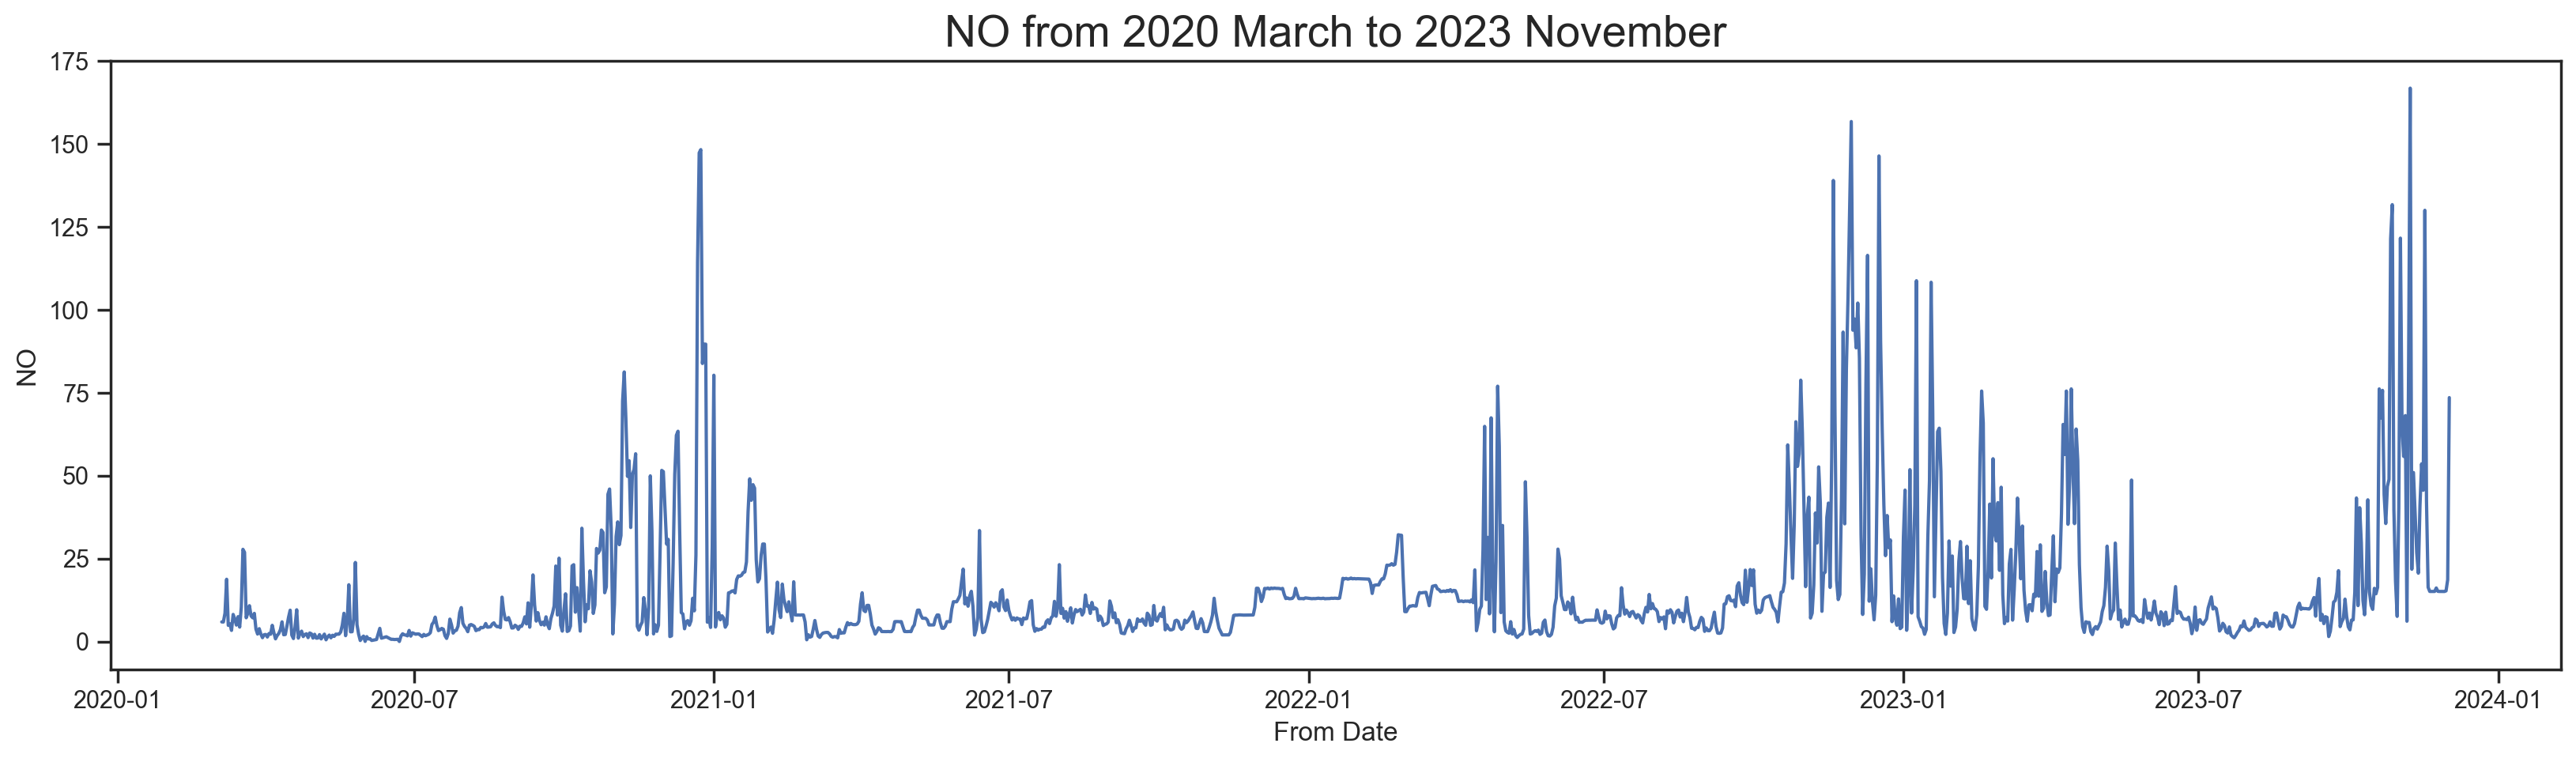

In [39]:
plt.figure(figsize=(20,5))
sns.lineplot(sector_51[sector_51['NO'] != "None"]['NO'])
plt.title("NO from 2020 March to 2023 November", fontsize=20)

- Fill the missing values with forward fill (generally this method is used when using time series data that has no trend)


In [40]:
sector_51['NO'] = sector_51['NO'].ffill()

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_76702/2719557728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_51['NO'] = sector_51['NO'].ffill()


In [41]:
sector_51['NO'].isnull().sum()

0

- Now, there are no missing values

<Figure size 1400x500 with 0 Axes>

<AxesSubplot: xlabel='From Date', ylabel='NO'>

Text(0.5, 1.0, 'NO from 2020 March to 2023 November')

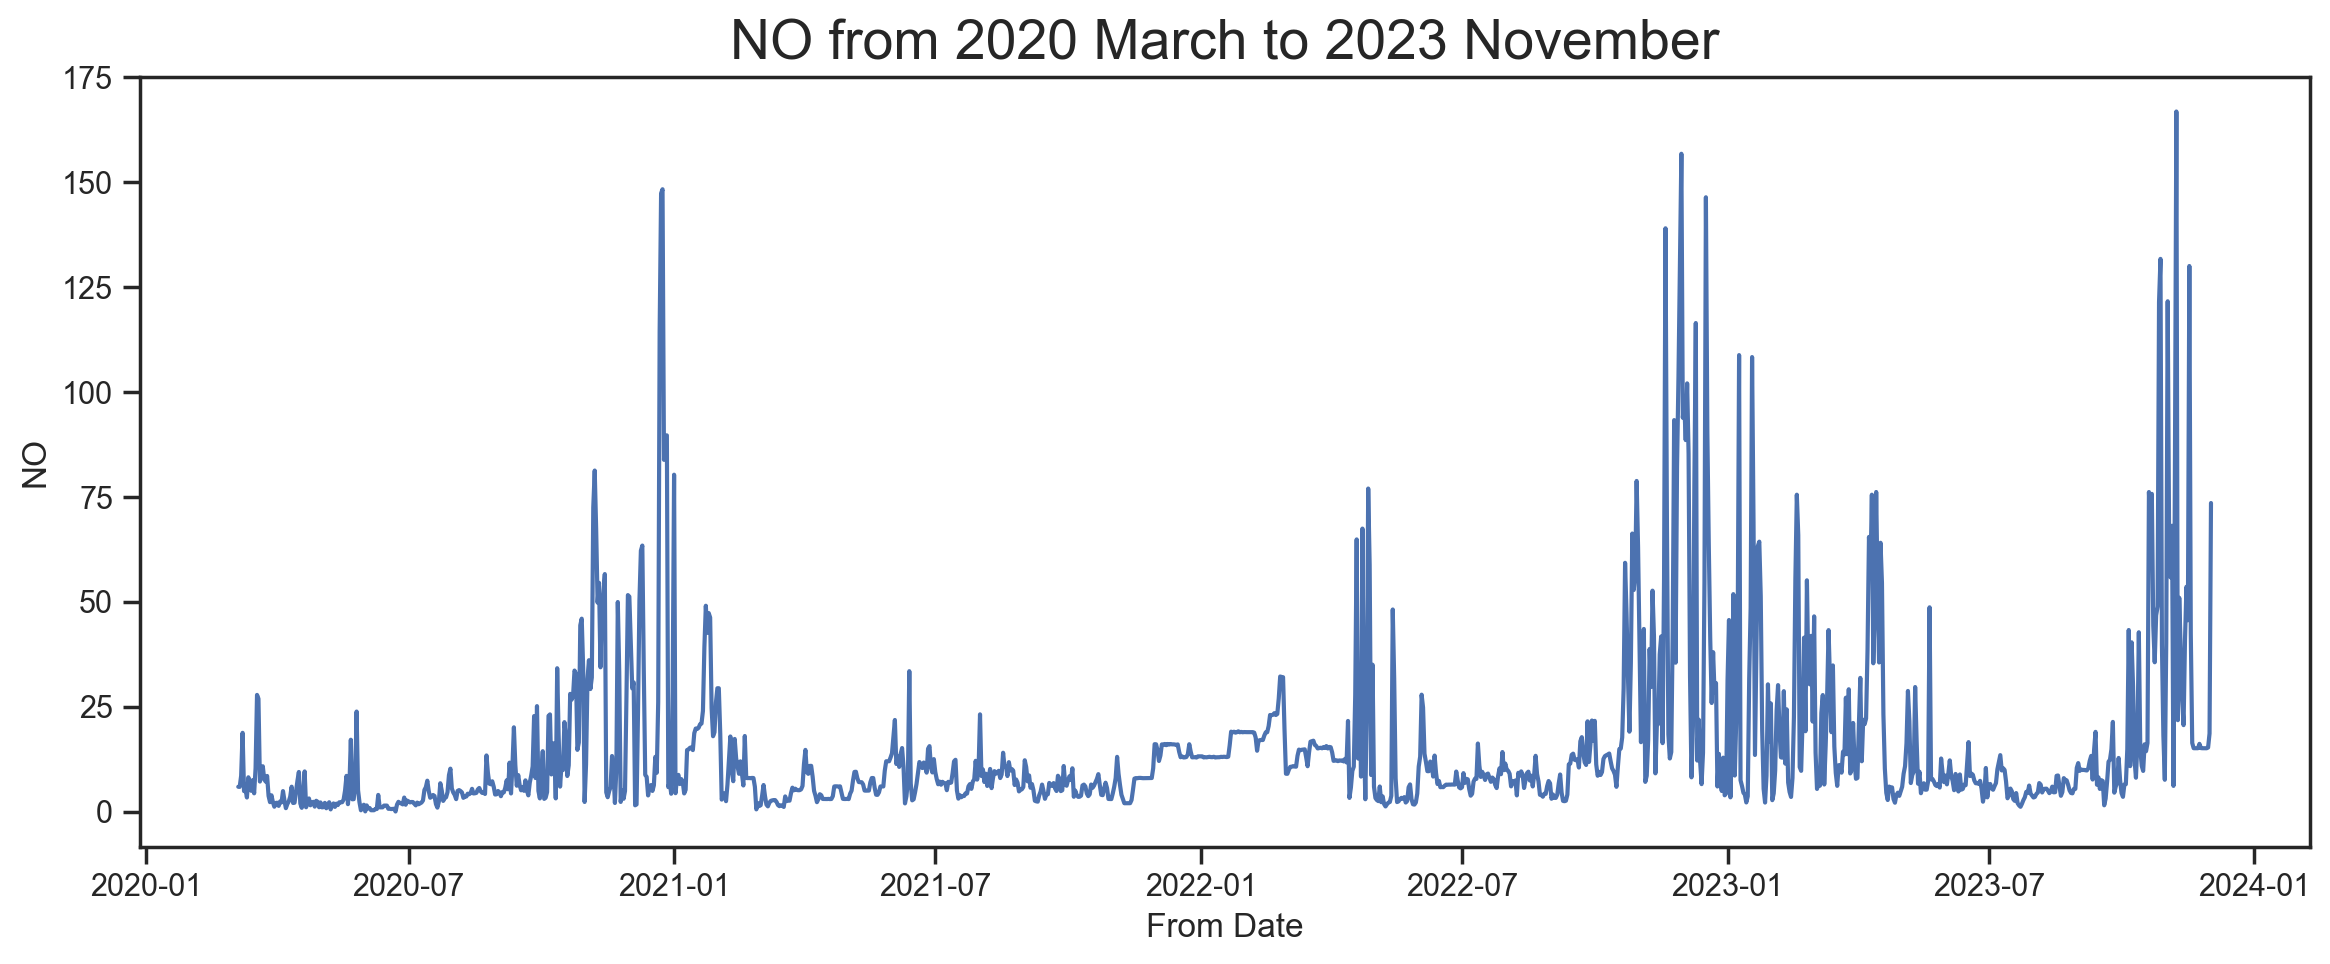

In [42]:
plt.figure(figsize=(14,5))
sns.lineplot(sector_51['NO'])
plt.title("NO from 2020 March to 2023 November", fontsize=20)

#### 1.1.5.2 NO2 column

In [43]:
sector_51['NO2'].value_counts(dropna=False)

None     10
11.78     7
13.99     5
9.01      4
11.97     4
         ..
2.89      1
7.11      1
6.78      1
4.23      1
70.09     1
Name: NO2, Length: 1121, dtype: int64

In [44]:
sector_51[sector_51['NO2'] == "None"]

PM2.5    PM10   NOx   NO2     NO   SO2    CO  Ozone
From Date                                                       
2020-10-10   95.24  232.72  0.00  None  16.25  3.08  1.08  49.99
2021-12-31  223.16  366.41  0.00  None  13.16  4.50  2.29  16.31
2022-01-01  287.66  425.23  0.00  None  13.16  4.54  2.18  20.44
2022-01-02  297.88  379.54  0.00  None  13.16  4.18  2.23  18.97
2022-02-02  186.08  278.94  0.00  None  18.93  2.37  1.22  36.76
2022-02-03  219.18  300.62  0.00  None  18.93  1.52  2.00  19.36
2022-02-04   92.84  142.02  0.00  None  18.93  1.71  1.63  18.05
2022-02-05  156.05  301.50  0.00  None  18.93  3.71  2.39  16.90
2022-02-06  179.21  316.93  0.00  None  18.93  3.98  2.60  23.54
2023-08-20   83.69  132.83  0.11  None   3.76  2.62  0.48  34.72

In [45]:
# Convert None into NaN
sector_51.loc[sector_51['NO2'] == "None", 'NO2'] = np.nan

In [46]:
sector_51['NO2'].value_counts(dropna=False)

NaN      10
11.78     7
13.99     5
9.01      4
11.97     4
         ..
2.89      1
7.11      1
6.78      1
4.23      1
70.09     1
Name: NO2, Length: 1121, dtype: int64

<Figure size 2000x500 with 0 Axes>

<AxesSubplot: xlabel='From Date', ylabel='NO2'>

Text(0.5, 1.0, 'NO2 from 2020 March to 2023 November')

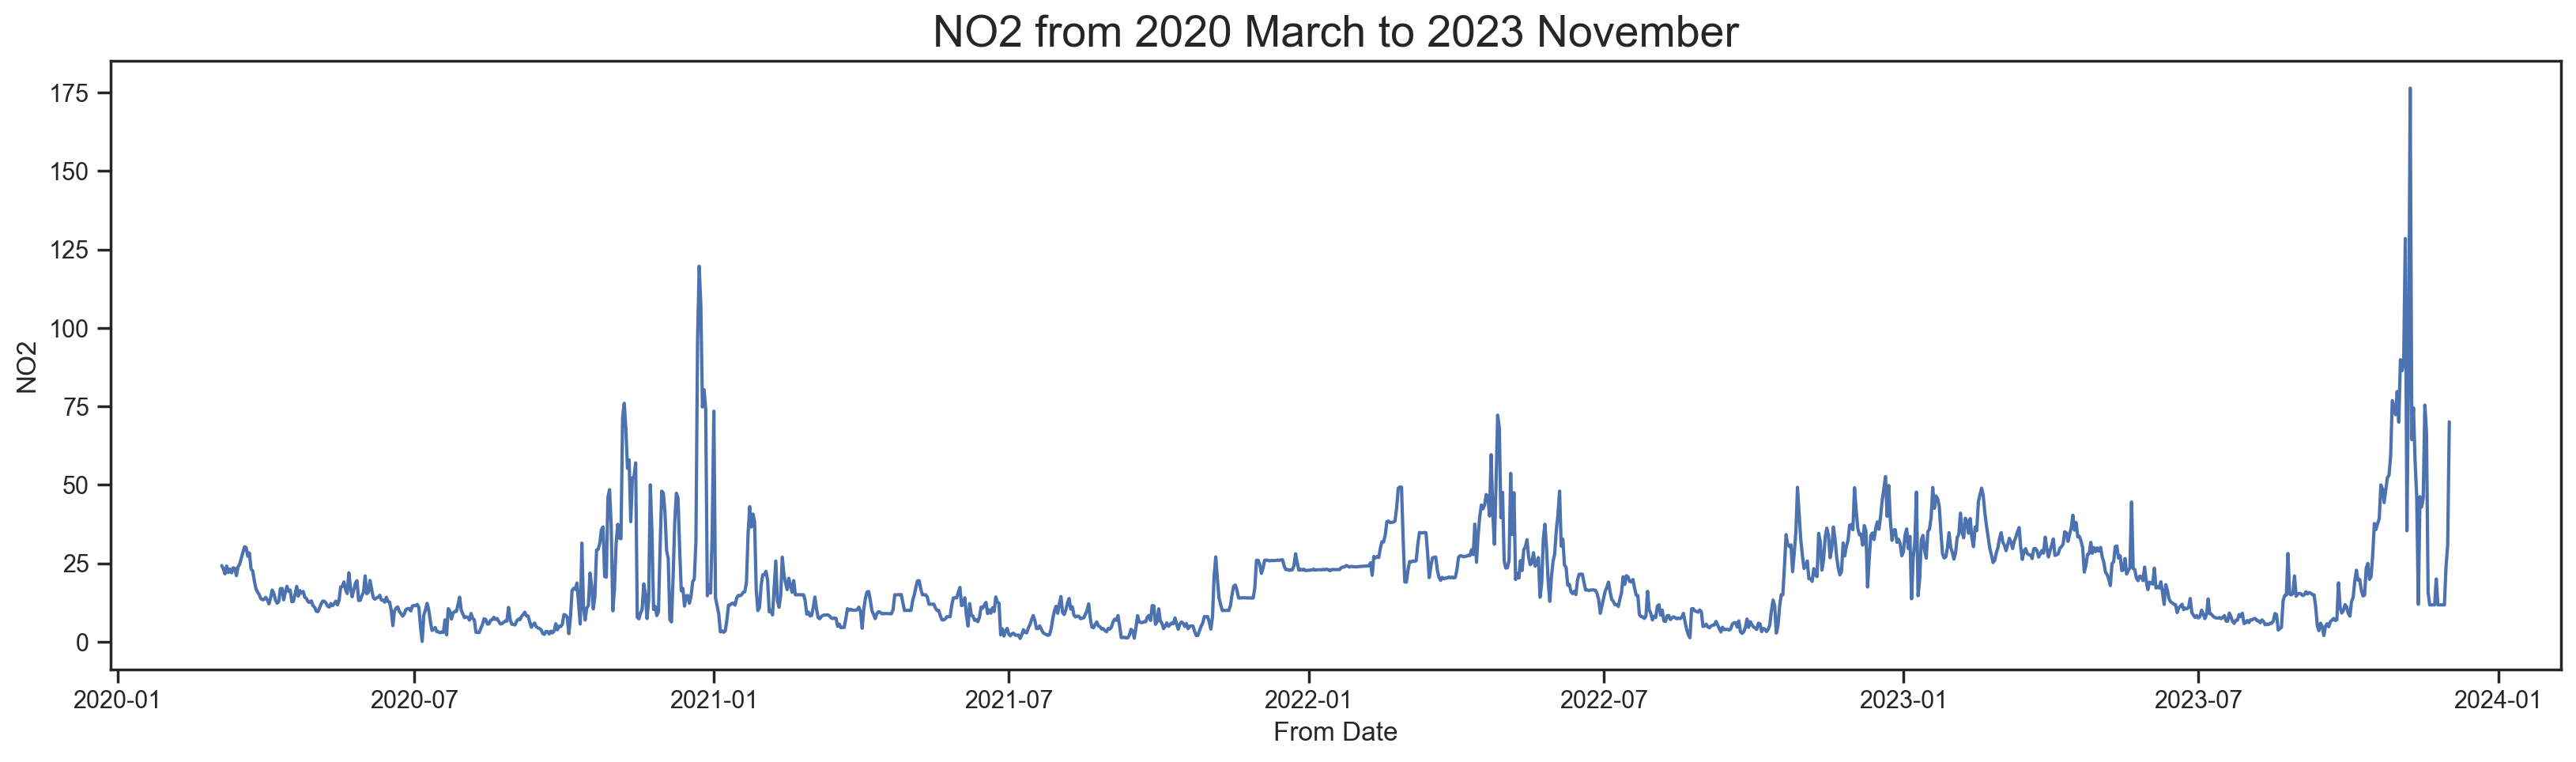

In [47]:
plt.figure(figsize=(20,5))
sns.lineplot(sector_51[sector_51['NO2'] != "None"]['NO2'])
plt.title("NO2 from 2020 March to 2023 November", fontsize=20)

- Fill the missing values with forward fill (generally this method is used when using time series data that has no trend)

In [48]:
sector_51['NO2'] = sector_51['NO2'].ffill()

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_76702/4006395173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_51['NO2'] = sector_51['NO2'].ffill()


In [49]:
sector_51['NO2'].isnull().sum()

0

- Now, there are no missing values

<Figure size 1400x500 with 0 Axes>

<AxesSubplot: xlabel='From Date', ylabel='NO2'>

Text(0.5, 1.0, 'NO2 from 2020 March to 2023 November')

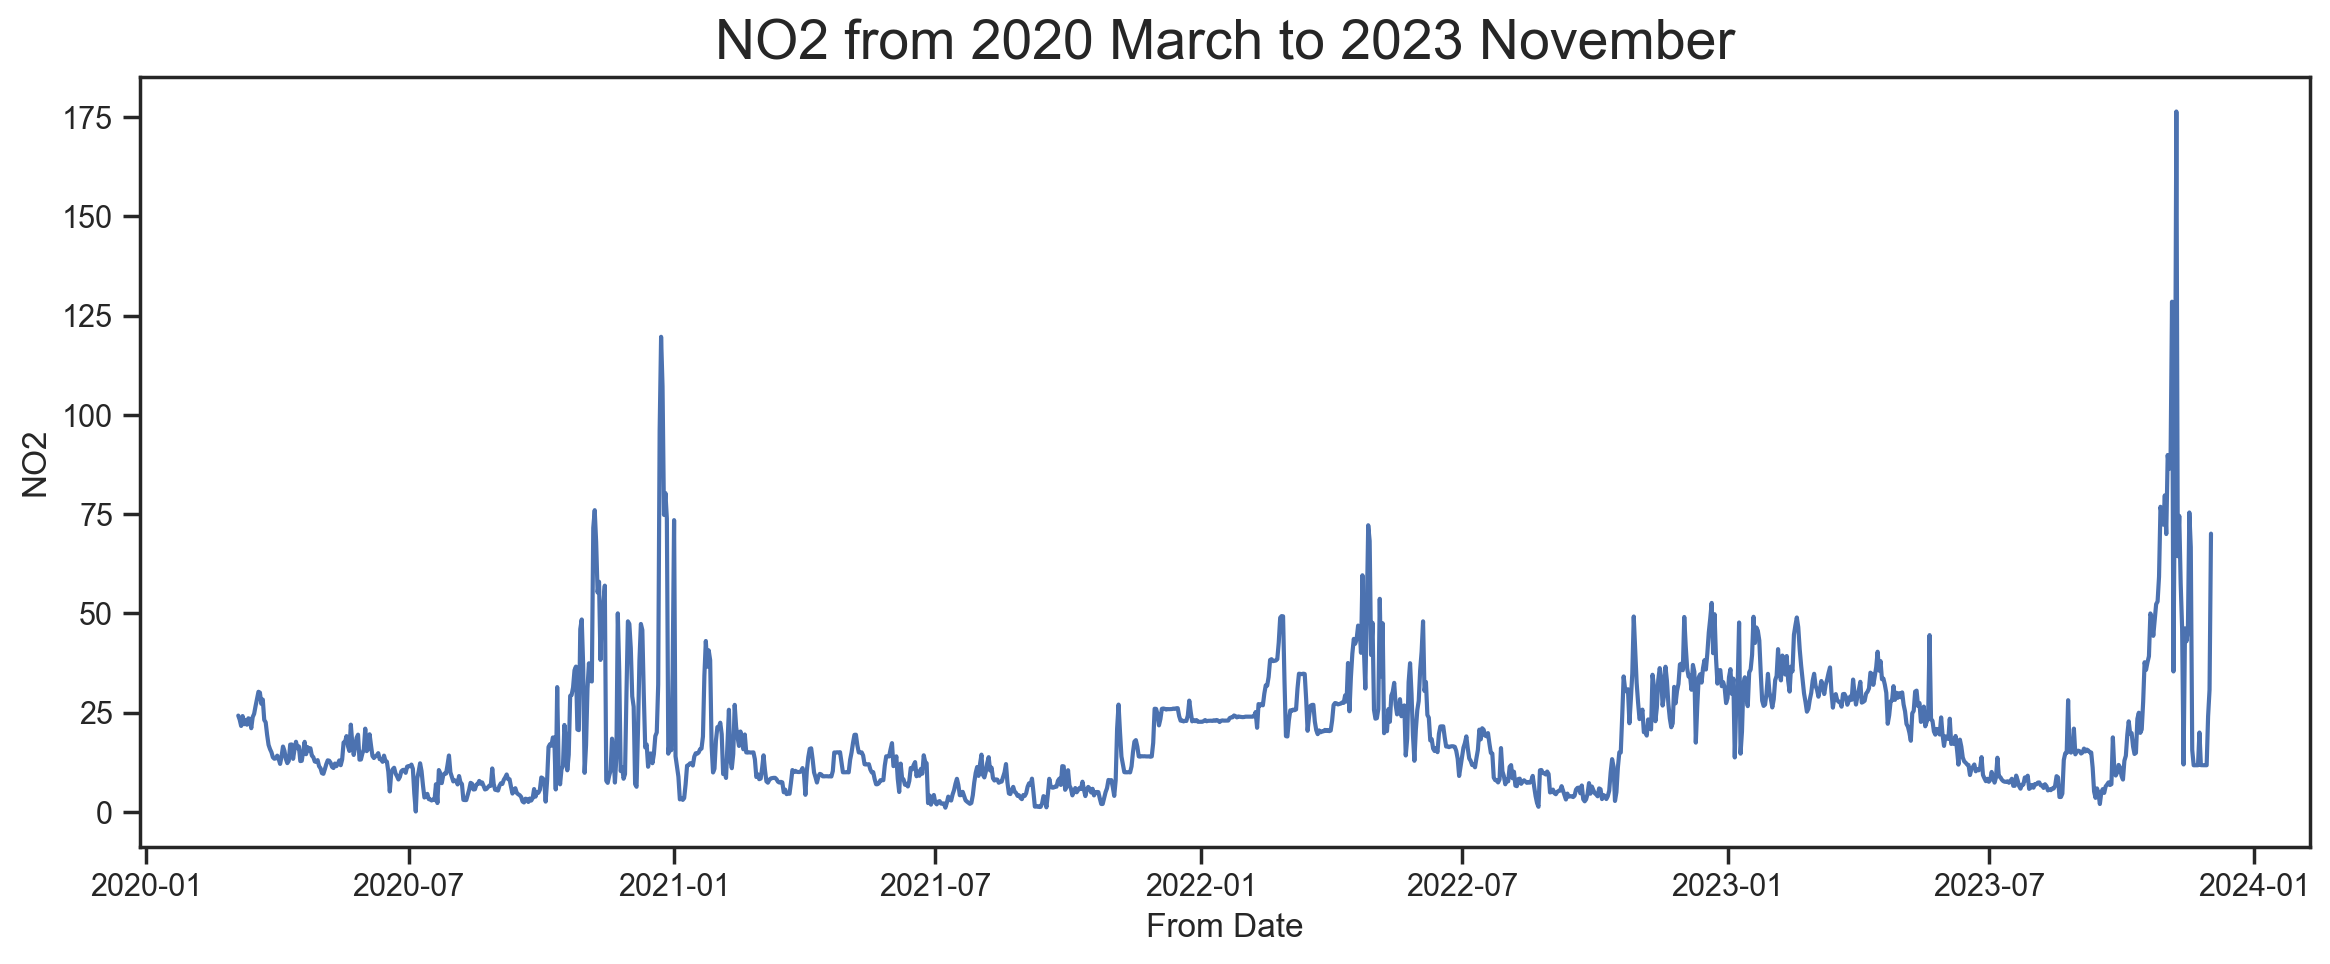

In [50]:
plt.figure(figsize=(14,5))
sns.lineplot(sector_51['NO2'])
plt.title("NO2 from 2020 March to 2023 November", fontsize=20)

### 1.1.6 Statistics and Summary

### 1.1.7 Calculate AQI

In [51]:
import get_sub_index

In [52]:
sector_51

PM2.5    PM10    NOx    NO2     NO    SO2    CO  Ozone
From Date                                                          
2020-03-05   36.51   73.15  30.19  24.28   5.91  19.81  0.51  71.07
2020-03-06   22.23   39.15  29.12  23.24   5.89  19.44  0.45  55.32
2020-03-07   41.44   77.68  30.20  21.67   8.54  23.83  0.63  46.15
2020-03-08   62.64  130.39  42.94  24.16  18.77  23.14  0.86  41.67
2020-03-09   83.74  127.54  26.98  22.10   4.88  20.47  0.68  49.61
...            ...     ...    ...    ...    ...    ...   ...    ...
2023-11-28   95.61  138.86  19.21  11.77  15.10   2.32  1.09  49.87
2023-11-29  153.99  300.20  19.22  11.78  15.09   2.49  2.39  49.93
2023-11-30  182.69  282.48  21.05  24.10  15.27   2.40  2.51  49.41
2023-12-01  114.48  259.68  23.23  30.78  18.61   2.24  2.91  49.80
2023-12-02  154.15  289.06  53.40  70.09  73.53   1.82  2.99  34.92

[1368 rows x 8 columns]

In [53]:
sector_51_copy = sector_51.copy()

In [54]:
sector_51_copy["PM2.5_SubIndex"] = sector_51_copy["PM2.5"].apply(lambda x: get_sub_index.get_PM25_subindex(x))
sector_51_copy["PM10_SubIndex"] = sector_51_copy["PM10"].apply(lambda x: get_sub_index.get_PM10_subindex(x))
sector_51_copy["NOx_SubIndex"] = sector_51_copy["NOx"].apply(lambda x: get_sub_index.get_NOx_subindex(x))
sector_51_copy["CO_SubIndex"] = sector_51_copy["CO"].apply(lambda x: get_sub_index.get_CO_subindex(x))
sector_51_copy["Ozone_SubIndex"] = sector_51_copy["Ozone"].apply(lambda x: get_sub_index.get_O3_subindex(x))
sector_51_copy["SO2_SubIndex"] = sector_51_copy["SO2"].apply(lambda x: get_sub_index.get_SO2_subindex(x))

In [55]:
sector_51_copy.columns 

Index(['PM2.5', 'PM10', 'NOx', 'NO2', 'NO', 'SO2', 'CO', 'Ozone',
       'PM2.5_SubIndex', 'PM10_SubIndex', 'NOx_SubIndex', 'CO_SubIndex',
       'Ozone_SubIndex', 'SO2_SubIndex'],
      dtype='object', name='')

In [56]:
sector_51_copy = sector_51_copy[['PM2.5', 'PM2.5_SubIndex', 'PM10', 'PM10_SubIndex', 'NO', 'NO2', 
                'NOx', 'NOx_SubIndex','CO', 'CO_SubIndex', 'Ozone', 'Ozone_SubIndex', 'SO2', 'SO2_SubIndex']]

In [57]:
sector_51_copy

PM2.5  PM2.5_SubIndex    PM10  PM10_SubIndex     NO    NO2  \
From Date                                                                 
2020-03-05   36.51       60.850000   73.15      73.150000   5.91  24.28   
2020-03-06   22.23       37.050000   39.15      39.150000   5.89  23.24   
2020-03-07   41.44       69.066667   77.68      77.680000   8.54  21.67   
2020-03-08   62.64      108.800000  130.39     120.260000  18.77  24.16   
2020-03-09   83.74      179.133333  127.54     118.360000   4.88  22.10   
...            ...             ...     ...            ...    ...    ...   
2023-11-28   95.61      218.700000  138.86     125.906667  15.10  11.77   
2023-11-29  153.99      326.146154  300.20     250.200000  15.09  11.78   
2023-11-30  182.69      348.223077  282.48     232.480000  15.27  24.10   
2023-12-01  114.48      281.600000  259.68     209.680000  18.61  30.78   
2023-12-02  154.15      326.269231  289.06     239.060000  73.53  70.09   

              NOx  NOx_SubIndex    CO  CO_SubIndex  Ozone  Ozone_SubIndex  \
From Date                                                                   
2020-03-05  30.19       37.7375  0.51       25.500  71.07           71.07   
2020-03-06  29.12       36.4000  0.45       22.500  55.32           55.32   
2020-03-07  30.20       37.7500  0.63       31.500  46.15           46.15   
2020-03-08  42.94       53.6750  0.86       43.000  41.67           41.67   
2020-03-09  26.98       33.7250  0.68       34.000  49.61           49.61   
...           ...           ...   ...          ...    ...             ...   
2023-11-28  19.21       24.0125  1.09       54.500  49.87           49.87   
2023-11-29  19.22       24.0250  2.39      104.875  49.93           49.93   
2023-11-30  21.05       26.3125  2.51      106.375  49.41           49.41   
2023-12-01  23.23       29.0375  2.91      111.375  49.80           49.80   
2023-12-02  53.40       66.7500  2.99      112.375  34.92           34.92   

              SO2  SO2_SubIndex  
From Date                        
2020-03-05  19.81       24.7625  
2020-03-06  19.44       24.3000  
2020-03-07  23.83       29.7875  
2020-03-08  23.14       28.9250  
2020-03-09  20.47       25.5875  
...           ...           ...  
2023-11-28   2.32        2.9000  
2023-11-29   2.49        3.1125  
2023-11-30   2.40        3.0000  
2023-12-01   2.24        2.8000  
2023-12-02   1.82        2.2750  

[1368 rows x 14 columns]

In [327]:
sector_51_copy[datetime(2023,10,30):]

PM2.5  PM2.5_SubIndex    PM10  PM10_SubIndex      NO     NO2  \
From Date                                                                   
2023-10-30  106.16      253.866667  171.23     147.486667   18.13   72.35   
2023-10-31  163.24      333.261538  252.50     202.500000    7.58   79.73   
2023-11-01   90.80      202.666667  156.81     137.873333   40.16   69.99   
2023-11-02  169.72      338.246154  295.43     245.430000  121.61   89.89   
2023-11-03  311.11      447.007692  335.01     285.010000   64.47   86.39   
2023-11-04  357.39      482.607692  640.62     663.275000   55.81   89.20   
2023-11-05  172.64      340.492308  390.40     350.500000   68.11  128.49   
2023-11-06  297.54      436.569231  455.15     431.437500    6.12   35.39   
2023-11-07  222.18      378.600000  421.06     388.825000   81.22   87.72   
2023-11-08  302.78      440.600000  419.93     387.412500  166.83  176.38   
2023-11-09  342.28      470.984615  532.25     527.812500   21.78   64.41   
2023-11-10  123.29      302.530769  205.12     170.080000   50.95   74.56   
2023-11-11  121.53      301.176923  198.35     165.566667   39.01   57.53   
2023-11-12  150.01      323.084615  221.22     180.813333   26.83   46.19   
2023-11-13  307.18      443.984615  413.21     379.012500   20.60   11.97   
2023-11-14  255.45      404.192308  382.83     341.037500   41.01   46.24   
2023-11-15  185.14      350.107692  347.84     297.840000   53.57   42.98   
2023-11-16  399.47      514.976923  460.70     438.375000   45.60   45.84   
2023-11-17  253.84      402.953846  438.72     410.900000  130.01   75.42   
2023-11-18  165.80      335.230769  284.23     234.230000   42.40   66.68   
2023-11-19  149.81      322.930769  234.32     189.546667   16.35   15.63   
2023-11-20  177.53      344.253846  321.96     271.960000   15.10   11.77   
2023-11-21  150.27      323.284615  222.25     181.500000   15.10   11.78   
2023-11-22  173.00      340.769231  281.50     231.500000   15.10   11.77   
2023-11-23  256.99      405.376923  803.59     866.987500   15.99   14.23   

               NOx  NOx_SubIndex    CO  CO_SubIndex  Ozone  Ozone_SubIndex  
From Date                                                                   
2023-10-30   44.23       55.2875  1.48       74.000  30.17           30.17  
2023-10-31   46.53       58.1625  1.57       78.500  44.34           44.34  
2023-11-01   58.54       73.1750  2.04      100.500  30.18           30.18  
2023-11-02   98.44      118.4400  3.39      117.375  30.39           30.39  
2023-11-03   61.14       76.4250  3.32      116.500  30.99           30.99  
2023-11-04   70.45       88.0625  4.03      125.375  35.86           35.86  
2023-11-05  100.80      120.8000  3.28      116.000  17.54           17.54  
2023-11-06   18.96       23.7000  3.48      118.500  20.89           20.89  
2023-11-07  103.38      123.3800  4.07      125.875  20.99           20.99  
2023-11-08  146.43      166.4300  4.61      132.625  26.93           26.93  
2023-11-09   29.04       36.3000  3.73      121.625  19.78           19.78  
2023-11-10   63.84       79.8000  2.54      106.750  12.80           12.80  
2023-11-11   44.87       56.0875  2.49      106.125  15.64           15.64  
2023-11-12   32.74       40.9250  2.73      109.125  23.08           23.08  
2023-11-13   33.04       41.3000  3.64      120.500  10.67           10.67  
2023-11-14   51.60       64.5000  4.47      130.875  10.30           10.30  
2023-11-15   47.47       59.3375  3.11      113.875  10.41           10.41  
2023-11-16   34.66       43.3250  2.82      110.250  10.34           10.34  
2023-11-17   77.08       96.3500  3.27      115.875  10.30           10.30  
2023-11-18   42.47       53.0875  1.95       97.500  10.31           10.31  
2023-11-19   20.79       25.9875  1.87       93.500  10.31           10.31  
2023-11-20   19.21       24.0125  2.51      106.375  34.88           34.88  
2023-11-21   19.21       24.0125  2.27      103.375  49.94           49.94  
2023-11-

In [58]:
sector_51_copy["Checks"] = (sector_51_copy["PM2.5_SubIndex"] > 0).astype(int) + \
                (sector_51_copy["PM10_SubIndex"] > 0).astype(int) + \
                (sector_51_copy["NOx_SubIndex"] > 0).astype(int) + \
                (sector_51_copy["CO_SubIndex"] > 0).astype(int) + \
                (sector_51_copy["SO2_SubIndex"] > 0).astype(int) + \
                (sector_51_copy["Ozone_SubIndex"] > 0).astype(int)

sector_51_copy["AQI"] = round(sector_51_copy[["PM2.5_SubIndex", "PM10_SubIndex", "NOx_SubIndex", "CO_SubIndex", "Ozone_SubIndex", "SO2_SubIndex"]].max(axis = 1))
sector_51_copy.loc[sector_51_copy["PM2.5_SubIndex"] + sector_51_copy["PM10_SubIndex"] <= 0, "AQI"] = np.NaN
sector_51_copy.loc[sector_51_copy.Checks < 3, "AQI"] = np.NaN

In [59]:
sector_51_copy

PM2.5  PM2.5_SubIndex    PM10  PM10_SubIndex     NO    NO2  \
From Date                                                                 
2020-03-05   36.51       60.850000   73.15      73.150000   5.91  24.28   
2020-03-06   22.23       37.050000   39.15      39.150000   5.89  23.24   
2020-03-07   41.44       69.066667   77.68      77.680000   8.54  21.67   
2020-03-08   62.64      108.800000  130.39     120.260000  18.77  24.16   
2020-03-09   83.74      179.133333  127.54     118.360000   4.88  22.10   
...            ...             ...     ...            ...    ...    ...   
2023-11-28   95.61      218.700000  138.86     125.906667  15.10  11.77   
2023-11-29  153.99      326.146154  300.20     250.200000  15.09  11.78   
2023-11-30  182.69      348.223077  282.48     232.480000  15.27  24.10   
2023-12-01  114.48      281.600000  259.68     209.680000  18.61  30.78   
2023-12-02  154.15      326.269231  289.06     239.060000  73.53  70.09   

              NOx  NOx_SubIndex    CO  CO_SubIndex  Ozone  Ozone_SubIndex  \
From Date                                                                   
2020-03-05  30.19       37.7375  0.51       25.500  71.07           71.07   
2020-03-06  29.12       36.4000  0.45       22.500  55.32           55.32   
2020-03-07  30.20       37.7500  0.63       31.500  46.15           46.15   
2020-03-08  42.94       53.6750  0.86       43.000  41.67           41.67   
2020-03-09  26.98       33.7250  0.68       34.000  49.61           49.61   
...           ...           ...   ...          ...    ...             ...   
2023-11-28  19.21       24.0125  1.09       54.500  49.87           49.87   
2023-11-29  19.22       24.0250  2.39      104.875  49.93           49.93   
2023-11-30  21.05       26.3125  2.51      106.375  49.41           49.41   
2023-12-01  23.23       29.0375  2.91      111.375  49.80           49.80   
2023-12-02  53.40       66.7500  2.99      112.375  34.92           34.92   

              SO2  SO2_SubIndex  Checks    AQI  
From Date                                       
2020-03-05  19.81       24.7625       6   73.0  
2020-03-06  19.44       24.3000       6   55.0  
2020-03-07  23.83       29.7875       6   78.0  
2020-03-08  23.14       28.9250       6  120.0  
2020-03-09  20.47       25.5875       6  179.0  
...           ...           ...     ...    ...  
2023-11-28   2.32        2.9000       6  219.0  
2023-11-29   2.49        3.1125       6  326.0  
2023-11-30   2.40        3.0000       6  348.0  
2023-12-01   2.24        2.8000       6  282.0  
2023-12-02   1.82        2.2750       6  326.0  

[1368 rows x 16 columns]

In [62]:
sector_51_copy[-16:]

PM2.5  PM2.5_SubIndex    PM10  PM10_SubIndex      NO    NO2  \
From Date                                                                  
2023-11-17  253.84      402.953846  438.72     410.900000  130.01  75.42   
2023-11-18  165.80      335.230769  284.23     234.230000   42.40  66.68   
2023-11-19  149.81      322.930769  234.32     189.546667   16.35  15.63   
2023-11-20  177.53      344.253846  321.96     271.960000   15.10  11.77   
2023-11-21  150.27      323.284615  222.25     181.500000   15.10  11.78   
2023-11-22  173.00      340.769231  281.50     231.500000   15.10  11.77   
2023-11-23  187.06      351.584615  463.96     442.450000   15.10  11.78   
2023-11-24  234.71      388.238462  496.33     482.912500   16.14  20.02   
2023-11-25  159.08      330.061538  295.07     245.070000   15.13  11.80   
2023-11-26  152.58      325.061538  243.90     195.933333   15.10  11.78   
2023-11-27  123.30      302.538462  158.84     139.226667   15.10  11.78   
2023-11-28   95.61      218.700000  138.86     125.906667   15.10  11.77   
2023-11-29  153.99      326.146154  300.20     250.200000   15.09  11.78   
2023-11-30  182.69      348.223077  282.48     232.480000   15.27  24.10   
2023-12-01  114.48      281.600000  259.68     209.680000   18.61  30.78   
2023-12-02  154.15      326.269231  289.06     239.060000   73.53  70.09   

              NOx  NOx_SubIndex    CO  CO_SubIndex  Ozone  Ozone_SubIndex  \
From Date                                                                   
2023-11-17  77.08       96.3500  3.27      115.875  10.30           10.30   
2023-11-18  42.47       53.0875  1.95       97.500  10.31           10.31   
2023-11-19  20.79       25.9875  1.87       93.500  10.31           10.31   
2023-11-20  19.21       24.0125  2.51      106.375  34.88           34.88   
2023-11-21  19.21       24.0125  2.27      103.375  49.94           49.94   
2023-11-22  19.21       24.0125  1.93       96.500  49.94           49.94   
2023-11-23  19.21       24.0125  2.59      107.375  49.94           49.94   
2023-11-24  21.79       27.2375  2.81      110.125  49.60           49.60   
2023-11-25  17.15       21.4375  3.13      114.125  48.80           48.80   
2023-11-26  19.21       24.0125  2.52      106.500  49.73           49.73   
2023-11-27  19.21       24.0125  2.10      101.250  49.80           49.80   
2023-11-28  19.21       24.0125  1.09       54.500  49.87           49.87   
2023-11-29  19.22       24.0250  2.39      104.875  49.93           49.93   
2023-11-30  21.05       26.3125  2.51      106.375  49.41           49.41   
2023-12-01  23.23       29.0375  2.91      111.375  49.80           49.80   
2023-12-02  53.40       66.7500  2.99      112.375  34.92           34.92   

             SO2  SO2_SubIndex  Checks    AQI  
From Date                                      
2023-11-17  2.41        3.0125       6  411.0  
2023-11-18  2.26        2.8250       6  335.0  
2023-11-19  1.89        2.3625       6  323.0  
2023-11-20  2.30        2.8750       6  344.0  
2023-11-21  2.33        2.9125       6  323.0  
2023-11-22  2.23        2.7875       6  341.0  
2023-11-23  2.21        2.7625       6  442.0  
2023-11-24  2.31        2.8875       6  483.0  
2023-11-25  1.89        2.3625       6  330.0  
2023-11-26  1.76        2.2000       6  325.0  
2023-11-27  2.08        2.6000       6  303.0  
2023-11-28  2.32        2.9000       6  219.0  
2023-11-29  2.49        3.1125       6  326.0  
2023-11-30  2.40        3.0000       6  348.0  
2023-12-01  2.24        2.8000       6  282.0  
2023-12-02  1.82        2.2750       6  326.0

In [63]:
sector_51_copy.to_csv("sector_51_copy.csv")

In [90]:
sector_51_daily_aqi = pd.DataFrame(sector_51_copy['AQI'])
sector_51_daily_aqi

AQI
2020-03-05   73.0
2020-03-06   55.0
2020-03-07   78.0
2020-03-08  120.0
2020-03-09  179.0
...           ...
2023-11-28  219.0
2023-11-29  326.0
2023-11-30  348.0
2023-12-01  282.0
2023-12-02  326.0

[1368 rows x 1 columns]

In [92]:
sector_51_daily_aqi.reset_index(inplace=True)

In [95]:
sector_51_daily_aqi.rename(columns={'index':'Date'}, inplace=True)

In [96]:
sector_51_daily_aqi

Date    AQI
0    2020-03-05   73.0
1    2020-03-06   55.0
2    2020-03-07   78.0
3    2020-03-08  120.0
4    2020-03-09  179.0
...         ...    ...
1363 2023-11-28  219.0
1364 2023-11-29  326.0
1365 2023-11-30  348.0
1366 2023-12-01  282.0
1367 2023-12-02  326.0

[1368 rows x 2 columns]

In [98]:
sector_51_daily_aqi.to_csv('../../data/cleaned_data/Forecasting_time_series/sector_51_daily_aqi.csv')

In [112]:
temp = pd.read_csv( '../../data/cleaned_data/Forecasting_time_series/sector_51_daily_aqi.csv')
temp

Unnamed: 0        Date    AQI
0              0  2020-03-05   73.0
1              1  2020-03-06   55.0
2              2  2020-03-07   78.0
3              3  2020-03-08  120.0
4              4  2020-03-09  179.0
...          ...         ...    ...
1363        1363  2023-11-28  219.0
1364        1364  2023-11-29  326.0
1365        1365  2023-11-30  348.0
1366        1366  2023-12-01  282.0
1367        1367  2023-12-02  326.0

[1368 rows x 3 columns]

In [113]:
temp.drop(['Unnamed: 0'], axis=1, inplace=True)

In [114]:
temp.set_index('Date', inplace=True)

In [115]:
temp

AQI
Date             
2020-03-05   73.0
2020-03-06   55.0
2020-03-07   78.0
2020-03-08  120.0
2020-03-09  179.0
...           ...
2023-11-28  219.0
2023-11-29  326.0
2023-11-30  348.0
2023-12-01  282.0
2023-12-02  326.0

[1368 rows x 1 columns]

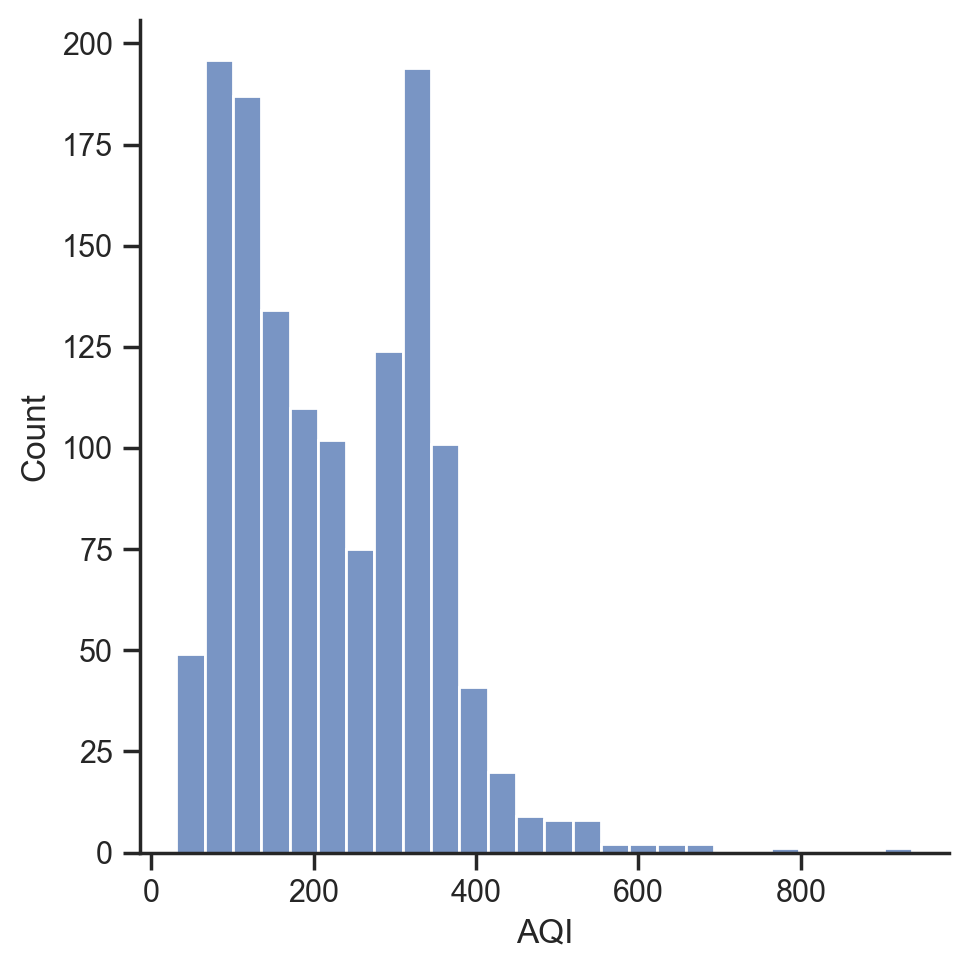

In [64]:
sns.displot(sector_51_copy['AQI'])

In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX

from pmdarima import auto_arima
import statsmodels.api as sm

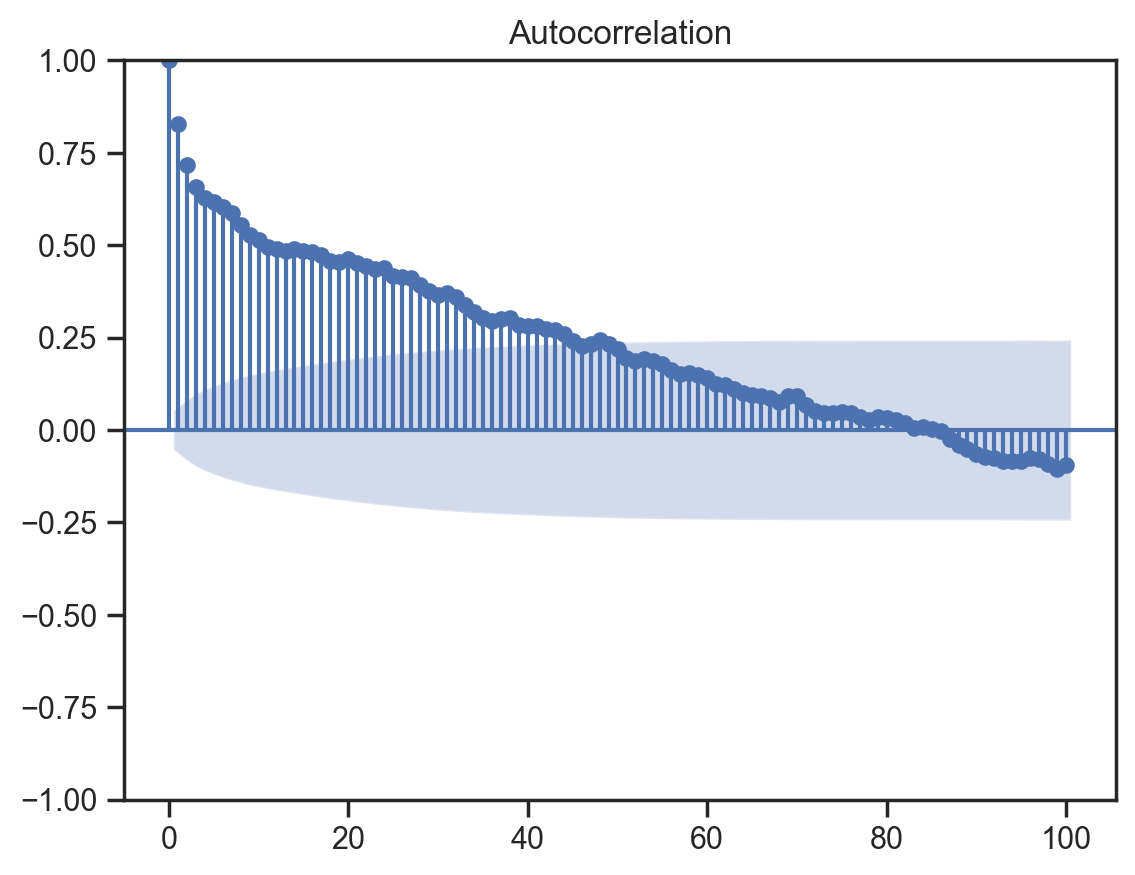

In [66]:
acf_plot = plot_acf(sector_51_copy['AQI'], lags= 100)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


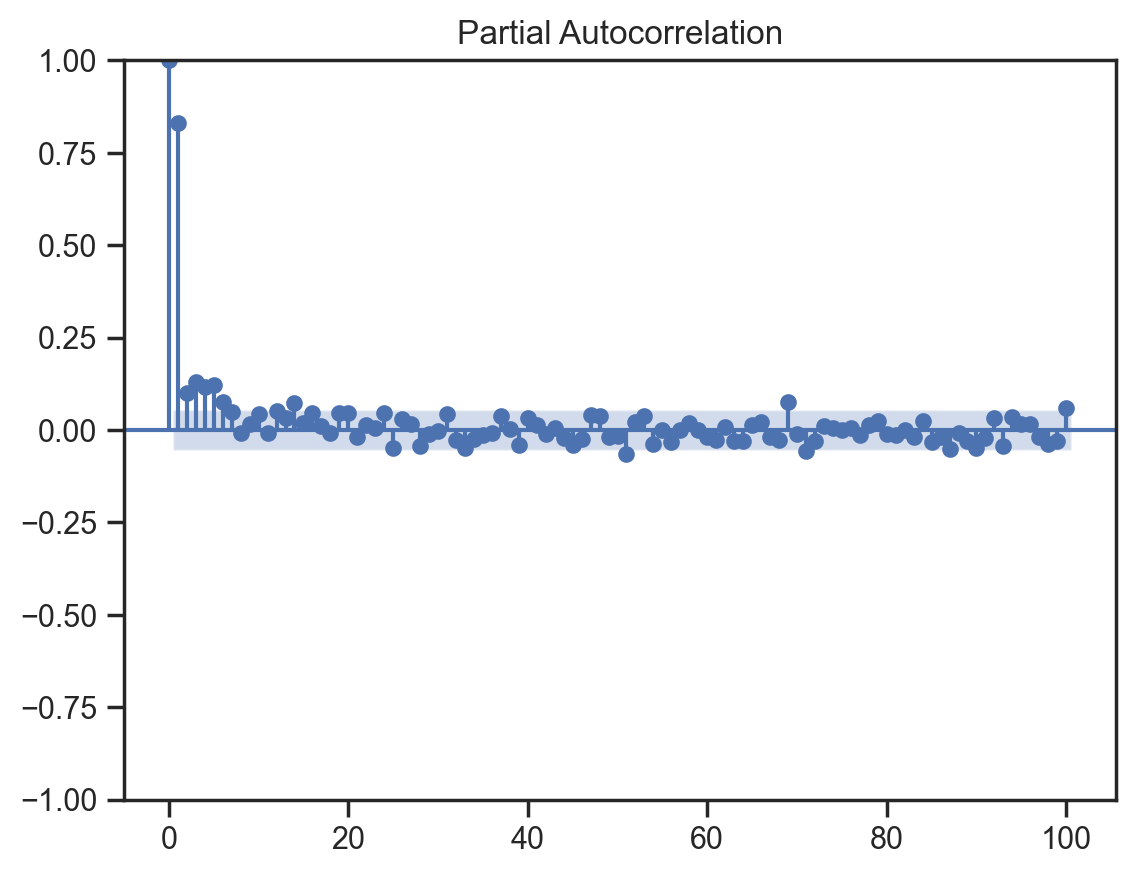

In [67]:
pacf_plot = plot_pacf(sector_51_copy['AQI'], lags= 100)

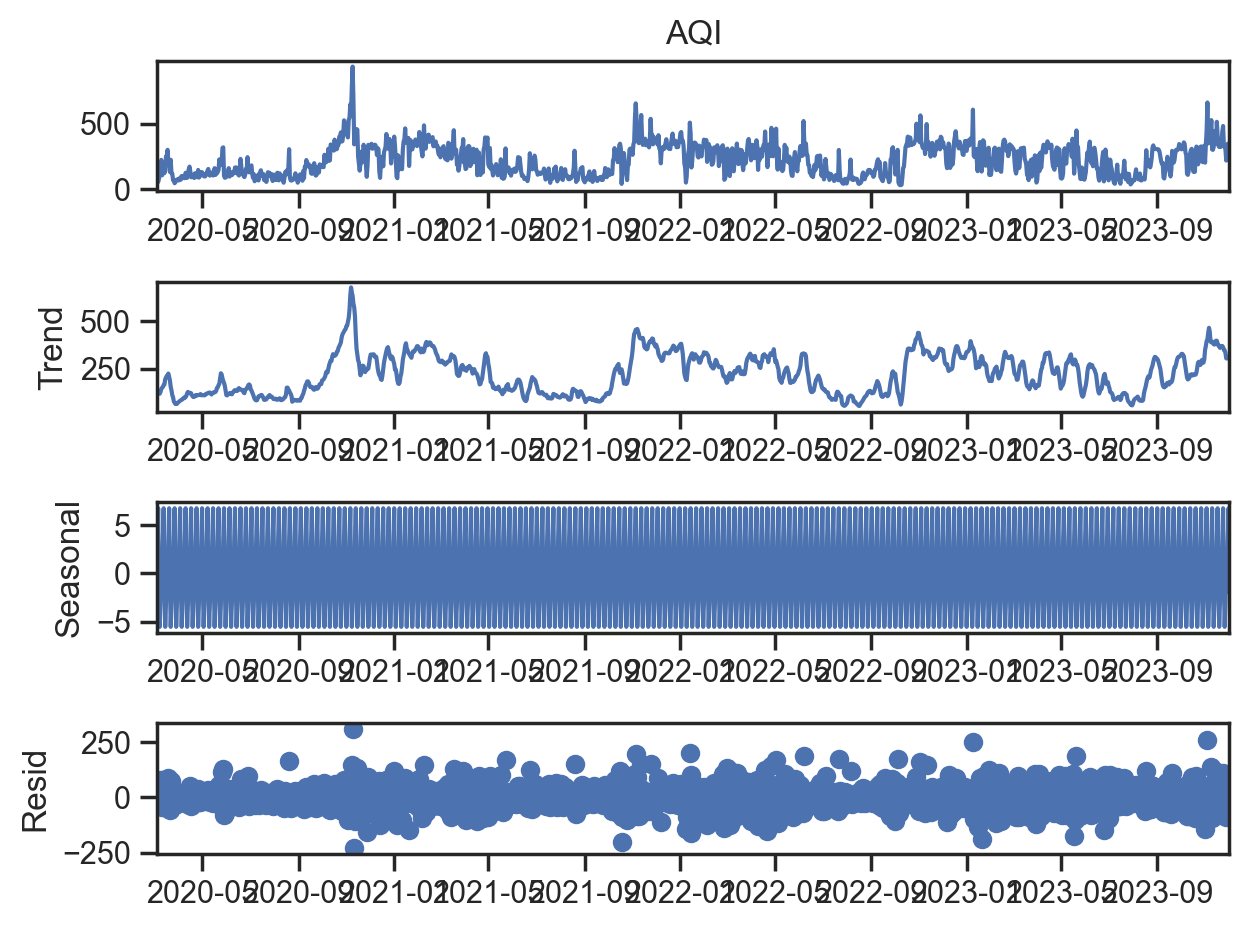

In [68]:
import statsmodels.api as sm
decomp = sm.tsa.seasonal_decompose(sector_51_copy['AQI'])
_ = decomp.plot()

In [69]:
sector_51_copy.index 

DatetimeIndex(['2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14',
               ...
               '2023-11-23', '2023-11-24', '2023-11-25', '2023-11-26',
               '2023-11-27', '2023-11-28', '2023-11-29', '2023-11-30',
               '2023-12-01', '2023-12-02'],
              dtype='datetime64[ns]', name='From Date', length=1368, freq=None)

In [70]:
sector_51_copy.index.set_names([None])

DatetimeIndex(['2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14',
               ...
               '2023-11-23', '2023-11-24', '2023-11-25', '2023-11-26',
               '2023-11-27', '2023-11-28', '2023-11-29', '2023-11-30',
               '2023-12-01', '2023-12-02'],
              dtype='datetime64[ns]', length=1368, freq=None)

In [71]:
sector_51_copy['AQI'].index = sector_51_copy['AQI'].index.set_names([None])

In [72]:
sector_51_copy['AQI'].index

DatetimeIndex(['2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14',
               ...
               '2023-11-23', '2023-11-24', '2023-11-25', '2023-11-26',
               '2023-11-27', '2023-11-28', '2023-11-29', '2023-11-30',
               '2023-12-01', '2023-12-02'],
              dtype='datetime64[ns]', length=1368, freq=None)

In [ ]:
# random forest and nn aqi_pred

In [73]:
train_end = datetime(2023, 11, 23)
test_end = datetime(2023, 12, 1)

train_data = sector_51_copy[:train_end]['AQI']
test_data = sector_51_copy[train_end + timedelta(days=1):test_end]['AQI']

In [74]:
train_data

From Date
2020-03-05     73.0
2020-03-06     55.0
2020-03-07     78.0
2020-03-08    120.0
2020-03-09    179.0
              ...  
2023-11-19    323.0
2023-11-20    344.0
2023-11-21    323.0
2023-11-22    341.0
2023-11-23    442.0
Name: AQI, Length: 1359, dtype: float64

In [75]:
test_data

From Date
2023-11-24    483.0
2023-11-25    330.0
2023-11-26    325.0
2023-11-27    303.0
2023-11-28    219.0
2023-11-29    326.0
2023-11-30    348.0
2023-12-01    282.0
Name: AQI, dtype: float64

### Rolling ARIMA 1,0,1

In [76]:
train_end = datetime(2023, 11, 23)
test_end = datetime(2023, 12, 1)

train_data = sector_51_copy[:train_end]['AQI']
test_data = sector_51_copy[train_end + timedelta(days=1):test_end]['AQI']

my_order = (1, 0, 1)
p,d,q = my_order
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    print("train_end-timedelta(days=1)", train_end - timedelta(days=1))
    train_data = sector_51_copy[:train_end - timedelta(days=1)]['AQI']
    model = ARIMA(train_data, order=my_order)
    model_fit = model.fit()
    pred = model_fit.forecast()
    print("pred", pred)
    rolling_predictions[train_end] = pred

train_end-timedelta(days=1) 2023-11-23 00:00:00
pred 2023-11-24    394.338952
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-24 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-25    436.975335
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-25 00:00:00
pred 2023-11-26    337.737482
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-26 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-27    315.60707
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-27 00:00:00
pred 2023-11-28    296.097762
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-28 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-29    233.648281
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-29 00:00:00
pred 2023-11-30    296.746976
Freq: D, dtype: float64
train_end-timedelta(days=1) 2023-11-30 00:00:00


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-12-01    324.020459
Freq: D, dtype: float64


<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 101')

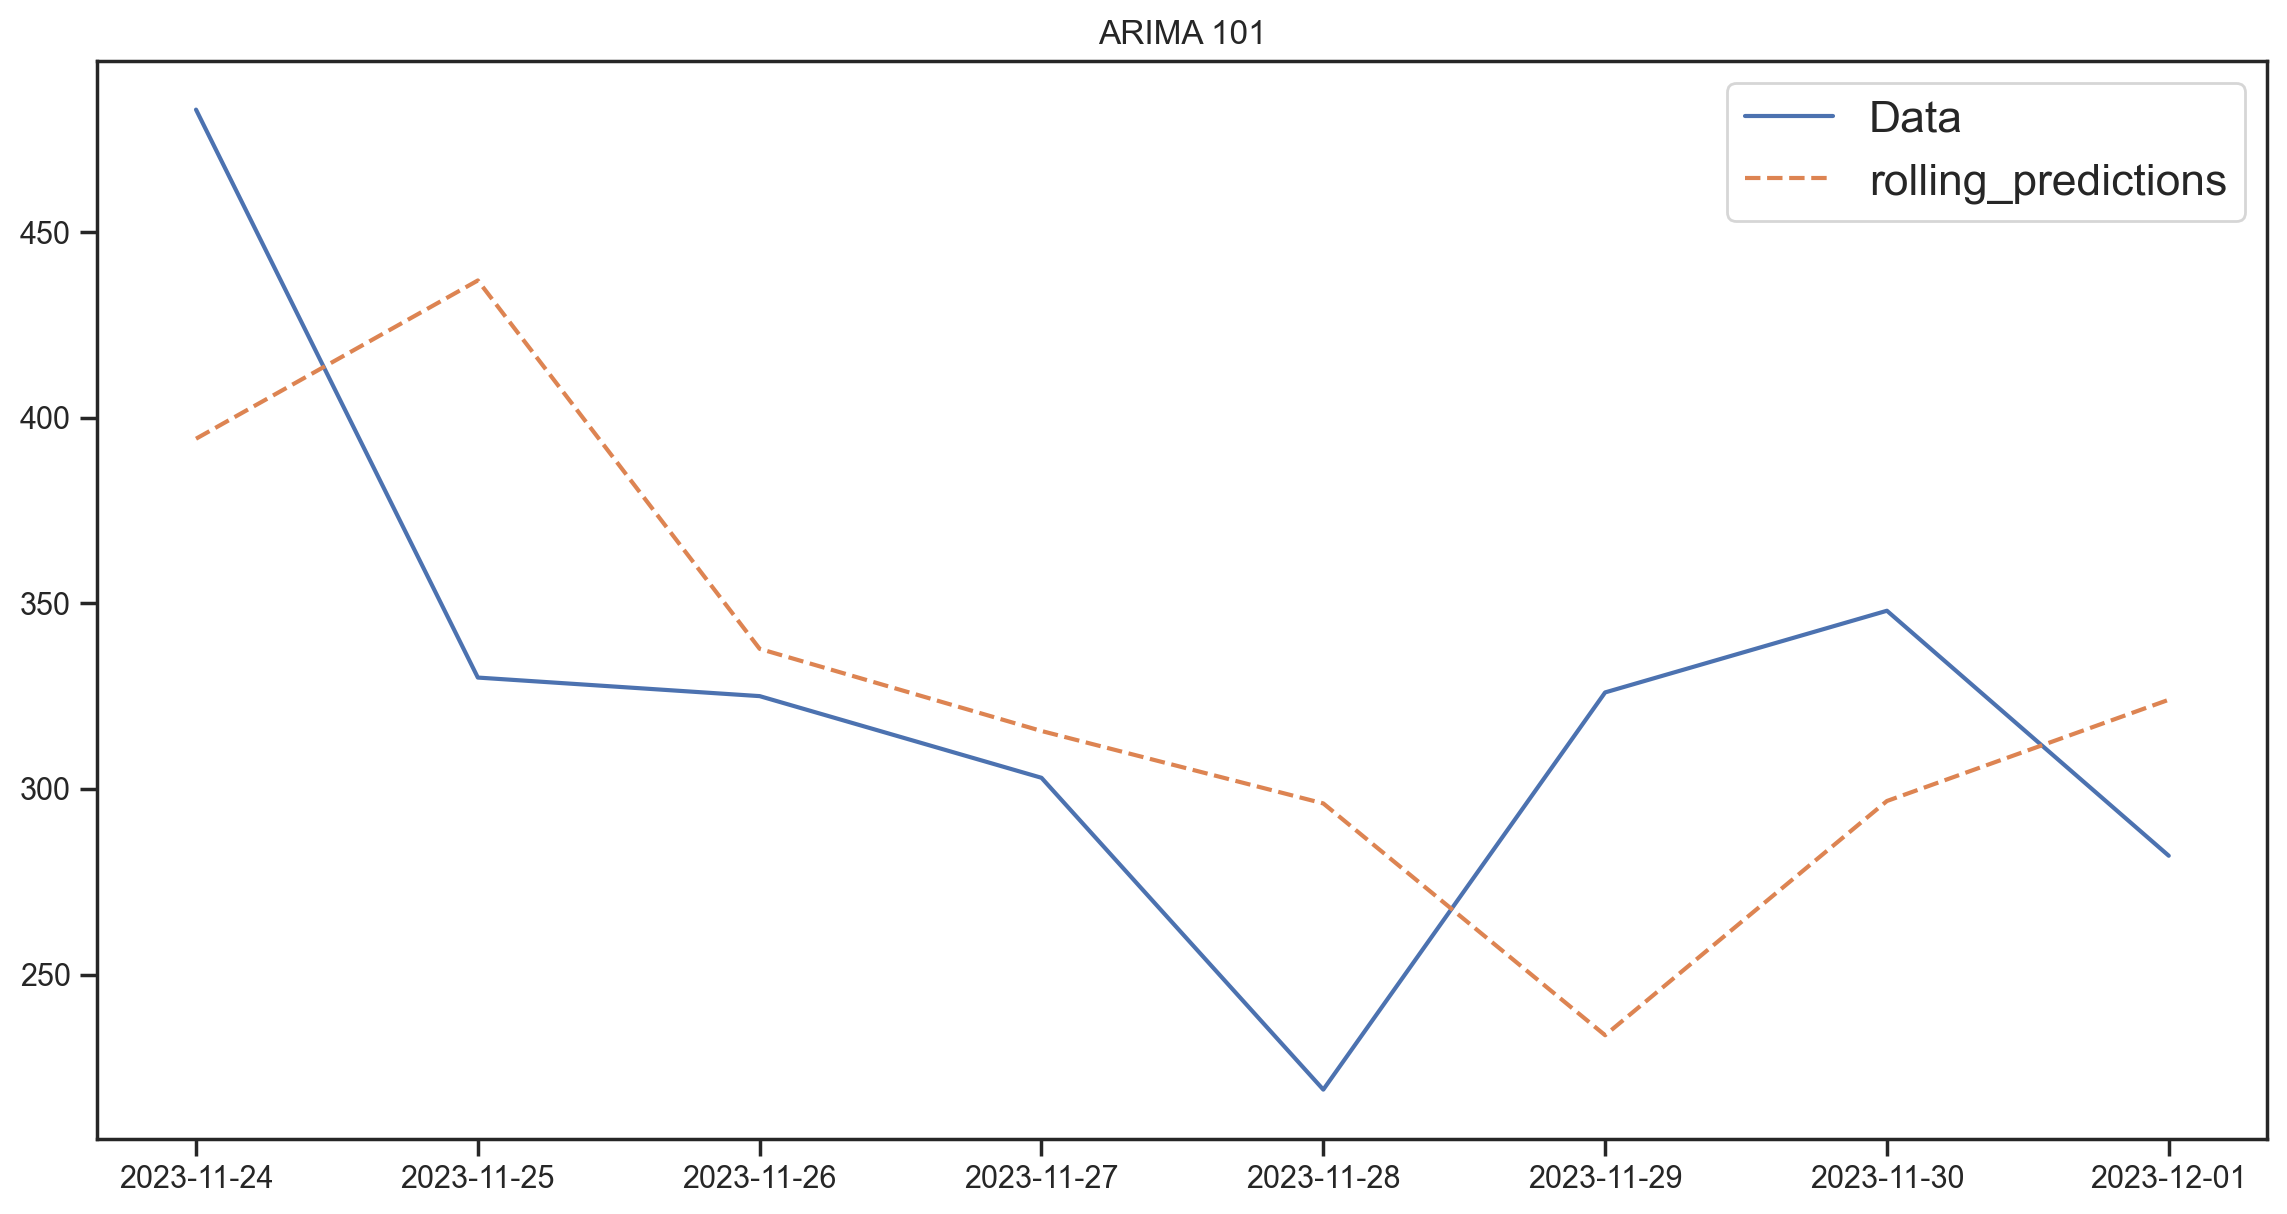

In [77]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions, '--')
plt.legend(('Data', 'rolling_predictions'), fontsize=16)
plt.title("ARIMA " + str(p) + str(d) + str(q))

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Shifted -1 predictions ARIMA 101')

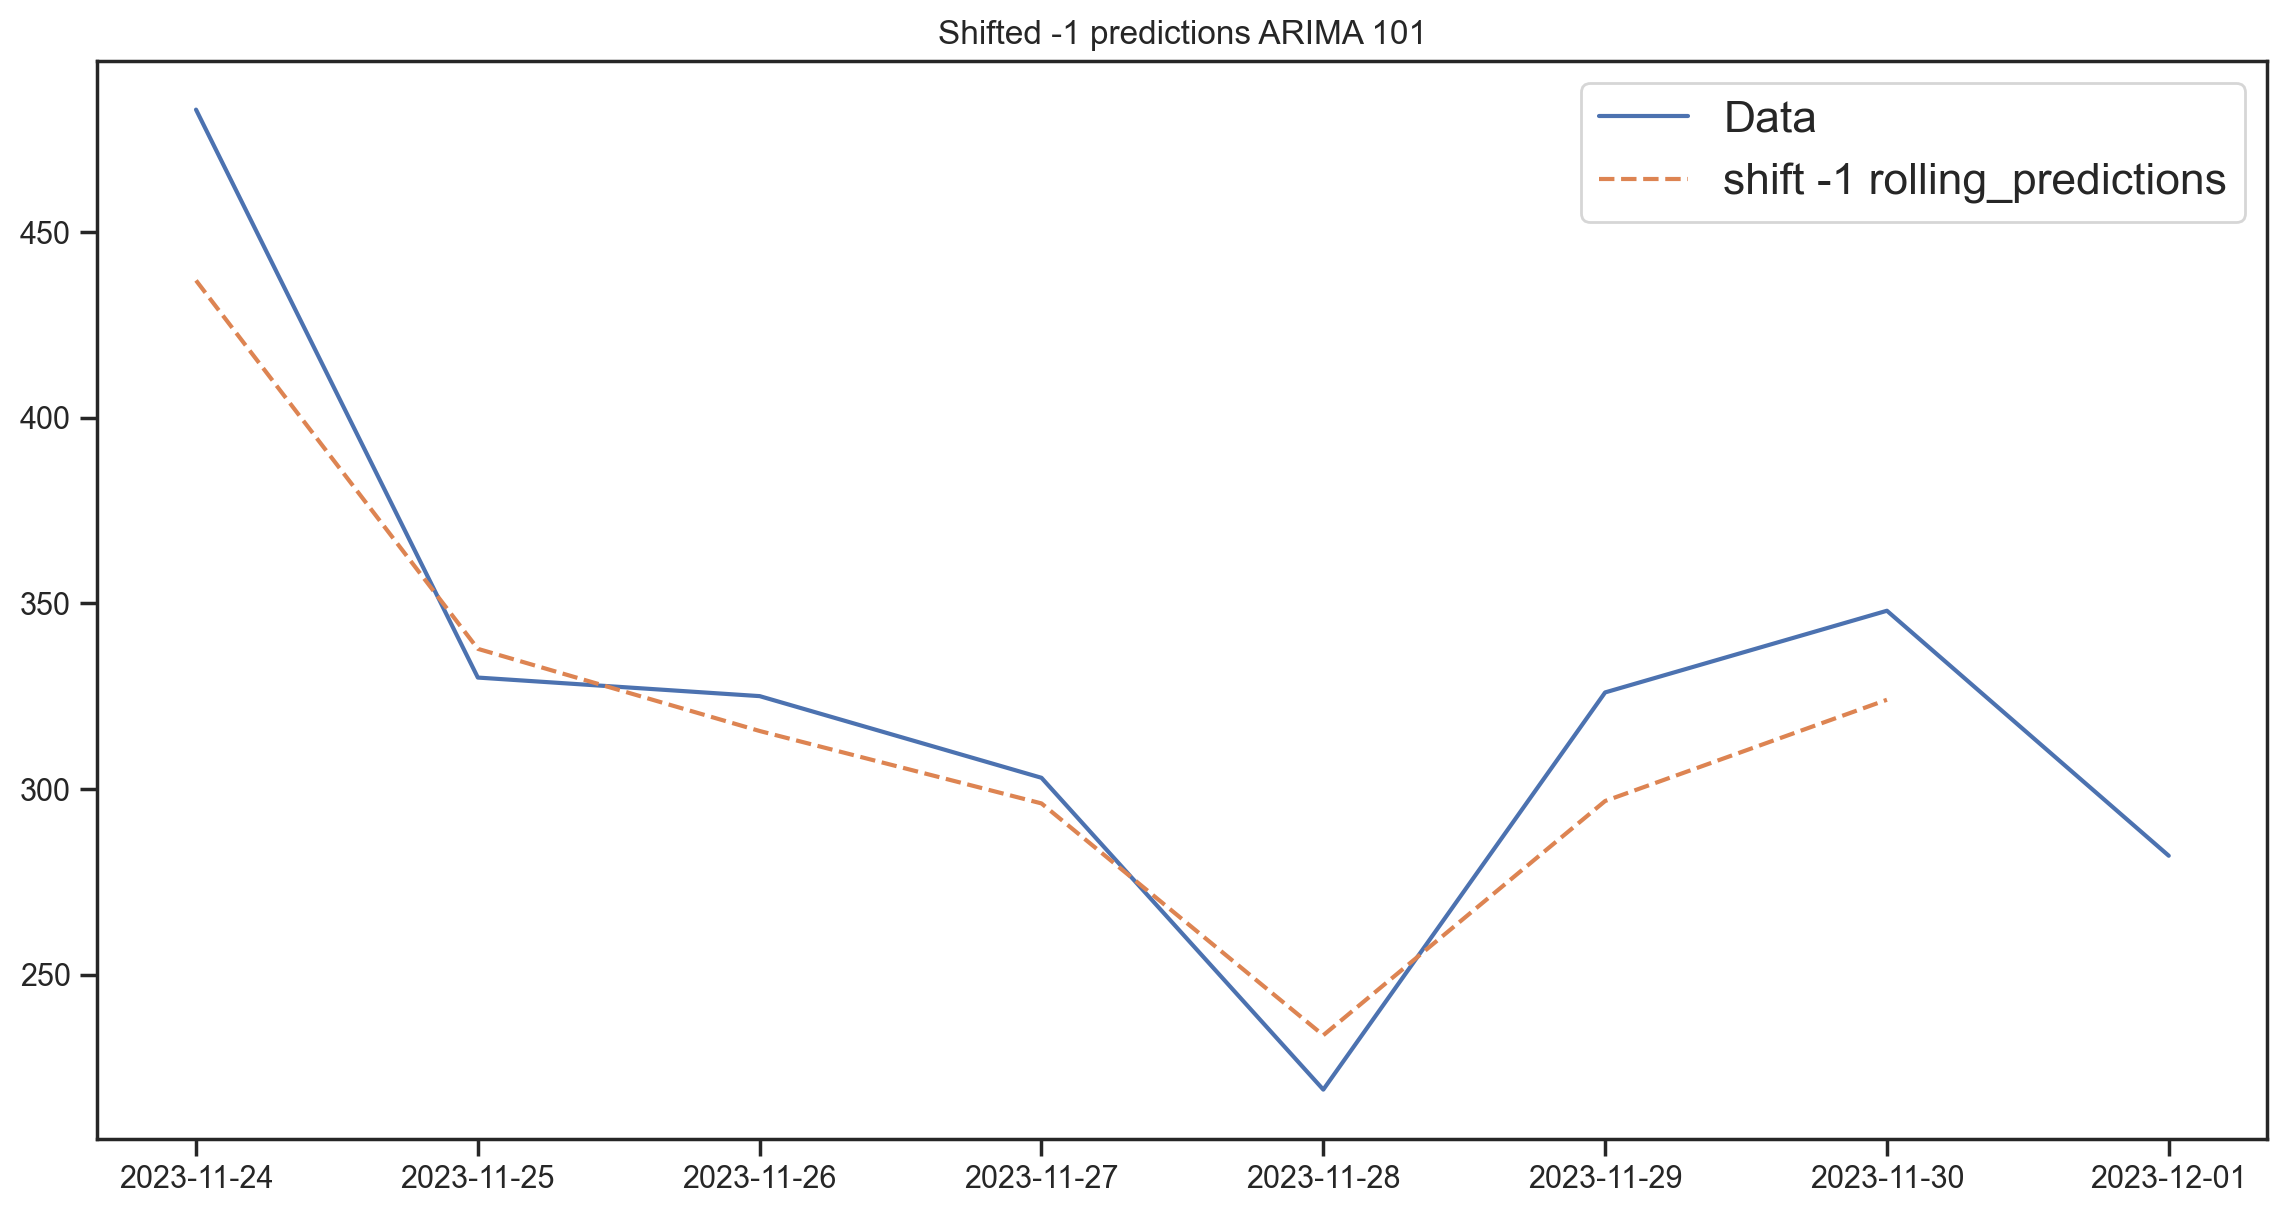

In [78]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions.shift(-1) , '--')
plt.legend(('Data', 'shift -1 rolling_predictions'), fontsize=16)
plt.title("Shifted -1 predictions ARIMA " + str(p) + str(d) + str(q))

### Rolling only AR 1

In [502]:
train_end = datetime(2023, 10, 23)
test_end = datetime(2023, 11, 22)

train_data = sector_51_copy[:train_end]['AQI']
test_data = sector_51_copy[train_end + timedelta(days=1):test_end]['AQI']

my_order = (1, 0, 0)
p,d,q = my_order
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = sector_51_copy[:train_end - timedelta(days=1)]['AQI']
    model = ARIMA(train_data, order=my_order)
    model_fit = model.fit()
    pred = model_fit.forecast()
    print("pred", pred)
    rolling_predictions[train_end] = pred

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-10-24    194.777743
Freq: D, dtype: float64
pred 2023-10-25    212.232759
Freq: D, dtype: float64
pred 2023-10-26    297.854721
Freq: D, dtype: float64
pred 2023-10-27    305.362304
Freq: D, dtype: float64
pred 2023-10-28    308.714756
Freq: D, dtype: float64
pred 2023-10-29    301.250125
Freq: D, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-10-30    208.961066
Freq: D, dtype: float64
pred 2023-10-31    248.019614
Freq: D, dtype: float64
pred 2023-11-01    313.69641
Freq: D, dtype: float64
pred 2023-11-02    205.662966
Freq: D, dtype: float64
pred 2023-11-03    317.768373
Freq: D, dtype: float64
pred 2023-11-04    408.490366
Freq: D, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-05    589.471804
Freq: D, dtype: float64
pred 2023-11-06    327.605164
Freq: D, dtype: float64
pred 2023-11-07    399.88314
Freq: D, dtype: float64
pred 2023-11-08    360.076382
Freq: D, dtype: float64
pred 2023-11-09    403.384635
Freq: D, dtype: float64
pred 2023-11-10    476.08059
Freq: D, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-11    288.792035
Freq: D, dtype: float64
pred 2023-11-12    287.149647
Freq: D, dtype: float64
pred 2023-11-13    305.407789
Freq: D, dtype: float64
pred 2023-11-14    405.88447
Freq: D, dtype: float64
pred 2023-11-15    372.723165
Freq: D, dtype: float64
pred 2023-11-16    327.918621
Freq: D, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-17    465.16068
Freq: D, dtype: float64
pred 2023-11-18    378.648055
Freq: D, dtype: float64
pred 2023-11-19    315.555206
Freq: D, dtype: float64
pred 2023-11-20    305.621438
Freq: D, dtype: float64
pred 2023-11-21    323.077718
Freq: D, dtype: float64
pred 2023-11-22    305.670622
Freq: D, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 100')

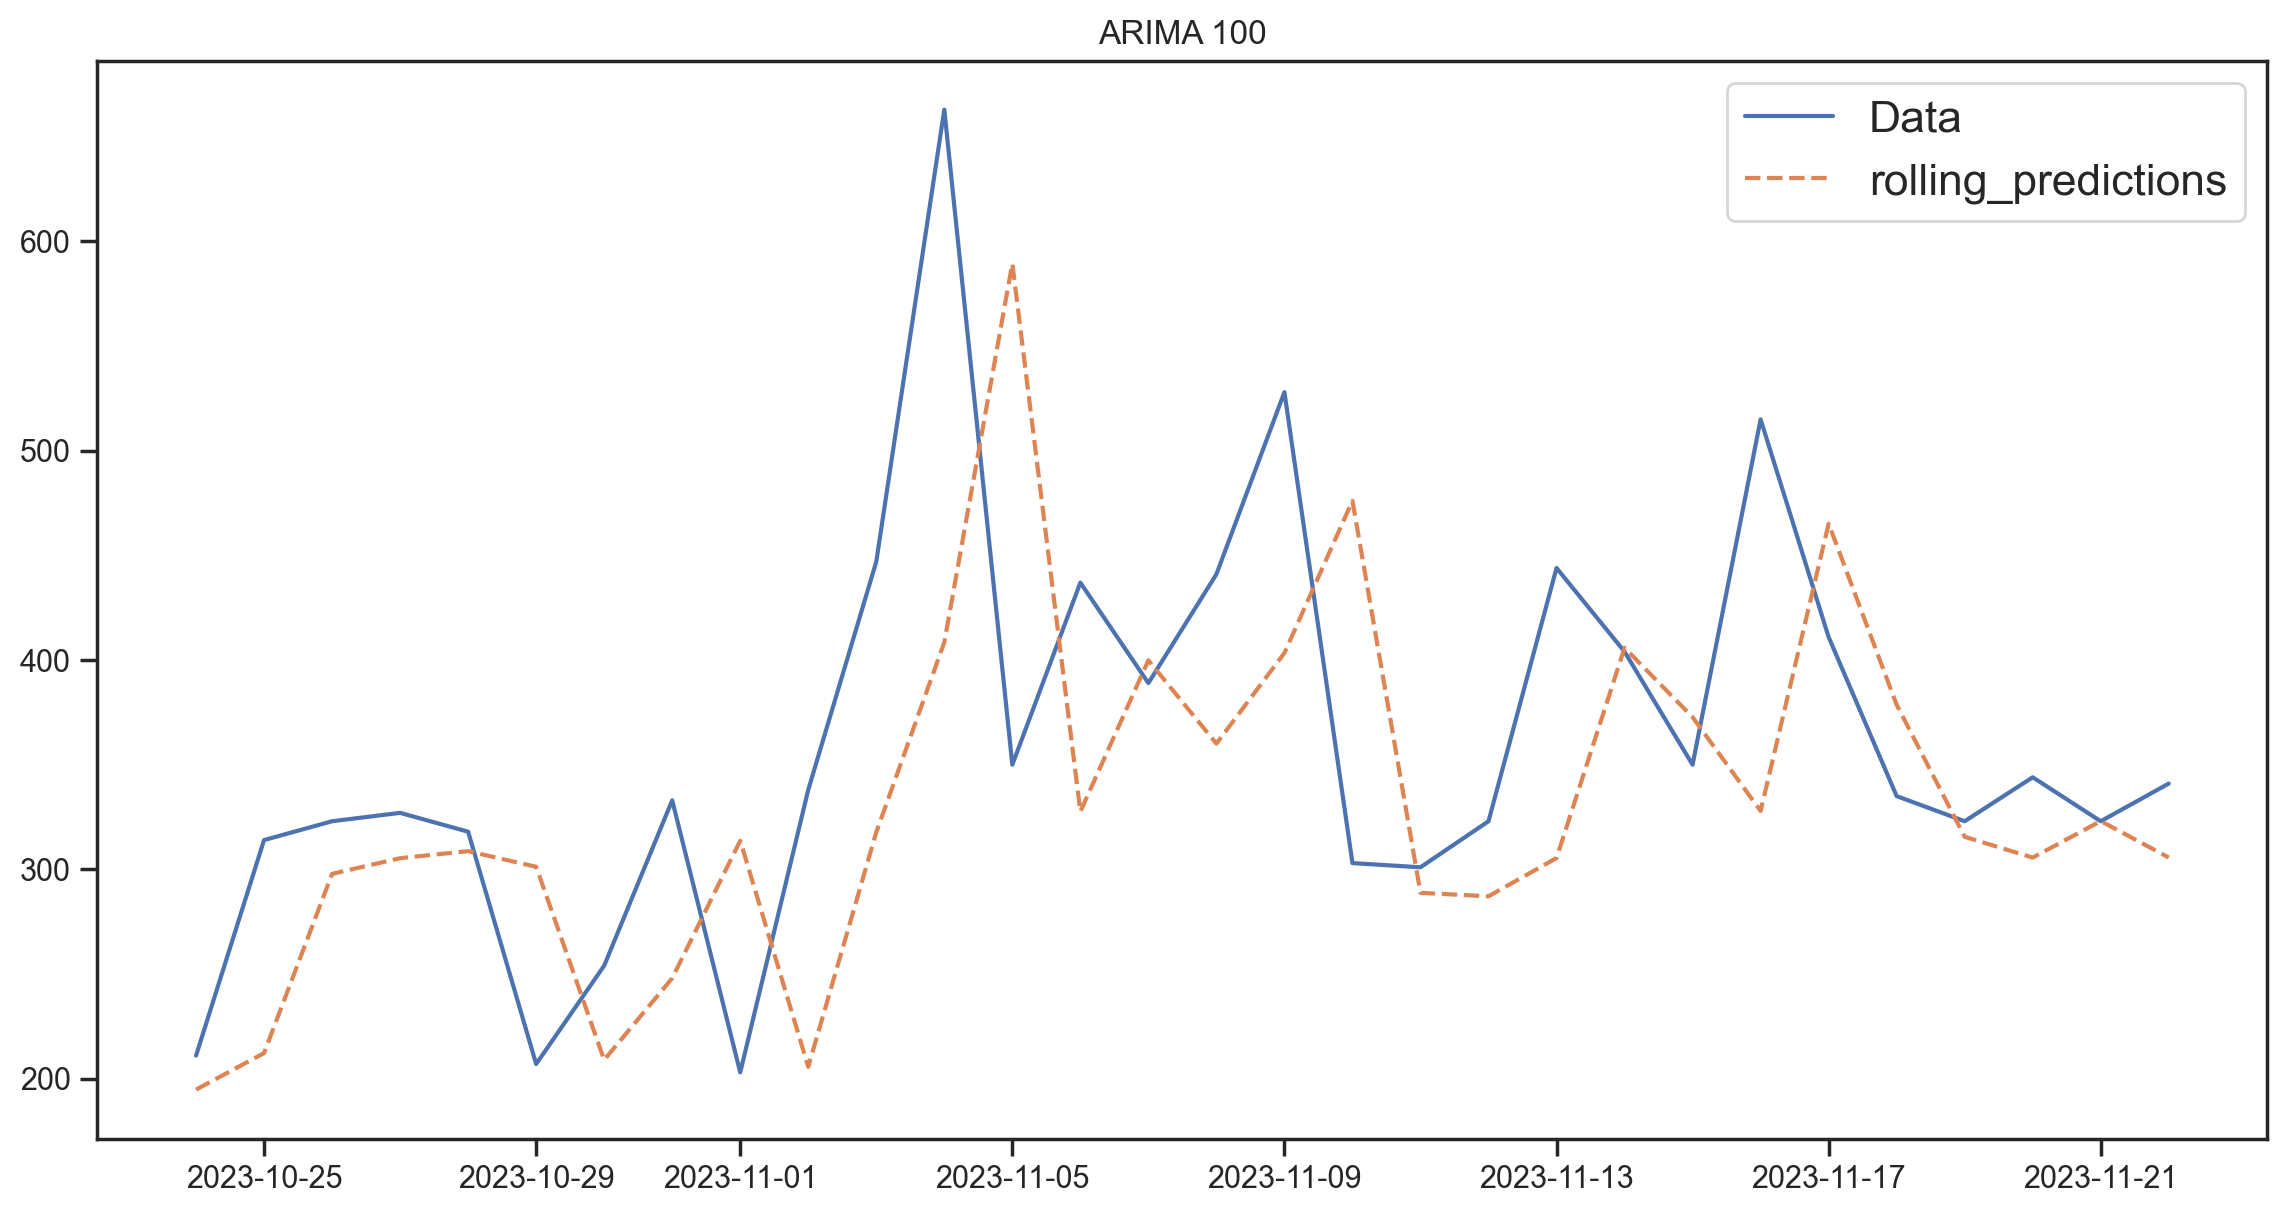

In [503]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions, '--')
plt.legend(('Data', 'rolling_predictions'), fontsize=16)
plt.title("ARIMA " + str(p) + str(d) + str(q))

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Shifted -1 predictions ARIMA 100')

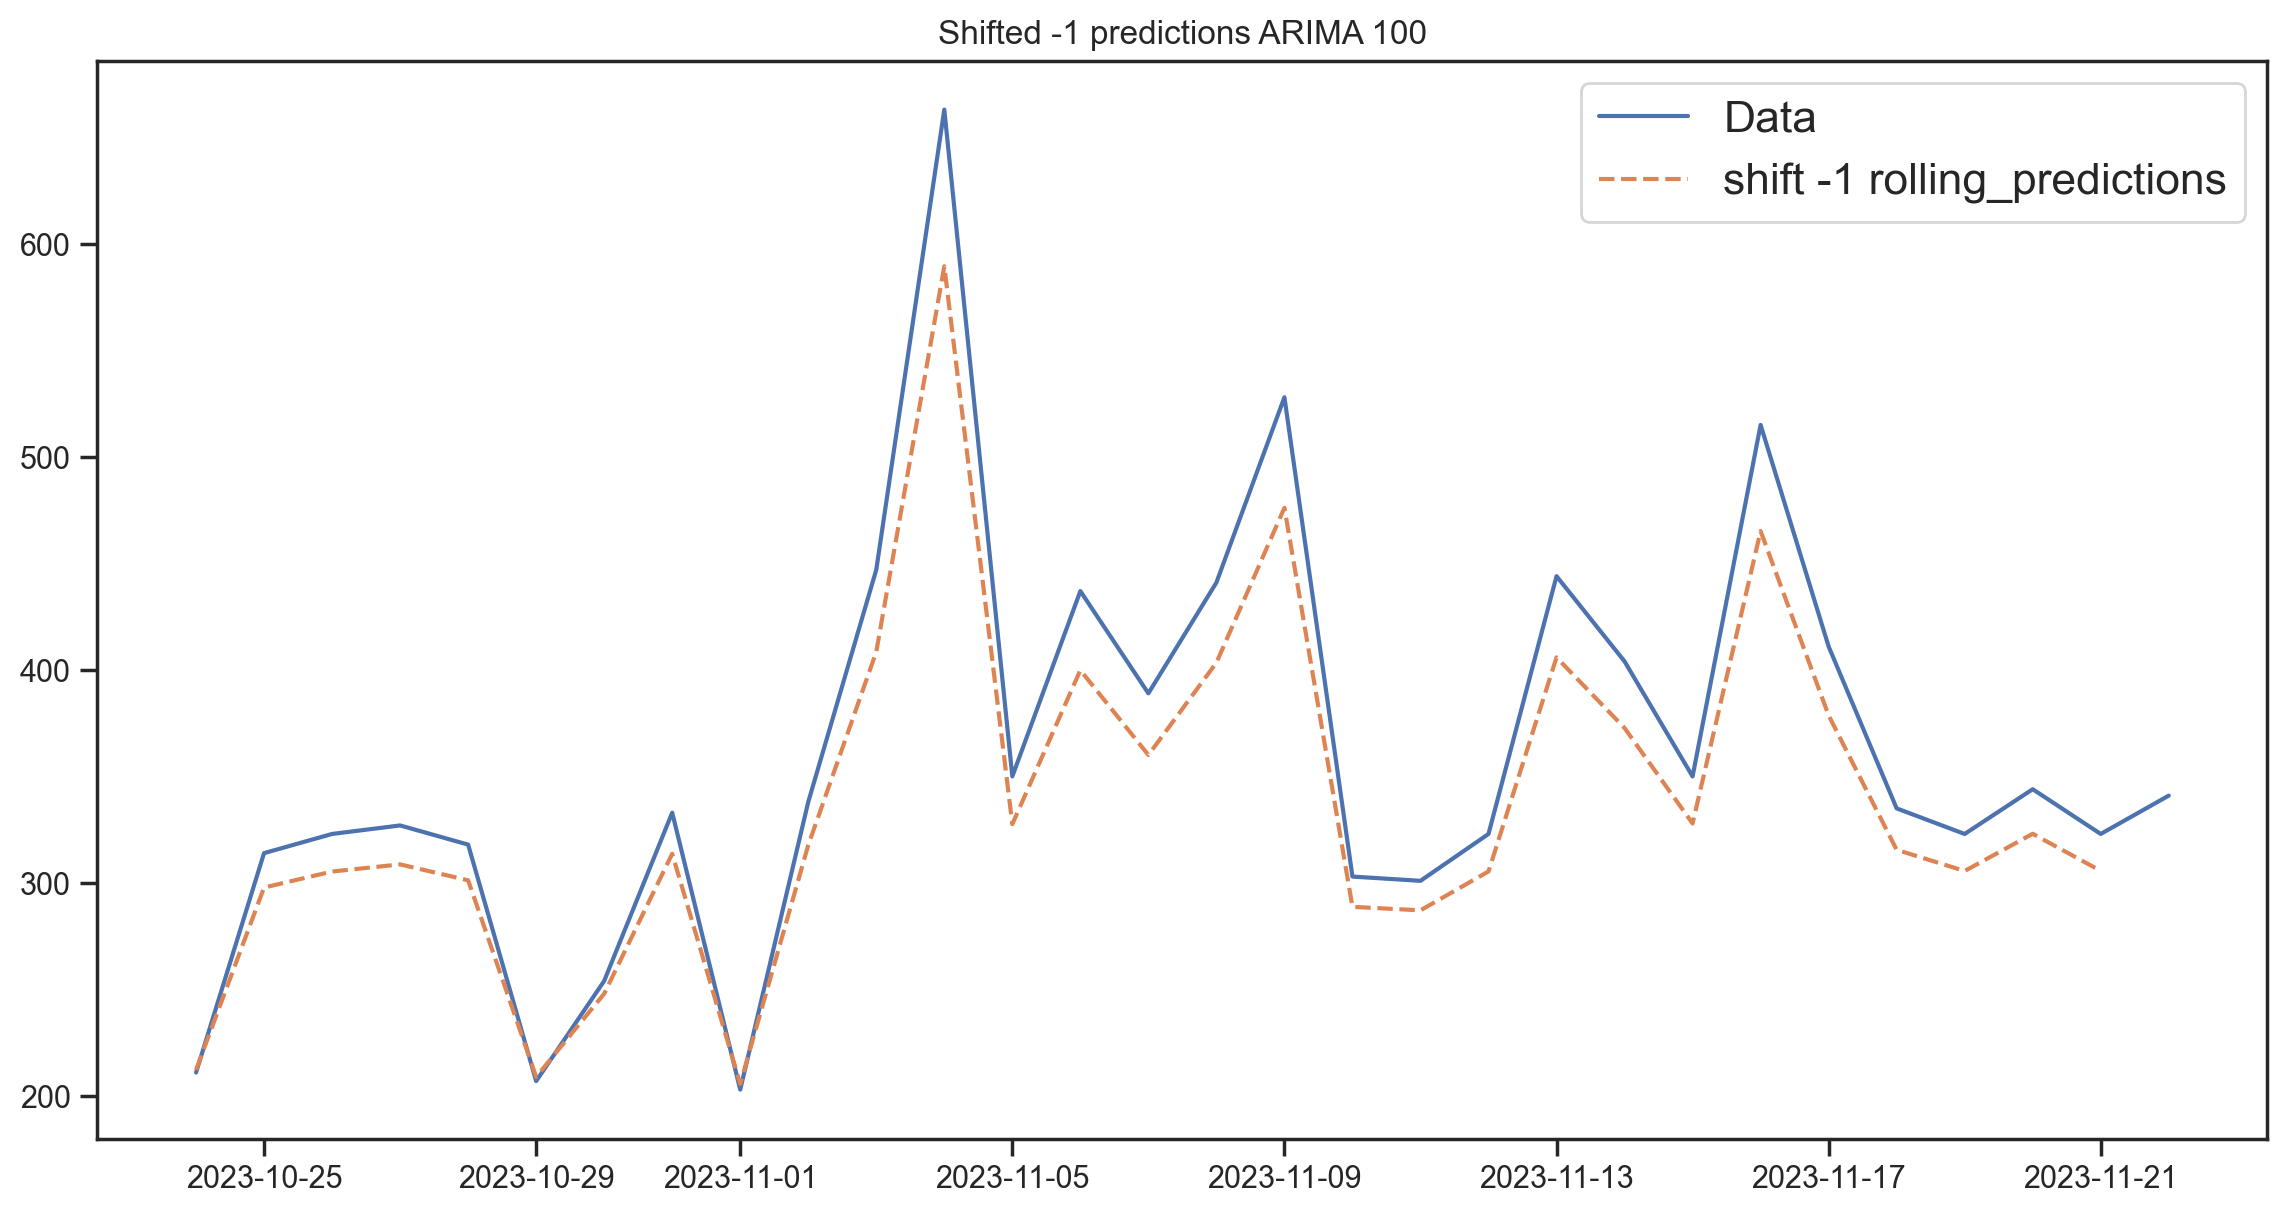

In [504]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions.shift(-1) , '--')
plt.legend(('Data', 'shift -1 rolling_predictions'), fontsize=16)
plt.title("Shifted -1 predictions ARIMA " + str(p) + str(d) + str(q))

### Rolling Only MA 1

In [505]:
train_end = datetime(2023, 10, 23)
test_end = datetime(2023, 11, 22)

train_data = sector_51_copy[:train_end]['AQI']
test_data = sector_51_copy[train_end + timedelta(days=1):test_end]['AQI']

my_order = (0, 0, 1)
p,d,q = my_order
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = sector_51_copy[:train_end - timedelta(days=1)]['AQI']
    model = ARIMA(train_data, order=my_order)
    model_fit = model.fit()
    pred = model_fit.forecast()
    print("pred", pred)
    rolling_predictions[train_end] = pred

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-10-24    165.675959
Freq: D, dtype: float64
pred 2023-10-25    248.22108
Freq: D, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-10-26    261.804205
Freq: D, dtype: float64
pred 2023-10-27    258.878241
Freq: D, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-10-28    263.541952
Freq: D, dtype: float64
pred 2023-10-29    254.594022
Freq: D, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-10-30    187.12443
Freq: D, dtype: float64
pred 2023-10-31    262.813864
Freq: D, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-01    265.076073
Freq: D, dtype: float64
pred 2023-11-02    177.638705
Freq: D, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


pred 2023-11-03    324.756982
Freq: D, dtype: float64
pred 2023-11-04    299.70682
Freq: D, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-05    459.609114
Freq: D, dtype: float64
pred 2023-11-06    147.295444
Freq: D, dtype: float64
pred 2023-11-07    409.006782
Freq: D, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-08    206.61627
Freq: D, dtype: float64
pred 2023-11-09    372.335067
Freq: D, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-10    321.380153
Freq: D, dtype: float64
pred 2023-11-11    208.052455
Freq: D, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-12    281.176174
Freq: D, dtype: float64
pred 2023-11-13    247.697584
Freq: D, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-14    349.286842
Freq: D, dtype: float64
pred 2023-11-15    256.42809
Freq: D, dtype: float64
pred 2023-11-16    282.08095
Freq: D, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-17    373.952701
Freq: D, dtype: float64
pred 2023-11-18    245.33624
Freq: D, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-19    280.059394
Freq: D, dtype: float64
pred 2023-11-20    249.397065
Freq: D, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

pred 2023-11-21    283.481657
Freq: D, dtype: float64
pred 2023-11-22    247.314127
Freq: D, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 001')

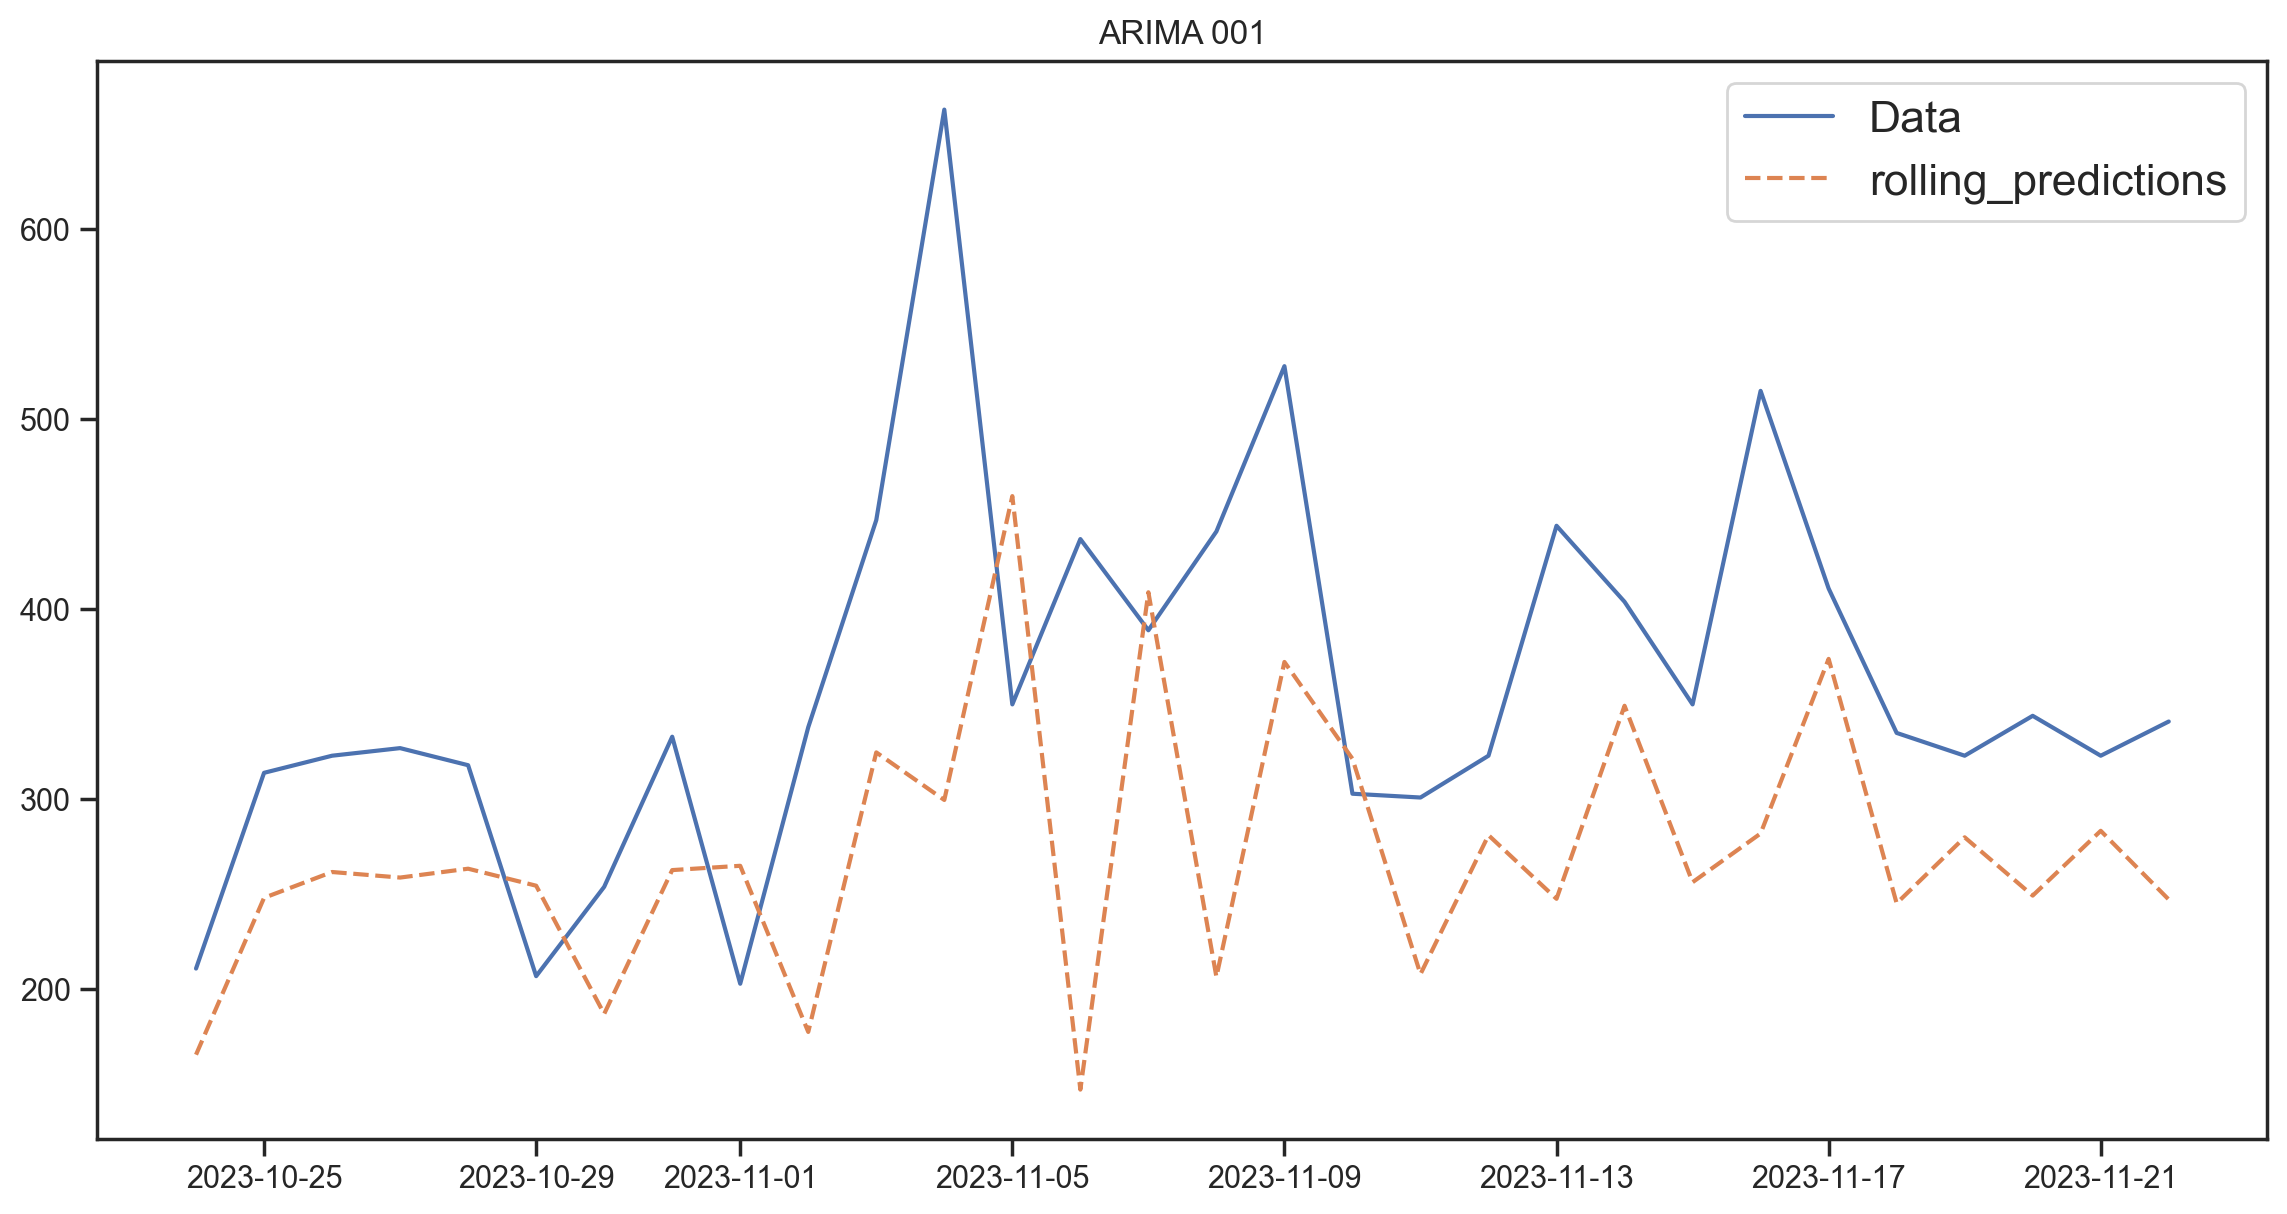

In [506]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions, '--')
plt.legend(('Data', 'rolling_predictions'), fontsize=16)
plt.title("ARIMA " + str(p) + str(d) + str(q))

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Shifted -1 predictions ARIMA 001')

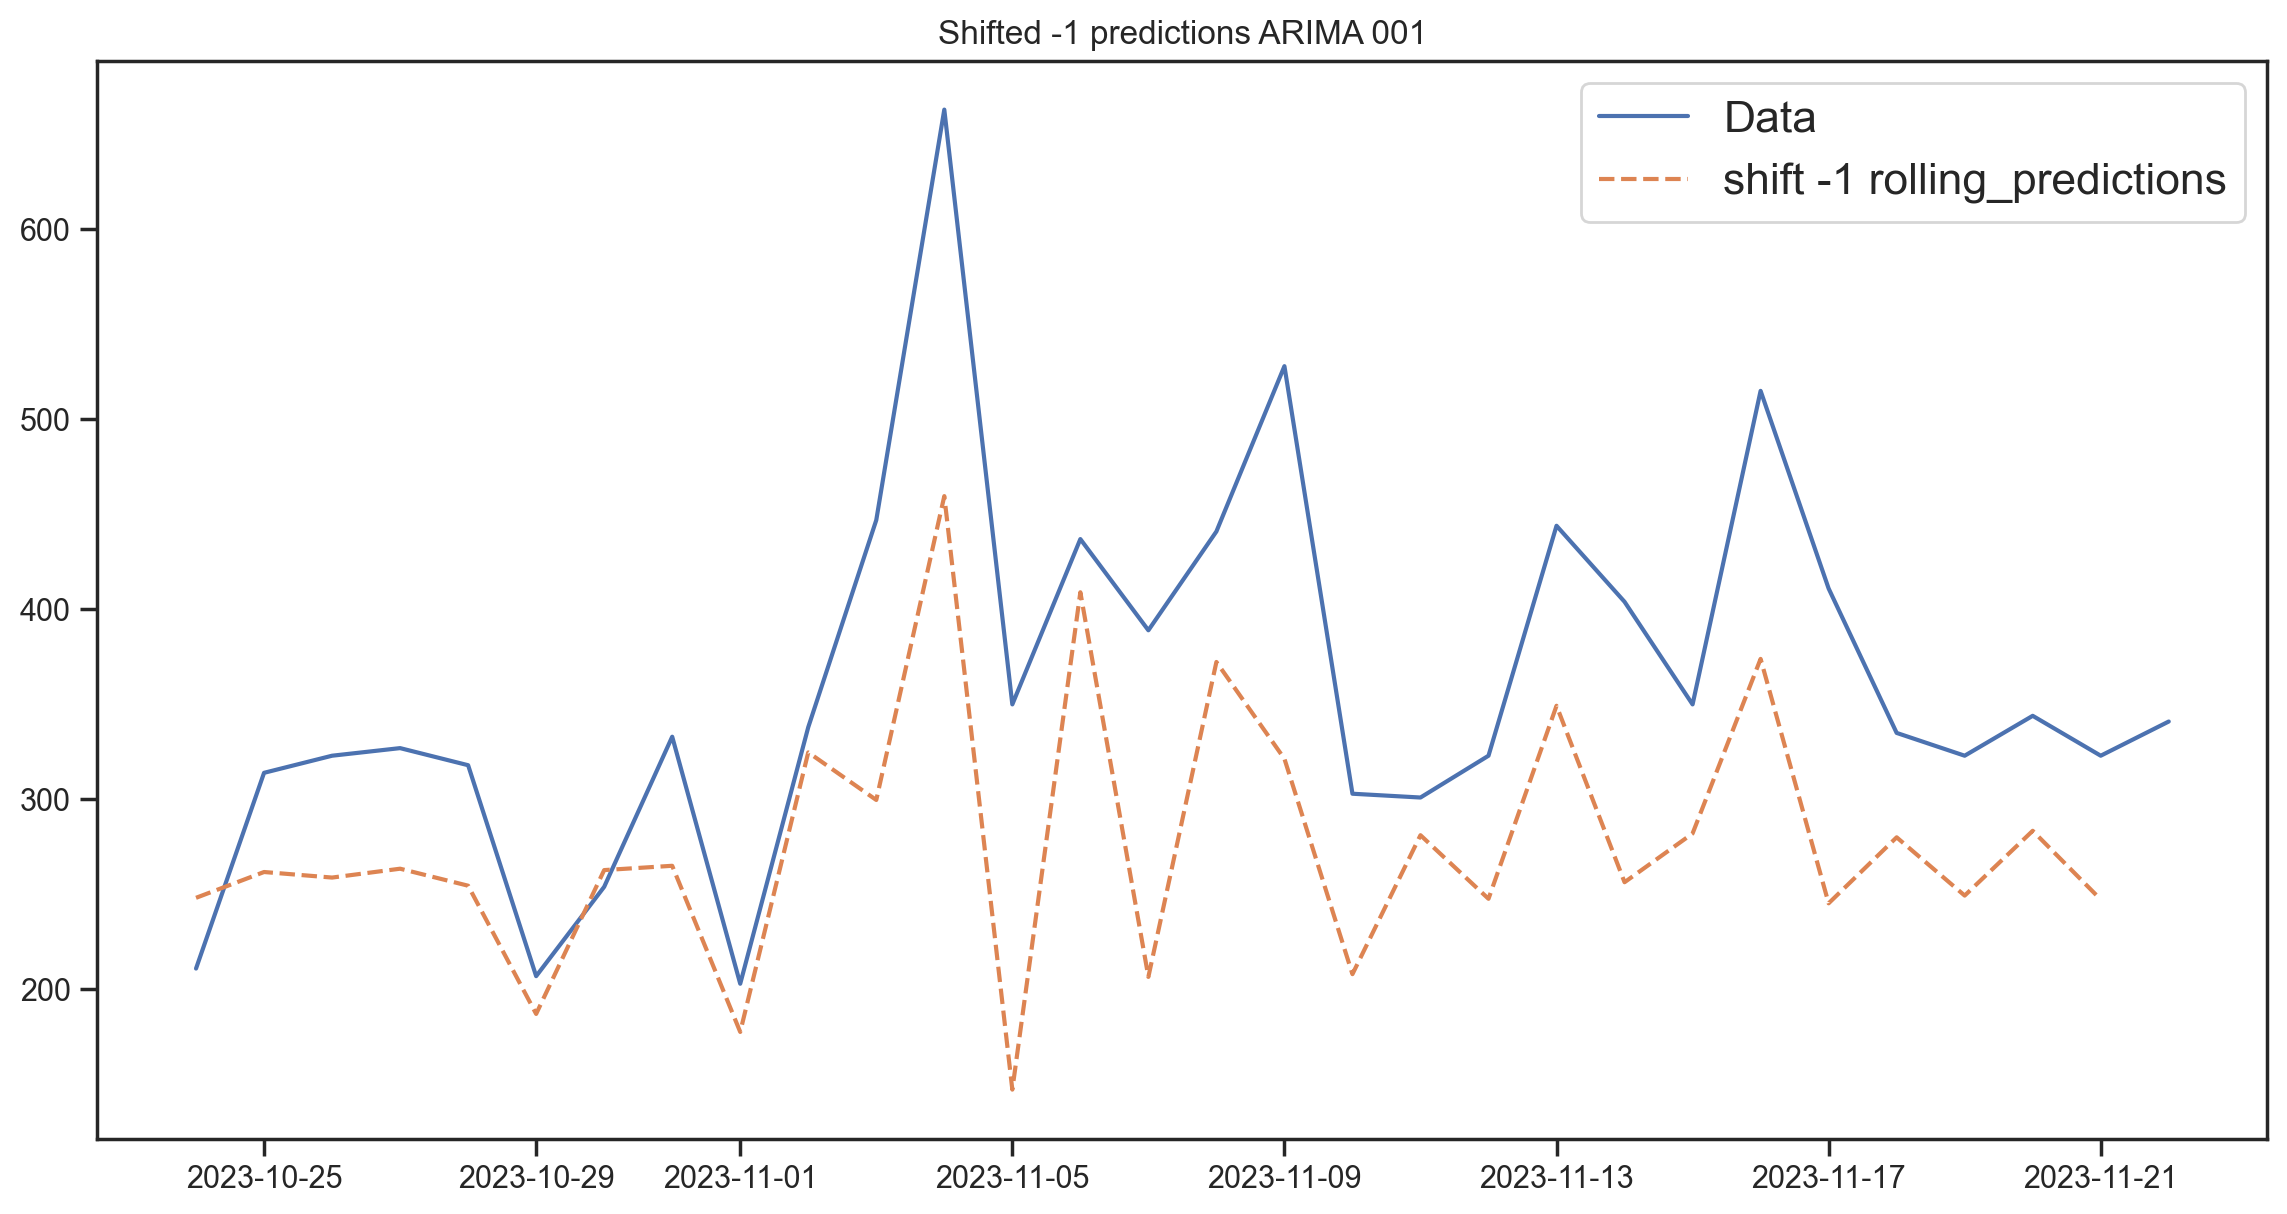

In [507]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions.shift(-1) , '--')
plt.legend(('Data', 'shift -1 rolling_predictions'), fontsize=16)
plt.title("Shifted -1 predictions ARIMA " + str(p) + str(d) + str(q))

### Without rolling ARIMA 1,0,1

In [512]:
train_end = datetime(2023, 11, 18) # 4 days
test_end = datetime(2023, 11, 22)

train_data = sector_51_copy[:train_end]['AQI']
test_data = sector_51_copy[train_end + timedelta(days=1):test_end]['AQI']

p, d, q = (1, 0, 1)
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()
print("Model summary ", model_fit.summary())

Model summary                                 SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                 1354
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7586.904
Date:                Fri, 24 Nov 2023   AIC                          15181.809
Time:                        21:47:32   BIC                          15202.652
Sample:                    03-05-2020   HQIC                         15189.614
                         - 11-18-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        221.1100     13.944     15.856      0.000     193.779     248.441
ar.L1          0.8856      0.012     71.010      0.000       0.861       0.910
ma.L1         -0.1880      0.025     

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [513]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
pred_start_date, pred_end_date

(Timestamp('2023-11-19 00:00:00'), Timestamp('2023-11-22 00:00:00'))

In [514]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions
residuals

From Date
2023-11-19   -10.507419
2023-11-20    23.351793
2023-11-21    13.739803
2023-11-22    41.824928
dtype: float64

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 101')

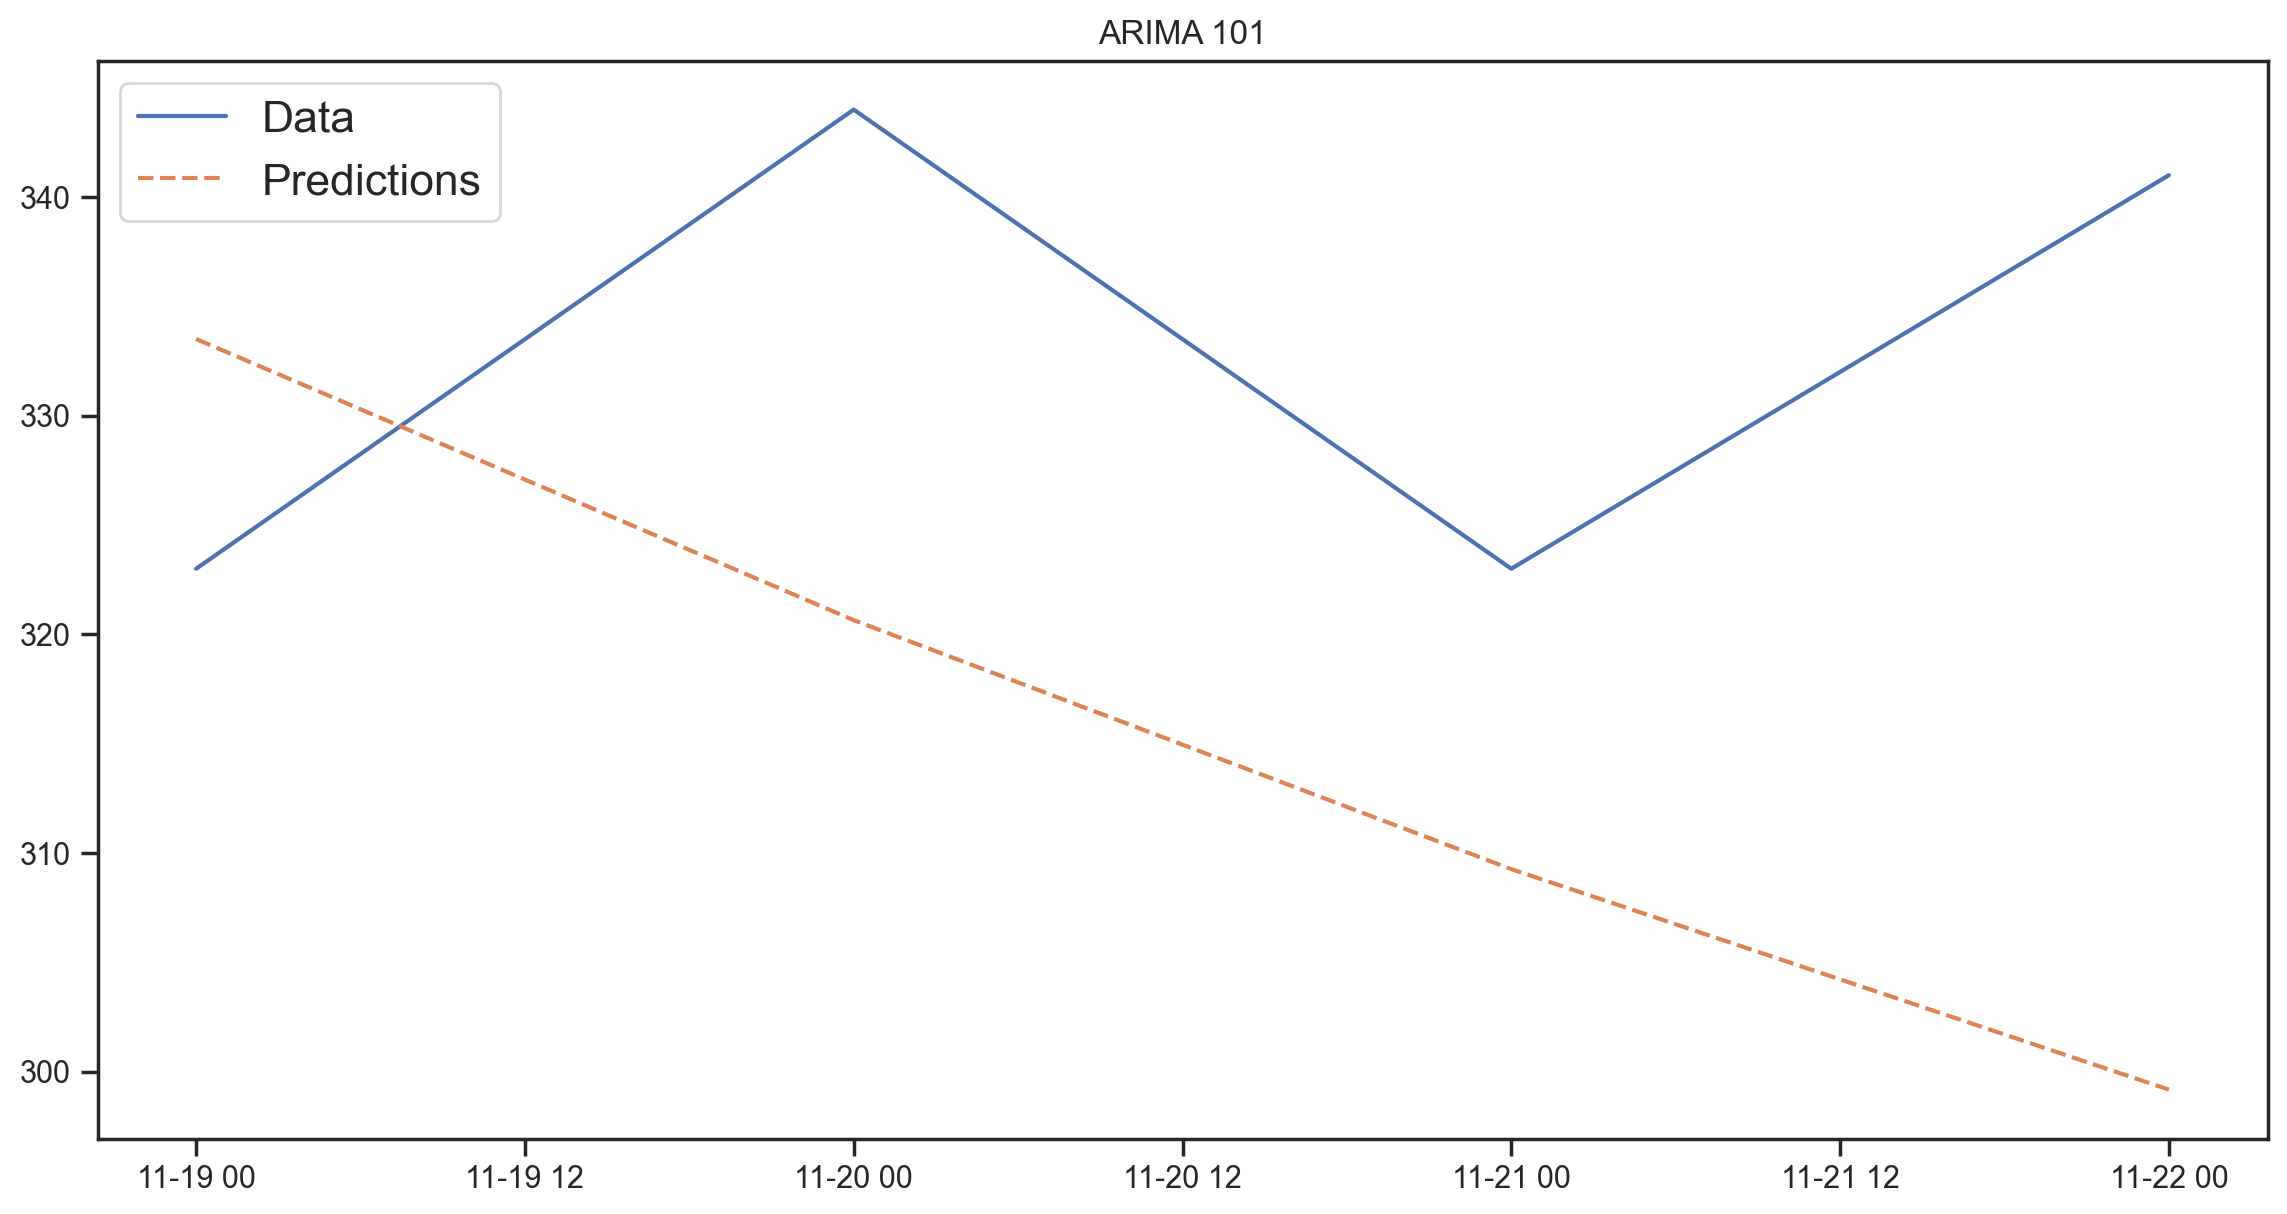

In [515]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(predictions, '--')
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title("ARIMA " + str(p) + str(d) + str(q))

- ## Note: We are not taking 24 hour average to compute AQI because our data is itself daily data.

In [371]:
model_fit.aic 
model_fit.aicc

15160.188001341417

15160.217696961314

In [372]:
model_fit.bic

15181.025362367829

In [373]:
model_fit.params

const      220.885547
ar.L1        0.886752
ma.L1       -0.188520
sigma2    4323.482035
dtype: float64

In [374]:
model_fit.seasonalarparams
model_fit.seasonalmaparams

array([], dtype=float64)

array([], dtype=float64)

### Random forest to calculate AQI

In [458]:
sector_51_rf = sector_51_copy.copy()

In [459]:
sector_51_rf

PM2.5  PM2.5_SubIndex    PM10  PM10_SubIndex     NO    NO2  \
From Date                                                                 
2020-03-05   36.51       60.850000   73.15      73.150000   5.91  24.28   
2020-03-06   22.23       37.050000   39.15      39.150000   5.89  23.24   
2020-03-07   41.44       69.066667   77.68      77.680000   8.54  21.67   
2020-03-08   62.64      108.800000  130.39     120.260000  18.77  24.16   
2020-03-09   83.74      179.133333  127.54     118.360000   4.88  22.10   
...            ...             ...     ...            ...    ...    ...   
2023-11-19  149.81      322.930769  234.32     189.546667  16.35  15.63   
2023-11-20  177.53      344.253846  321.96     271.960000  15.10  11.77   
2023-11-21  150.27      323.284615  222.25     181.500000  15.10  11.78   
2023-11-22  173.00      340.769231  281.50     231.500000  15.10  11.77   
2023-11-23  256.99      405.376923  803.59     866.987500  15.99  14.23   

              NOx  NOx_SubIndex    CO  CO_SubIndex  Ozone  Ozone_SubIndex  \
From Date                                                                   
2020-03-05  30.19       37.7375  0.51       25.500  71.07           71.07   
2020-03-06  29.12       36.4000  0.45       22.500  55.32           55.32   
2020-03-07  30.20       37.7500  0.63       31.500  46.15           46.15   
2020-03-08  42.94       53.6750  0.86       43.000  41.67           41.67   
2020-03-09  26.98       33.7250  0.68       34.000  49.61           49.61   
...           ...           ...   ...          ...    ...             ...   
2023-11-19  20.79       25.9875  1.87       93.500  10.31           10.31   
2023-11-20  19.21       24.0125  2.51      106.375  34.88           34.88   
2023-11-21  19.21       24.0125  2.27      103.375  49.94           49.94   
2023-11-22  19.21       24.0125  1.93       96.500  49.94           49.94   
2023-11-23  16.59       20.7375  5.10      138.750  34.88           34.88   

            Checks    AQI  
From Date                  
2020-03-05       5   73.0  
2020-03-06       5   55.0  
2020-03-07       5   78.0  
2020-03-08       5  120.0  
2020-03-09       5  179.0  
...            ...    ...  
2023-11-19       5  323.0  
2023-11-20       5  344.0  
2023-11-21       5  323.0  
2023-11-22       5  341.0  
2023-11-23       5  867.0  

[1359 rows x 14 columns]

In [460]:
sector_51_rf.columns

Index(['PM2.5', 'PM2.5_SubIndex', 'PM10', 'PM10_SubIndex', 'NO', 'NO2', 'NOx',
       'NOx_SubIndex', 'CO', 'CO_SubIndex', 'Ozone', 'Ozone_SubIndex',
       'Checks', 'AQI'],
      dtype='object', name='')

In [461]:
sector_51_rf = sector_51_rf[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'Ozone', 'AQI']]
sector_51_rf

PM2.5    PM10     NO    NO2    NOx    CO  Ozone    AQI
From Date                                                          
2020-03-05   36.51   73.15   5.91  24.28  30.19  0.51  71.07   73.0
2020-03-06   22.23   39.15   5.89  23.24  29.12  0.45  55.32   55.0
2020-03-07   41.44   77.68   8.54  21.67  30.20  0.63  46.15   78.0
2020-03-08   62.64  130.39  18.77  24.16  42.94  0.86  41.67  120.0
2020-03-09   83.74  127.54   4.88  22.10  26.98  0.68  49.61  179.0
...            ...     ...    ...    ...    ...   ...    ...    ...
2023-11-19  149.81  234.32  16.35  15.63  20.79  1.87  10.31  323.0
2023-11-20  177.53  321.96  15.10  11.77  19.21  2.51  34.88  344.0
2023-11-21  150.27  222.25  15.10  11.78  19.21  2.27  49.94  323.0
2023-11-22  173.00  281.50  15.10  11.77  19.21  1.93  49.94  341.0
2023-11-23  256.99  803.59  15.99  14.23  16.59  5.10  34.88  867.0

[1359 rows x 8 columns]

In [478]:
train_end = datetime(2023, 10, 23)
test_end = datetime(2023, 11, 22)

train_data = sector_51_rf[:train_end]
test_data = sector_51_rf[train_end + timedelta(days=1):test_end]

In [479]:
train_data

PM2.5    PM10     NO    NO2    NOx    CO  Ozone    AQI
From Date                                                          
2020-03-05   36.51   73.15   5.91  24.28  30.19  0.51  71.07   73.0
2020-03-06   22.23   39.15   5.89  23.24  29.12  0.45  55.32   55.0
2020-03-07   41.44   77.68   8.54  21.67  30.20  0.63  46.15   78.0
2020-03-08   62.64  130.39  18.77  24.16  42.94  0.86  41.67  120.0
2020-03-09   83.74  127.54   4.88  22.10  26.98  0.68  49.61  179.0
...            ...     ...    ...    ...    ...   ...    ...    ...
2023-10-19   66.51  148.85  16.33  37.68  26.93  0.78  30.80  133.0
2023-10-20  117.41  221.67  76.15  39.22  78.73  1.45  30.50  291.0
2023-10-21  154.40  292.37  67.40  49.99  76.57  1.62  29.79  326.0
2023-10-22  142.95  231.87  75.71  48.79  79.56  1.58  30.77  318.0
2023-10-23   86.98  135.59  44.31  44.36  46.61  1.20  29.79  190.0

[1328 rows x 8 columns]

In [481]:
X_train_data = train_data.drop(['AQI'], axis=1)
y_train_data = train_data['AQI'].values

In [482]:
X_train_data

PM2.5    PM10     NO    NO2    NOx    CO  Ozone
From Date                                                   
2020-03-05   36.51   73.15   5.91  24.28  30.19  0.51  71.07
2020-03-06   22.23   39.15   5.89  23.24  29.12  0.45  55.32
2020-03-07   41.44   77.68   8.54  21.67  30.20  0.63  46.15
2020-03-08   62.64  130.39  18.77  24.16  42.94  0.86  41.67
2020-03-09   83.74  127.54   4.88  22.10  26.98  0.68  49.61
...            ...     ...    ...    ...    ...   ...    ...
2023-10-19   66.51  148.85  16.33  37.68  26.93  0.78  30.80
2023-10-20  117.41  221.67  76.15  39.22  78.73  1.45  30.50
2023-10-21  154.40  292.37  67.40  49.99  76.57  1.62  29.79
2023-10-22  142.95  231.87  75.71  48.79  79.56  1.58  30.77
2023-10-23   86.98  135.59  44.31  44.36  46.61  1.20  29.79

[1328 rows x 7 columns]

In [483]:
y_train_data

array([ 73.,  55.,  78., ..., 326., 318., 190.])

In [484]:
test_data

PM2.5    PM10      NO     NO2     NOx    CO  Ozone    AQI
From Date                                                             
2023-10-24   93.18  188.28   35.58   48.30   44.89  1.12  30.52  211.0
2023-10-25  138.20  235.26   46.76   52.34   55.61  1.38  30.42  314.0
2023-10-26  150.31  325.29   48.87   53.01   56.49  1.40  30.50  323.0
2023-10-27  155.06  314.72  121.43   59.24  118.92  2.20  30.39  327.0
2023-10-28  143.38  280.44  131.71   76.85  137.67  2.45  30.17  318.0
2023-10-29   92.04  161.83   39.70   74.59   62.08  1.94  31.20  207.0
2023-10-30  106.16  171.23   18.13   72.35   44.23  1.48  30.17  254.0
2023-10-31  163.24  252.50    7.58   79.73   46.53  1.57  44.34  333.0
2023-11-01   90.80  156.81   40.16   69.99   58.54  2.04  30.18  203.0
2023-11-02  169.72  295.43  121.61   89.89   98.44  3.39  30.39  338.0
2023-11-03  311.11  335.01   64.47   86.39   61.14  3.32  30.99  447.0
2023-11-04  357.39  640.62   55.81   89.20   70.45  4.03  35.86  663.0
2023-11-05  172.64  390.40   68.11  128.49  100.80  3.28  17.54  350.0
2023-11-06  297.54  455.15    6.12   35.39   18.96  3.48  20.89  437.0
2023-11-07  222.18  421.06   81.22   87.72  103.38  4.07  20.99  389.0
2023-11-08  302.78  419.93  166.83  176.38  146.43  4.61  26.93  441.0
2023-11-09  342.28  532.25   21.78   64.41   29.04  3.73  19.78  528.0
2023-11-10  123.29  205.12   50.95   74.56   63.84  2.54  12.80  303.0
2023-11-11  121.53  198.35   39.01   57.53   44.87  2.49  15.64  301.0
2023-11-12  150.01  221.22   26.83   46.19   32.74  2.73  23.08  323.0
2023-11-13  307.18  413.21   20.60   11.97   33.04  3.64  10.67  444.0
2023-11-14  255.45  382.83   41.01   46.24   51.60  4.47  10.30  404.0
2023-11-15  185.14  347.84   53.57   42.98   47.47  3.11  10.41  350.0
2023-11-16  399.47  460.70   45.60   45.84   34.66  2.82  10.34  515.0
2023-11-17  253.84  438.72  130.01   75.42   77.08  3.27  10.30  411.0
2023-11-18  165.80  284.23   42.40   66.68   42.47  1.95  10.31  335.0
2023-11-19  149.81  234.32   16.35   15.63   20.79  1.87  10.31  323.0
2023-11-20  177.53  321.96   15.10   11.77   19.21  2.51  34.88  344.0
2023-11-21  150.27  222.25   15.10   11.78   19.21  2.27  49.94  323.0
2023-11-22  173.00  281.50   15.10   11.77   19.21  1.93  49.94  341.0

In [485]:
X_test_data = test_data.drop(['AQI'], axis=1)
y_test_data = test_data['AQI'].values

In [486]:
X_test_data

PM2.5    PM10      NO     NO2     NOx    CO  Ozone
From Date                                                      
2023-10-24   93.18  188.28   35.58   48.30   44.89  1.12  30.52
2023-10-25  138.20  235.26   46.76   52.34   55.61  1.38  30.42
2023-10-26  150.31  325.29   48.87   53.01   56.49  1.40  30.50
2023-10-27  155.06  314.72  121.43   59.24  118.92  2.20  30.39
2023-10-28  143.38  280.44  131.71   76.85  137.67  2.45  30.17
2023-10-29   92.04  161.83   39.70   74.59   62.08  1.94  31.20
2023-10-30  106.16  171.23   18.13   72.35   44.23  1.48  30.17
2023-10-31  163.24  252.50    7.58   79.73   46.53  1.57  44.34
2023-11-01   90.80  156.81   40.16   69.99   58.54  2.04  30.18
2023-11-02  169.72  295.43  121.61   89.89   98.44  3.39  30.39
2023-11-03  311.11  335.01   64.47   86.39   61.14  3.32  30.99
2023-11-04  357.39  640.62   55.81   89.20   70.45  4.03  35.86
2023-11-05  172.64  390.40   68.11  128.49  100.80  3.28  17.54
2023-11-06  297.54  455.15    6.12   35.39   18.96  3.48  20.89
2023-11-07  222.18  421.06   81.22   87.72  103.38  4.07  20.99
2023-11-08  302.78  419.93  166.83  176.38  146.43  4.61  26.93
2023-11-09  342.28  532.25   21.78   64.41   29.04  3.73  19.78
2023-11-10  123.29  205.12   50.95   74.56   63.84  2.54  12.80
2023-11-11  121.53  198.35   39.01   57.53   44.87  2.49  15.64
2023-11-12  150.01  221.22   26.83   46.19   32.74  2.73  23.08
2023-11-13  307.18  413.21   20.60   11.97   33.04  3.64  10.67
2023-11-14  255.45  382.83   41.01   46.24   51.60  4.47  10.30
2023-11-15  185.14  347.84   53.57   42.98   47.47  3.11  10.41
2023-11-16  399.47  460.70   45.60   45.84   34.66  2.82  10.34
2023-11-17  253.84  438.72  130.01   75.42   77.08  3.27  10.30
2023-11-18  165.80  284.23   42.40   66.68   42.47  1.95  10.31
2023-11-19  149.81  234.32   16.35   15.63   20.79  1.87  10.31
2023-11-20  177.53  321.96   15.10   11.77   19.21  2.51  34.88
2023-11-21  150.27  222.25   15.10   11.78   19.21  2.27  49.94
2023-11-22  173.00  281.50   15.10   11.77   19.21  1.93  49.94

In [487]:
y_test_data

array([211., 314., 323., 327., 318., 207., 254., 333., 203., 338., 447.,
       663., 350., 437., 389., 441., 528., 303., 301., 323., 444., 404.,
       350., 515., 411., 335., 323., 344., 323., 341.])

In [462]:
from sklearn.ensemble import RandomForestRegressor

In [488]:
rf = RandomForestRegressor()
RandomForestRegressor?

In [489]:
rf.fit(X_train_data, y_train_data)

RandomForestRegressor()

In [490]:
pred = rf.predict(X_test_data)

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Random forest model')

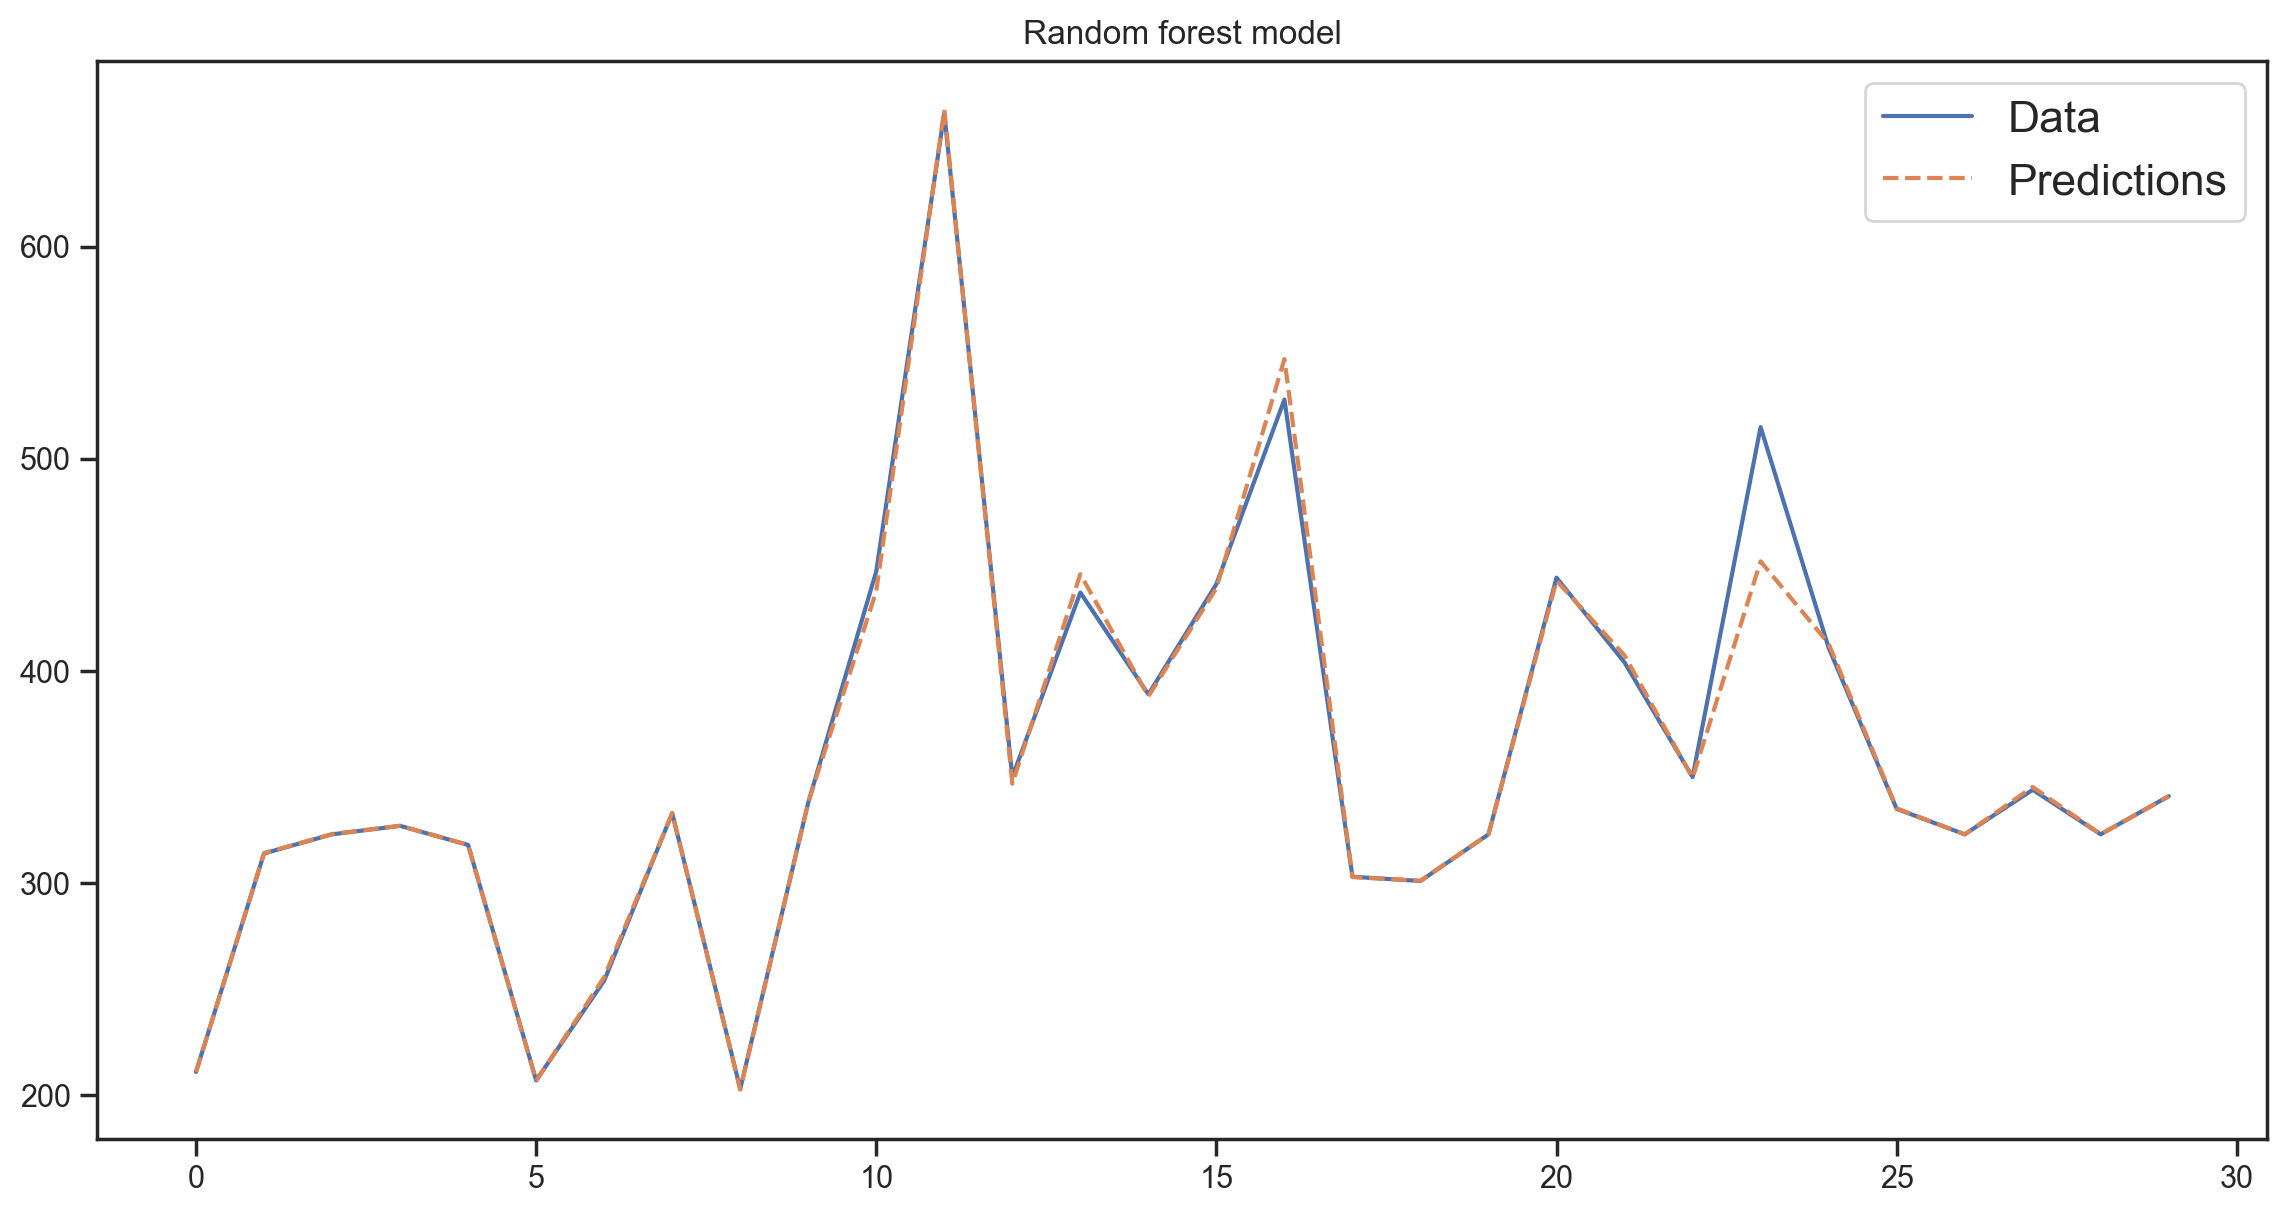

In [491]:
plt.figure(figsize=(14, 7))
plt.plot(y_test_data)
plt.plot(pred, '--')
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title("Random forest model")

### Using Neural nets

In [494]:
from keras import layers, Sequential

In [495]:
Sequential?

## 1.2 Vikas Sadan

In [375]:
vikas_sadan = pd.read_excel(PATH + "/vikas_sadan_daily_5:3:20 to 23:11:23.xlsx")
vikas_sadan

CENTRAL POLLUTION CONTROL BOARD        Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0     CONTINUOUS AMBIENT AIR QUALITY               NaN        NaN        NaN   
1        Date: Thursday, Nov 23 2023               NaN        NaN        NaN   
2                  Time: 12:28:05 PM               NaN        NaN        NaN   
3                              State           Haryana        NaN        NaN   
4                               City          Gurugram        NaN        NaN   
...                              ...               ...        ...        ...   
1370                19-11-2023 00:00  20-11-2023 00:00      82.71      39.48   
1371                20-11-2023 00:00  21-11-2023 00:00     124.44      39.47   
1372                21-11-2023 00:00  22-11-2023 00:00     145.28      39.07   
1373                22-11-2023 00:00  23-11-2023 00:00     150.11      39.51   
1374                23-11-2023 00:00  23-11-2023 00:00      168.2      38.68   

     Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  
0           NaN        NaN        NaN        NaN  
1           NaN        NaN        NaN        NaN  
2           NaN        NaN        NaN        NaN  
3           NaN        NaN        NaN        NaN  
4           NaN        NaN        NaN        NaN  
...         ...        ...        ...        ...  
1370      10.84      37.49       2.56      28.01  
1371      10.83      37.51       2.56      28.04  
1372      10.82      37.27       2.56      28.18  
1373      10.84      37.43       2.55      28.02  
1374      10.97      21.67       None       8.69  

[1375 rows x 8 columns]

In [376]:
vikas_sadan[:22]

CENTRAL POLLUTION CONTROL BOARD                          Unnamed: 1  \
0   CONTINUOUS AMBIENT AIR QUALITY                                 NaN   
1      Date: Thursday, Nov 23 2023                                 NaN   
2                Time: 12:28:05 PM                                 NaN   
3                            State                             Haryana   
4                             City                            Gurugram   
5                          Station       Vikas Sadan, Gurugram - HSPCB   
6                        Parameter  PM2.5,NO,NO2,NOx,CO,Ozone,CO,Ozone   
7                        AvgPeriod                            24 Hours   
8                             From          05-03-2020T00:00:00Z 00:00   
9                               To          23-11-2023T00:00:59Z 00:00   
10                             NaN                                 NaN   
11   Vikas Sadan, Gurugram - HSPCB                                 NaN   
12            Prescribed Standards                                       
13             Exceeding Standards                                       
14                         Remarks                                 NaN   
15                       From Date                             To Date   
16                05-03-2020 00:00                    06-03-2020 00:00   
17                06-03-2020 00:00                    07-03-2020 00:00   
18                07-03-2020 00:00                    08-03-2020 00:00   
19                08-03-2020 00:00                    09-03-2020 00:00   
20                09-03-2020 00:00                    10-03-2020 00:00   
21                10-03-2020 00:00                    11-03-2020 00:00   

   Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  
0         NaN        NaN        NaN        NaN        NaN        NaN  
1         NaN        NaN        NaN        NaN        NaN        NaN  
2         NaN        NaN        NaN        NaN        NaN        NaN  
3         NaN        NaN        NaN        NaN        NaN        NaN  
4         NaN        NaN        NaN        NaN        NaN        NaN  
5         NaN        NaN        NaN        NaN        NaN        NaN  
6         NaN        NaN        NaN        NaN        NaN        NaN  
7         NaN        NaN        NaN        NaN        NaN        NaN  
8         NaN        NaN        NaN        NaN        NaN        NaN  
9         NaN        NaN        NaN        NaN        NaN        NaN  
10        NaN        NaN        NaN        NaN        NaN        NaN  
11        NaN        NaN        NaN        NaN        NaN        NaN  
12       0-60       0-80       0-80      0-200        0-4      0-180  
13        NaN        NaN        NaN        NaN        NaN        NaN  
14        NaN        NaN        NaN        NaN        NaN        NaN  
15      PM2.5         NO        NO2        NOx         CO      Ozone  
16      36.71       5.71      42.54      25.33       0.85      57.64  
17      15.73       5.75      54.88      31.46       1.73       49.4  
18      24.56       13.7      57.48      37.97       1.07      43.45  
19      42.29       28.3      52.65      47.59       0.71      41.43  
20       49.8       2.94      40.52      22.32       0.49      46.45  
21      60.93       3.51      45.18      24.51       0.58      62.22

- First 14 rows are not required, we will remove them and add 15th row as columns

### 1.2.1 Removing unwanted rows

In [377]:
vikas_sadan = vikas_sadan[15:]
vikas_sadan

CENTRAL POLLUTION CONTROL BOARD        Unnamed: 1 Unnamed: 2 Unnamed: 3  \
15                         From Date           To Date      PM2.5         NO   
16                  05-03-2020 00:00  06-03-2020 00:00      36.71       5.71   
17                  06-03-2020 00:00  07-03-2020 00:00      15.73       5.75   
18                  07-03-2020 00:00  08-03-2020 00:00      24.56       13.7   
19                  08-03-2020 00:00  09-03-2020 00:00      42.29       28.3   
...                              ...               ...        ...        ...   
1370                19-11-2023 00:00  20-11-2023 00:00      82.71      39.48   
1371                20-11-2023 00:00  21-11-2023 00:00     124.44      39.47   
1372                21-11-2023 00:00  22-11-2023 00:00     145.28      39.07   
1373                22-11-2023 00:00  23-11-2023 00:00     150.11      39.51   
1374                23-11-2023 00:00  23-11-2023 00:00      168.2      38.68   

     Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  
15          NO2        NOx         CO      Ozone  
16        42.54      25.33       0.85      57.64  
17        54.88      31.46       1.73       49.4  
18        57.48      37.97       1.07      43.45  
19        52.65      47.59       0.71      41.43  
...         ...        ...        ...        ...  
1370      10.84      37.49       2.56      28.01  
1371      10.83      37.51       2.56      28.04  
1372      10.82      37.27       2.56      28.18  
1373      10.84      37.43       2.55      28.02  
1374      10.97      21.67       None       8.69  

[1360 rows x 8 columns]

### 1.2.2 Changing column names

In [378]:
columns = vikas_sadan.iloc[0,:]
columns

CENTRAL POLLUTION CONTROL BOARD    From Date
Unnamed: 1                           To Date
Unnamed: 2                             PM2.5
Unnamed: 3                                NO
Unnamed: 4                               NO2
Unnamed: 5                               NOx
Unnamed: 6                                CO
Unnamed: 7                             Ozone
Name: 15, dtype: object

In [379]:
vikas_sadan.columns = columns
vikas_sadan

15           From Date           To Date   PM2.5     NO    NO2    NOx    CO  \
15           From Date           To Date   PM2.5     NO    NO2    NOx    CO   
16    05-03-2020 00:00  06-03-2020 00:00   36.71   5.71  42.54  25.33  0.85   
17    06-03-2020 00:00  07-03-2020 00:00   15.73   5.75  54.88  31.46  1.73   
18    07-03-2020 00:00  08-03-2020 00:00   24.56   13.7  57.48  37.97  1.07   
19    08-03-2020 00:00  09-03-2020 00:00   42.29   28.3  52.65  47.59  0.71   
...                ...               ...     ...    ...    ...    ...   ...   
1370  19-11-2023 00:00  20-11-2023 00:00   82.71  39.48  10.84  37.49  2.56   
1371  20-11-2023 00:00  21-11-2023 00:00  124.44  39.47  10.83  37.51  2.56   
1372  21-11-2023 00:00  22-11-2023 00:00  145.28  39.07  10.82  37.27  2.56   
1373  22-11-2023 00:00  23-11-2023 00:00  150.11  39.51  10.84  37.43  2.55   
1374  23-11-2023 00:00  23-11-2023 00:00   168.2  38.68  10.97  21.67  None   

15    Ozone  
15    Ozone  
16    57.64  
17     49.4  
18    43.45  
19    41.43  
...     ...  
1370  28.01  
1371  28.04  
1372  28.18  
1373  28.02  
1374   8.69  

[1360 rows x 8 columns]

In [380]:
# Remove column name as 15
vikas_sadan.columns.name = ""

### 1.2.3 Changing index

In [381]:
vikas_sadan.index

RangeIndex(start=15, stop=1375, step=1)

In [382]:
vikas_sadan.reset_index(inplace=True)

In [383]:
# Need to remove index column, row 0
vikas_sadan

index         From Date           To Date   PM2.5     NO    NO2    NOx  \
0        15         From Date           To Date   PM2.5     NO    NO2    NOx   
1        16  05-03-2020 00:00  06-03-2020 00:00   36.71   5.71  42.54  25.33   
2        17  06-03-2020 00:00  07-03-2020 00:00   15.73   5.75  54.88  31.46   
3        18  07-03-2020 00:00  08-03-2020 00:00   24.56   13.7  57.48  37.97   
4        19  08-03-2020 00:00  09-03-2020 00:00   42.29   28.3  52.65  47.59   
...     ...               ...               ...     ...    ...    ...    ...   
1355   1370  19-11-2023 00:00  20-11-2023 00:00   82.71  39.48  10.84  37.49   
1356   1371  20-11-2023 00:00  21-11-2023 00:00  124.44  39.47  10.83  37.51   
1357   1372  21-11-2023 00:00  22-11-2023 00:00  145.28  39.07  10.82  37.27   
1358   1373  22-11-2023 00:00  23-11-2023 00:00  150.11  39.51  10.84  37.43   
1359   1374  23-11-2023 00:00  23-11-2023 00:00   168.2  38.68  10.97  21.67   

        CO  Ozone  
0       CO  Ozone  
1     0.85  57.64  
2     1.73   49.4  
3     1.07  43.45  
4     0.71  41.43  
...    ...    ...  
1355  2.56  28.01  
1356  2.56  28.04  
1357  2.56  28.18  
1358  2.55  28.02  
1359  None   8.69  

[1360 rows x 9 columns]

In [384]:
vikas_sadan.drop(columns=['index'], inplace=True)

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_28342/1718460153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vikas_sadan.drop(columns=['index'], inplace=True)


In [385]:
vikas_sadan.drop(index=0, inplace=True)

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_28342/476038331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vikas_sadan.drop(index=0, inplace=True)


In [386]:
vikas_sadan.drop(columns=['To Date'], inplace=True)

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_28342/1054167959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vikas_sadan.drop(columns=['To Date'], inplace=True)


In [387]:
vikas_sadan

From Date   PM2.5     NO    NO2    NOx    CO  Ozone
1     05-03-2020 00:00   36.71   5.71  42.54  25.33  0.85  57.64
2     06-03-2020 00:00   15.73   5.75  54.88  31.46  1.73   49.4
3     07-03-2020 00:00   24.56   13.7  57.48  37.97  1.07  43.45
4     08-03-2020 00:00   42.29   28.3  52.65  47.59  0.71  41.43
5     09-03-2020 00:00    49.8   2.94  40.52  22.32  0.49  46.45
...                ...     ...    ...    ...    ...   ...    ...
1355  19-11-2023 00:00   82.71  39.48  10.84  37.49  2.56  28.01
1356  20-11-2023 00:00  124.44  39.47  10.83  37.51  2.56  28.04
1357  21-11-2023 00:00  145.28  39.07  10.82  37.27  2.56  28.18
1358  22-11-2023 00:00  150.11  39.51  10.84  37.43  2.55  28.02
1359  23-11-2023 00:00   168.2  38.68  10.97  21.67  None   8.69

[1359 rows x 7 columns]

In [388]:
# Set index 
vikas_sadan.index = pd.to_datetime(vikas_sadan['From Date'],dayfirst=True)

In [389]:
# Remove from date
vikas_sadan.drop(columns=['From Date'], inplace=True)

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_28342/4074311577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vikas_sadan.drop(columns=['From Date'], inplace=True)


In [390]:
vikas_sadan

PM2.5     NO    NO2    NOx    CO  Ozone
From Date                                           
2020-03-05   36.71   5.71  42.54  25.33  0.85  57.64
2020-03-06   15.73   5.75  54.88  31.46  1.73   49.4
2020-03-07   24.56   13.7  57.48  37.97  1.07  43.45
2020-03-08   42.29   28.3  52.65  47.59  0.71  41.43
2020-03-09    49.8   2.94  40.52  22.32  0.49  46.45
...            ...    ...    ...    ...   ...    ...
2023-11-19   82.71  39.48  10.84  37.49  2.56  28.01
2023-11-20  124.44  39.47  10.83  37.51  2.56  28.04
2023-11-21  145.28  39.07  10.82  37.27  2.56  28.18
2023-11-22  150.11  39.51  10.84  37.43  2.55  28.02
2023-11-23   168.2  38.68  10.97  21.67  None   8.69

[1359 rows x 6 columns]


### 1.2.4 Changing data types


In [391]:
vikas_sadan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1359 entries, 2020-03-05 to 2023-11-23
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PM2.5   1359 non-null   object
 1   NO      1359 non-null   object
 2   NO2     1359 non-null   object
 3   NOx     1359 non-null   object
 4   CO      1359 non-null   object
 5   Ozone   1359 non-null   object
dtypes: object(6)
memory usage: 74.3+ KB


In [392]:
vikas_sadan.columns

Index(['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'Ozone'], dtype='object', name='')

In [393]:
for column in vikas_sadan.columns:
    try:
        vikas_sadan[column] = pd.to_numeric(vikas_sadan[column])
        print(column + " has successfully been converted into float.")
    except:
        print(column + " has None values, please deal with it and then convert into float.")

PM2.5 has None values, please deal with it and then convert into float.
NO has None values, please deal with it and then convert into float.
NO2 has None values, please deal with it and then convert into float.
NOx has None values, please deal with it and then convert into float.
CO has None values, please deal with it and then convert into float.
Ozone has None values, please deal with it and then convert into float.


- All the columns have None/Null values, we need to handle them and then convert into float.

### 1.2.5 Dealing with missing/None values



#### 1.2.5.1 PM2.5 column

In [394]:
vikas_sadan.isna().sum()


PM2.5    0
NO       0
NO2      0
NOx      0
CO       0
Ozone    0
dtype: int64

In [395]:
vikas_sadan['PM2.5'].value_counts(dropna=False)

None      110
53.22       3
47.71       3
39.95       2
51.35       2
         ... 
55.98       1
69.17       1
110.79      1
122.92      1
168.2       1
Name: PM2.5, Length: 1212, dtype: int64

- There are 110 None values

In [396]:
# find index of None values
vikas_sadan[vikas_sadan['PM2.5'] == "None"]

PM2.5    NO   NO2   NOx    CO Ozone
From Date                                     
2022-01-11  None  None  None  None  None  None
2022-03-23  None  None  None  None  None  None
2022-03-28  None     7    16    24  0.14  None
2022-06-22  None  None  None  None  None  None
2022-06-23  None  None  None  None  None  None
...          ...   ...   ...   ...   ...   ...
2022-10-02  None  None  None  None  None  None
2022-10-03  None  None  None  None  None  None
2022-10-04  None  None  None  None  None  None
2022-10-05  None  None  None  None  None  None
2022-10-06  None  None  None  None  None  None

[110 rows x 6 columns]

<Figure size 2000x500 with 0 Axes>

<AxesSubplot: xlabel='From Date', ylabel='PM2.5'>

Text(0.5, 1.0, 'PM2.5 from 2020 March to 2023 November')

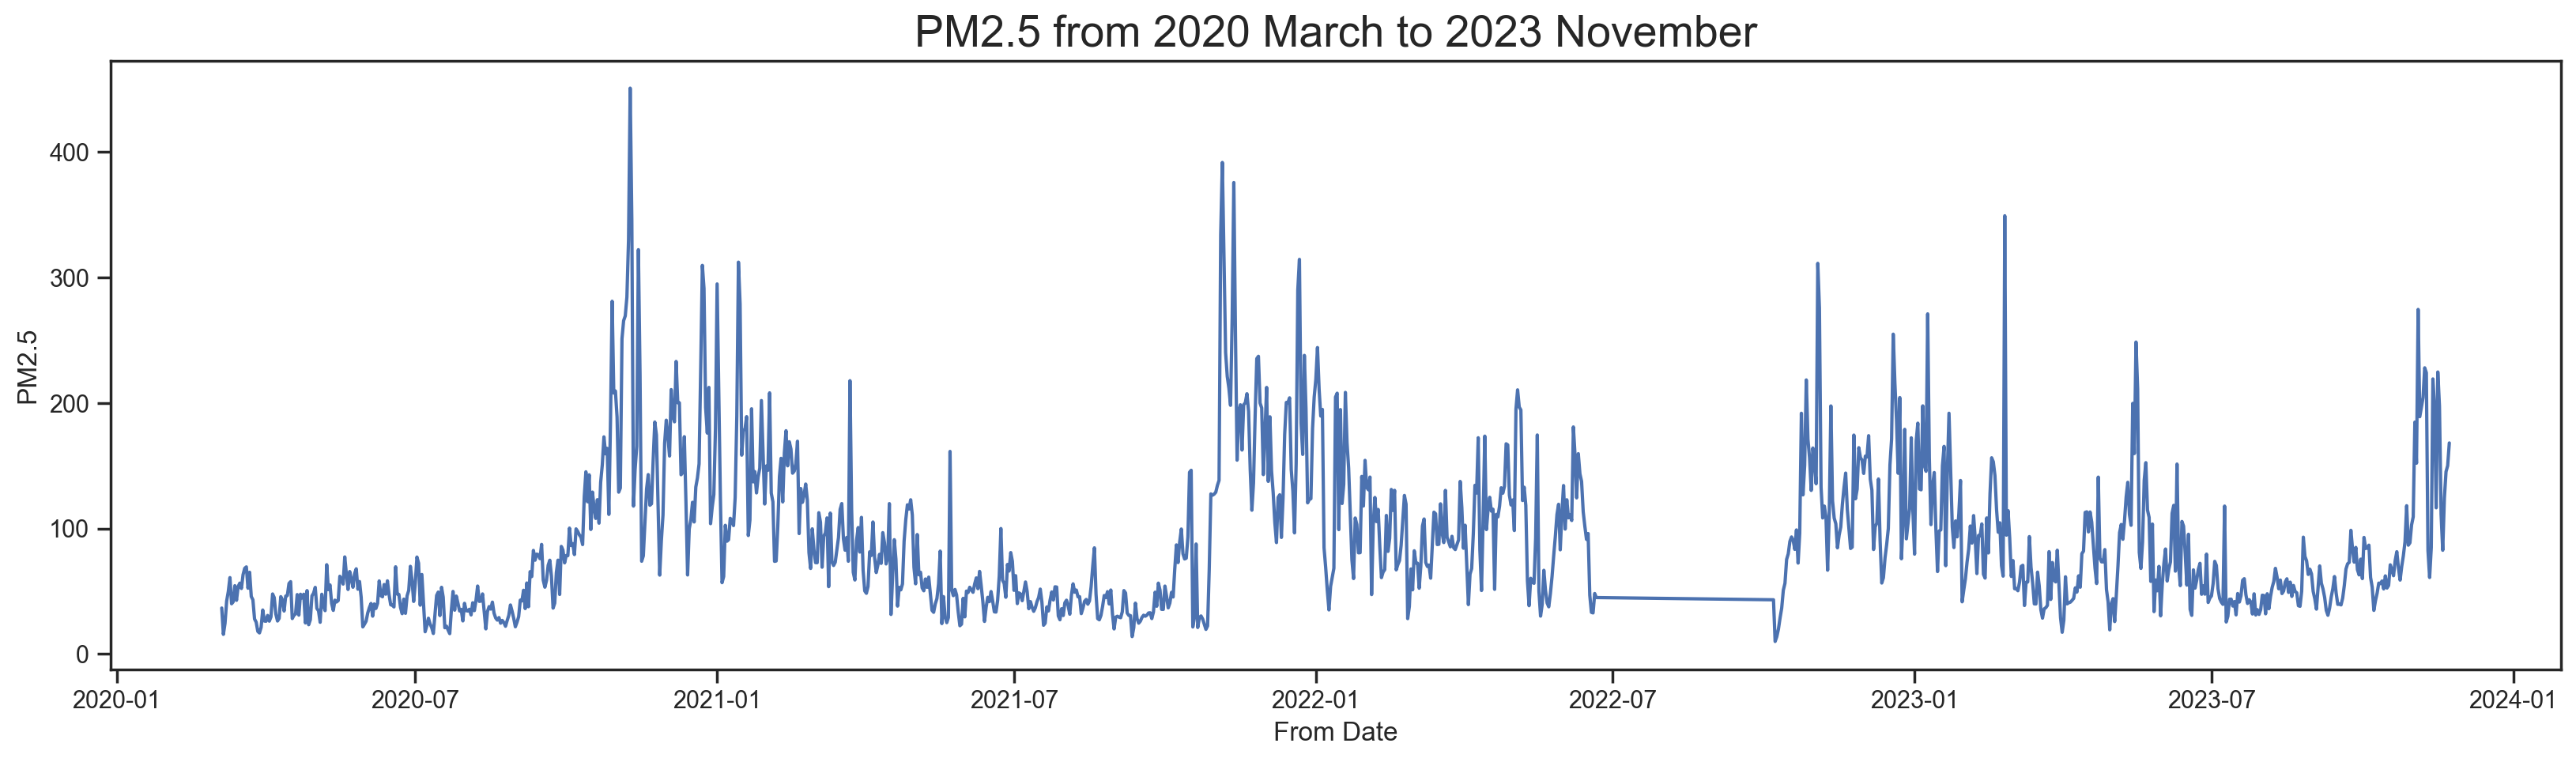

In [397]:
plt.figure(figsize=(20,5))
sns.lineplot(vikas_sadan[vikas_sadan['PM2.5'] != "None"]['PM2.5'])
plt.title("PM2.5 from 2020 March to 2023 November", fontsize=20)

- From this graph, we can see a straight line from 2022 July to almost November, there are None values here.

In [406]:
vikas_sadan['PM2.5'].apply(lambda x: 1000 if x == 'None' else x)

From Date
2020-03-05     36.71
2020-03-06     15.73
2020-03-07     24.56
2020-03-08     42.29
2020-03-09     49.80
               ...  
2023-11-19     82.71
2023-11-20    124.44
2023-11-21    145.28
2023-11-22    150.11
2023-11-23    168.20
Name: PM2.5, Length: 1359, dtype: float64

<Figure size 2000x500 with 0 Axes>

<AxesSubplot: xlabel='From Date', ylabel='PM2.5'>

Text(0.5, 1.0, 'PM2.5 from 2020 March to 2023 November - Missing values lifted to 1000')

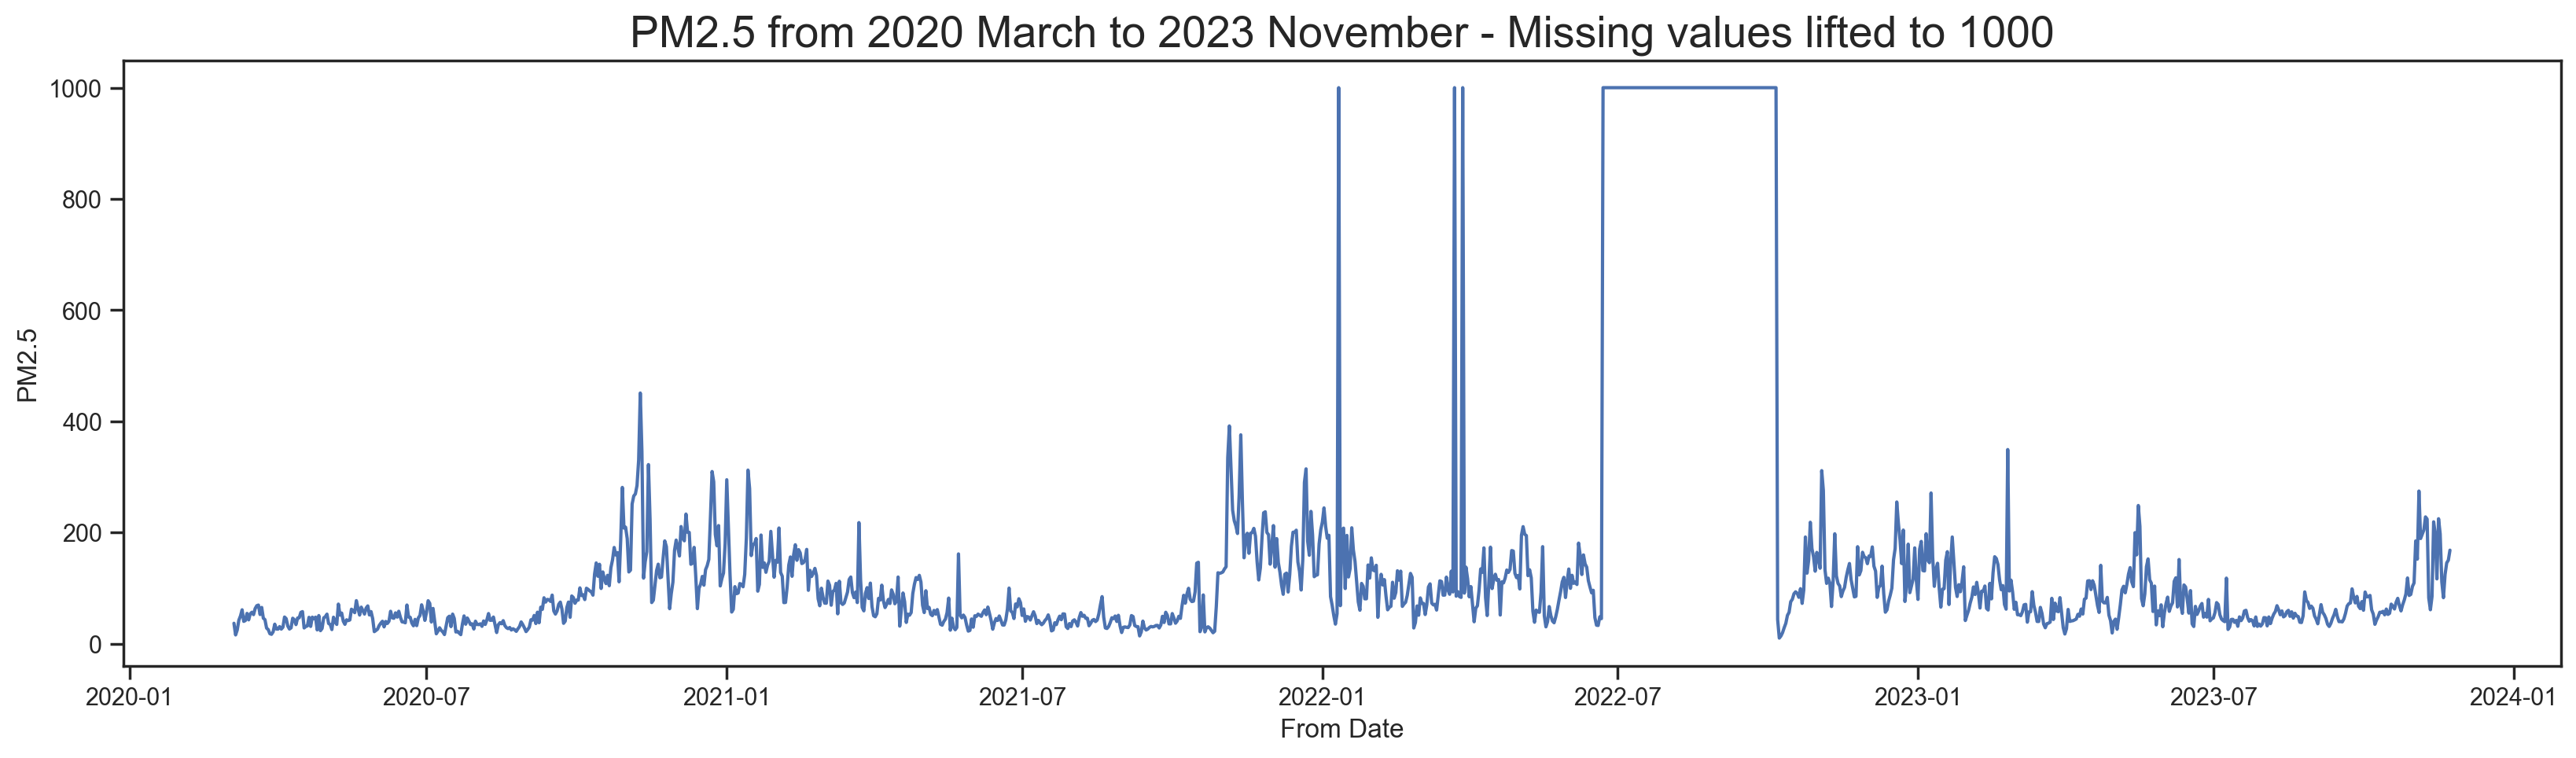

In [408]:
plt.figure(figsize=(20,5))
sns.lineplot(vikas_sadan['PM2.5'].apply(lambda x: 1000 if x == 'None' else x))
plt.title("PM2.5 from 2020 March to 2023 November - Missing values lifted to 1000", fontsize=20)

In [416]:

from statsmodels.tsa.seasonal import STL

stl = STL(vikas_sadan[vikas_sadan['PM2.5'] != "None"]['PM2.5'], seasonal=13)  # Assuming a seasonality of 13 for monthly data
result = stl.fit()
df_filled = result.trend + result.seasonal + result.resid


type: Unable to determine period from endog

#### 1.2.5.2 NOx

<Figure size 2000x500 with 0 Axes>

<AxesSubplot: xlabel='From Date', ylabel='NOx'>

Text(0.5, 1.0, 'NOx from 2020 March to 2023 November - Missing values lifted to 1000')

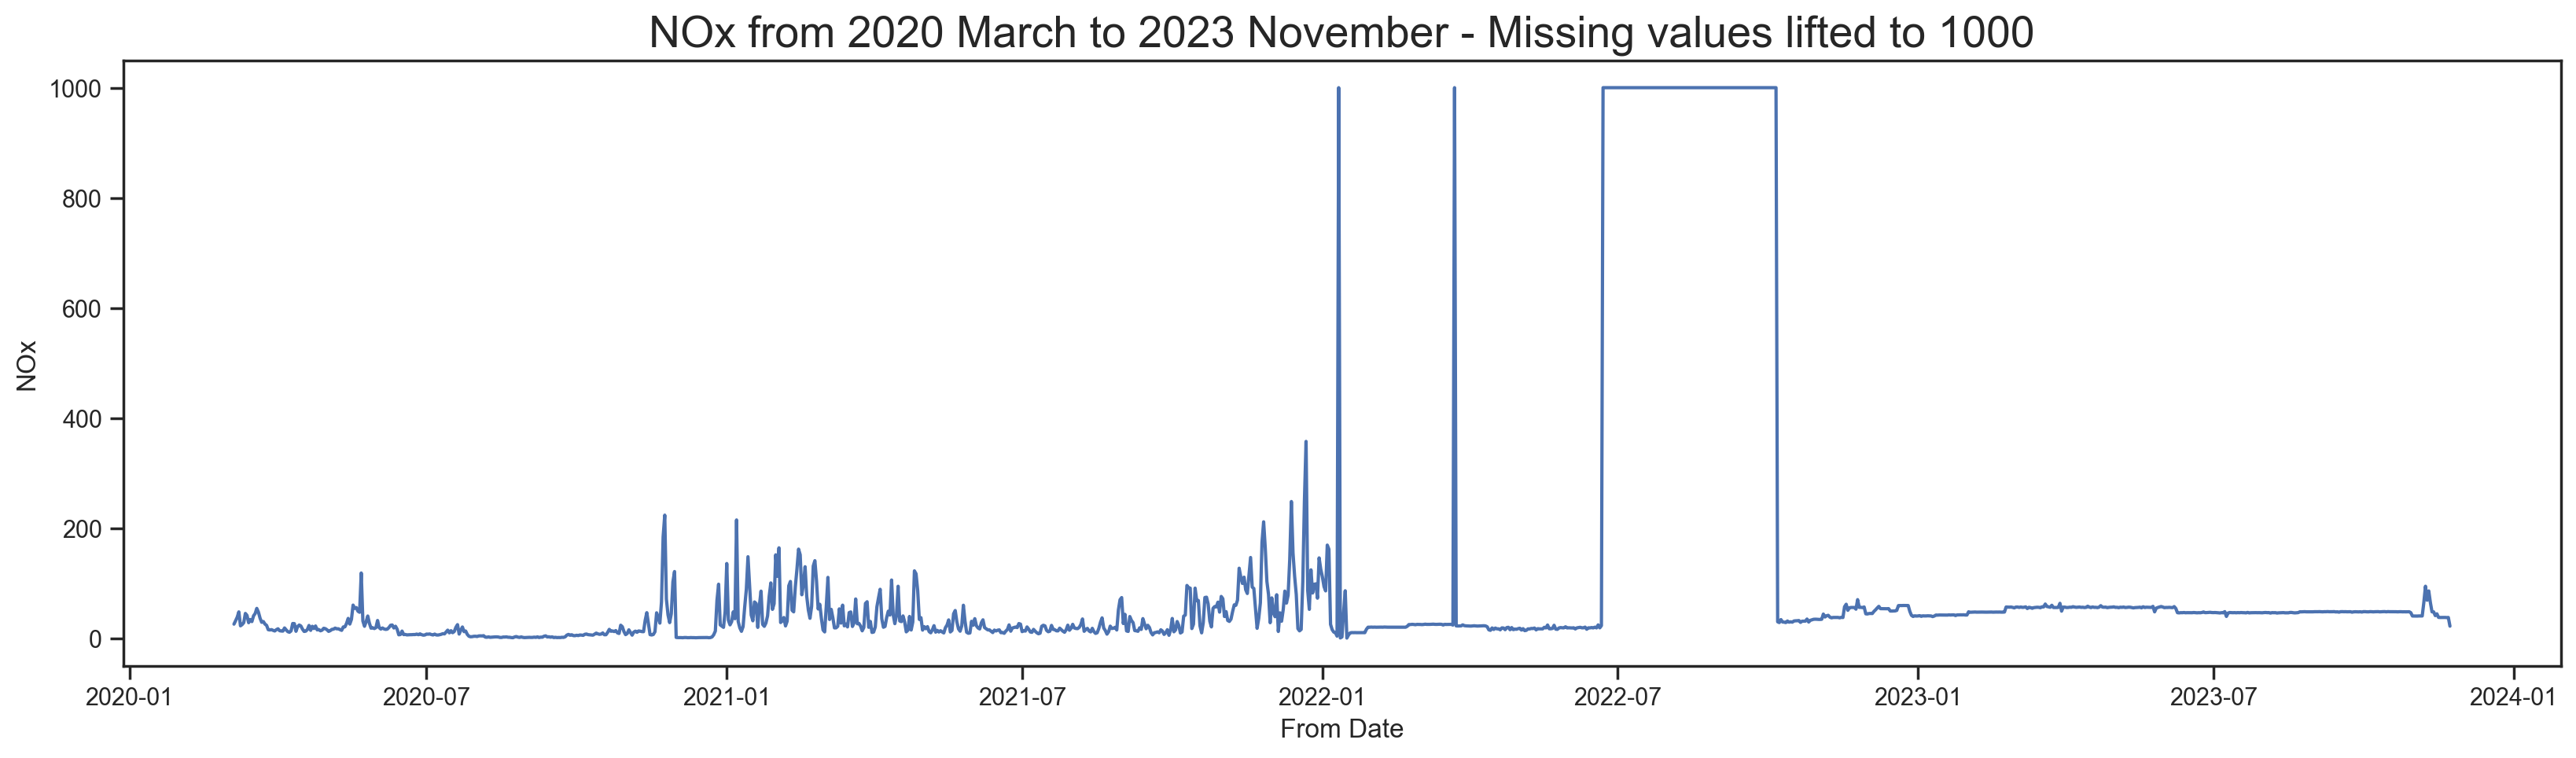

In [409]:
plt.figure(figsize=(20,5))
sns.lineplot(vikas_sadan['NOx'].apply(lambda x: 1000 if x == 'None' else x))
plt.title("NOx from 2020 March to 2023 November - Missing values lifted to 1000", fontsize=20)

#### 1.2.5.3 Ozone

<Figure size 2000x500 with 0 Axes>

<AxesSubplot: xlabel='From Date', ylabel='Ozone'>

Text(0.5, 1.0, 'Ozone from 2020 March to 2023 November - Missing values lifted to 1000')

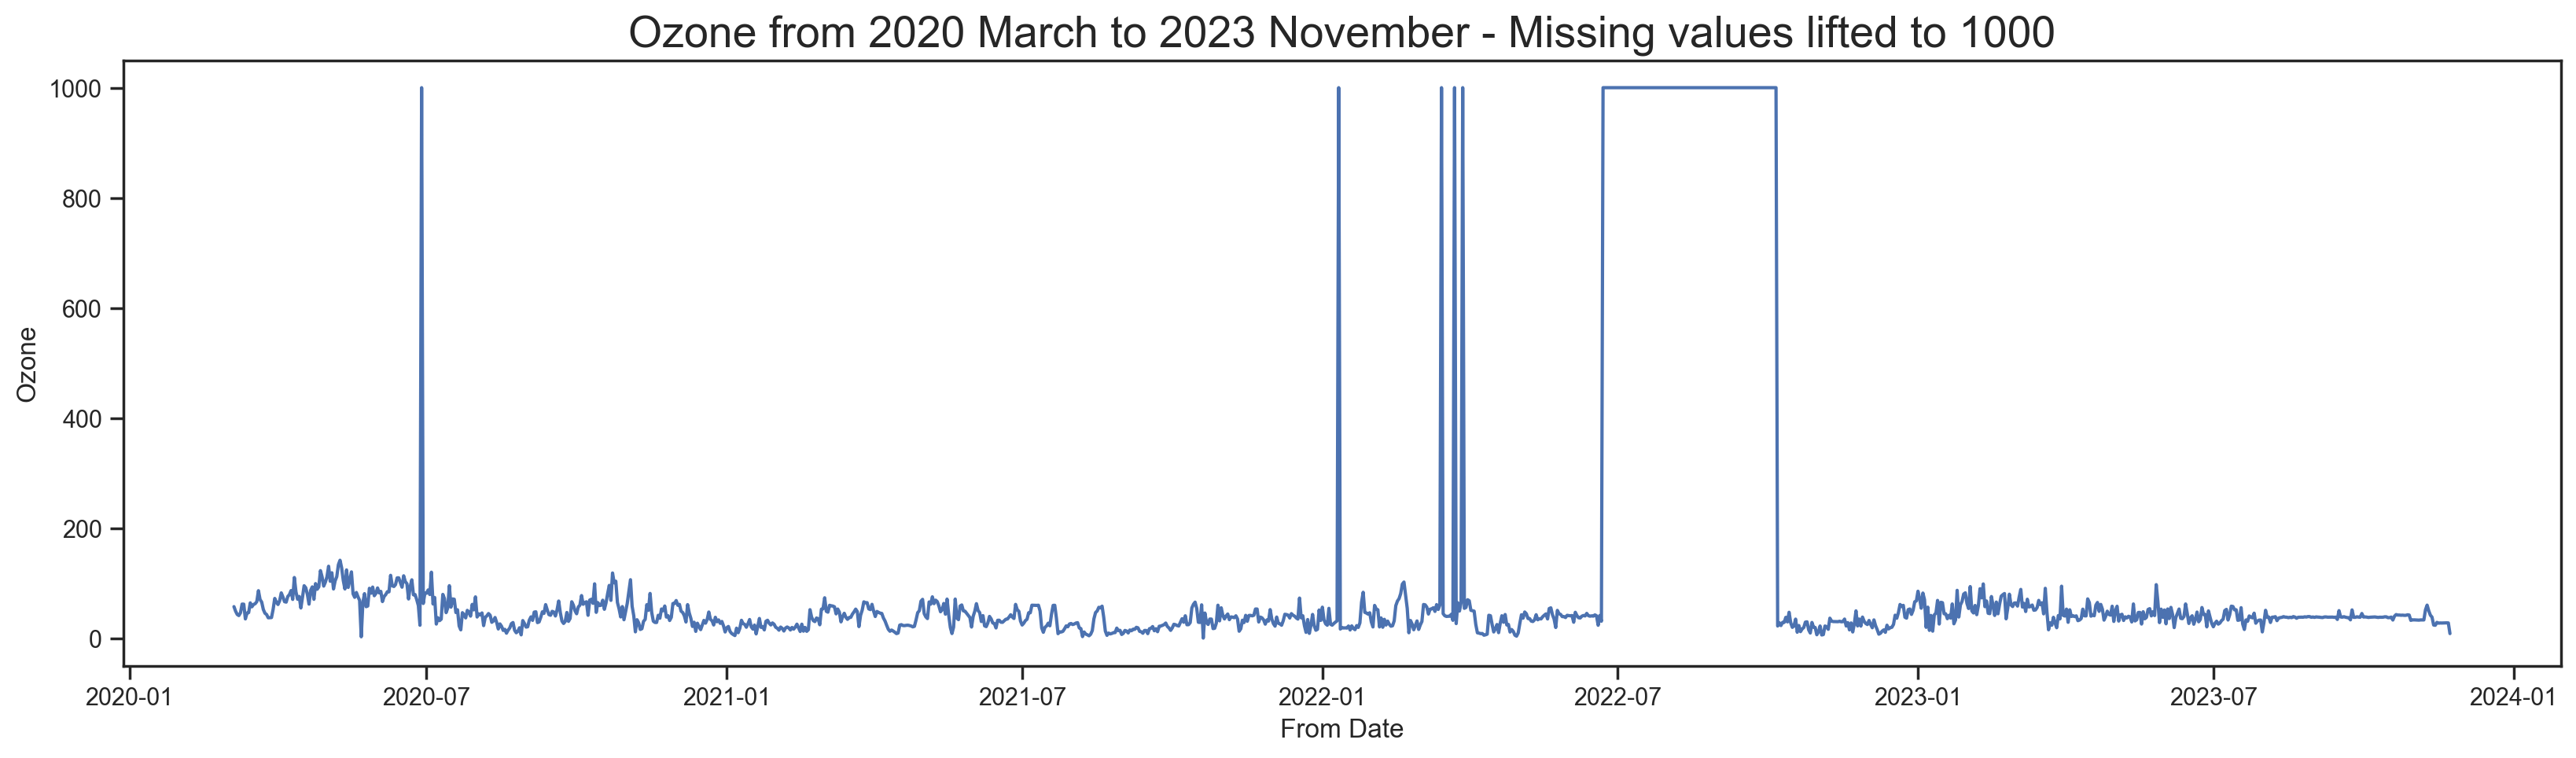

In [410]:
plt.figure(figsize=(20,5))
sns.lineplot(vikas_sadan['Ozone'].apply(lambda x: 1000 if x == 'None' else x))
plt.title("Ozone from 2020 March to 2023 November - Missing values lifted to 1000", fontsize=20)

#### 1.2.5.4 CO

<Figure size 2000x500 with 0 Axes>

<AxesSubplot: xlabel='From Date', ylabel='CO'>

Text(0.5, 1.0, 'CO from 2020 March to 2023 November - Missing values lifted to 50')

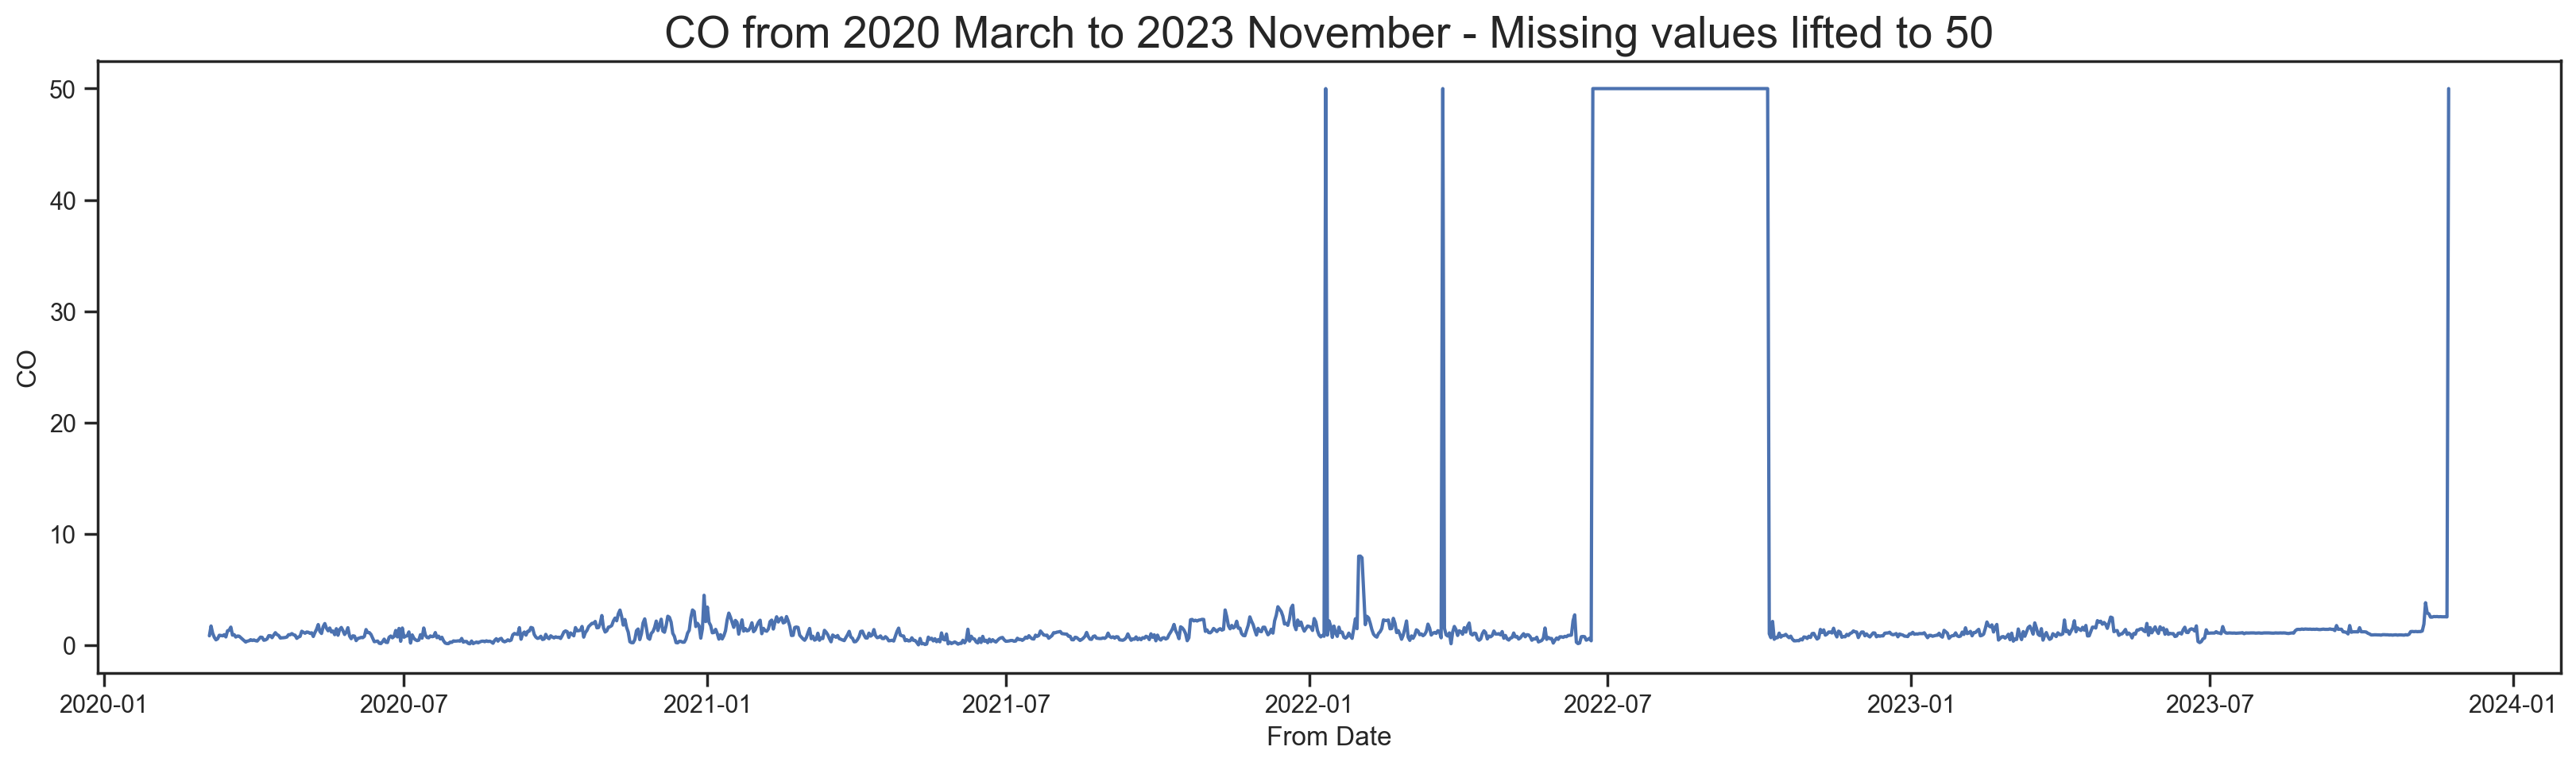

In [413]:
plt.figure(figsize=(20,5))
sns.lineplot(vikas_sadan['CO'].apply(lambda x: 50 if x == 'None' else x))
plt.title("CO from 2020 March to 2023 November - Missing values lifted to 50", fontsize=20)

## 1.3 NISE

In [417]:
nise = pd.read_excel(PATH + "/nise_daily_5:3:20 to 23:11:23.xlsx")
nise

CENTRAL POLLUTION CONTROL BOARD        Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0     CONTINUOUS AMBIENT AIR QUALITY               NaN        NaN        NaN   
1        Date: Thursday, Nov 23 2023               NaN        NaN        NaN   
2                  Time: 12:22:50 PM               NaN        NaN        NaN   
3                              State           Haryana        NaN        NaN   
4                               City          Gurugram        NaN        NaN   
...                              ...               ...        ...        ...   
1370                19-11-2023 00:00  20-11-2023 00:00      75.13      97.44   
1371                20-11-2023 00:00  21-11-2023 00:00     106.89     166.17   
1372                21-11-2023 00:00  22-11-2023 00:00     189.53     290.42   
1373                22-11-2023 00:00  23-11-2023 00:00     184.85     262.99   
1374                23-11-2023 00:00  23-11-2023 12:20     153.46     209.59   

     Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  
0           NaN        NaN        NaN        NaN        NaN  
1           NaN        NaN        NaN        NaN        NaN  
2           NaN        NaN        NaN        NaN        NaN  
3           NaN        NaN        NaN        NaN        NaN  
4           NaN        NaN        NaN        NaN        NaN  
...         ...        ...        ...        ...        ...  
1370      29.17      12.86       30.3       1.42      28.74  
1371      11.95      13.34      25.29       1.73      26.75  
1372      13.12      24.15      37.27       2.37      23.92  
1373       11.3      16.36      27.66       1.87      31.61  
1374       11.7      15.62      27.32       1.92       5.44  

[1375 rows x 9 columns]

In [418]:
nise[:22]

CENTRAL POLLUTION CONTROL BOARD                        Unnamed: 1  \
0     CONTINUOUS AMBIENT AIR QUALITY                               NaN   
1        Date: Thursday, Nov 23 2023                               NaN   
2                  Time: 12:22:50 PM                               NaN   
3                              State                           Haryana   
4                               City                          Gurugram   
5                            Station  NISE Gwal Pahari, Gurugram - IMD   
6                          Parameter    PM2.5,PM10,NO,NO2,NOx,CO,Ozone   
7                          AvgPeriod                          24 Hours   
8                               From        05-03-2020T00:00:00Z 00:00   
9                                 To        23-11-2023T12:20:59Z 00:00   
10                               NaN                               NaN   
11  NISE Gwal Pahari, Gurugram - IMD                               NaN   
12              Prescribed Standards                                     
13               Exceeding Standards                                     
14                           Remarks                               NaN   
15                         From Date                           To Date   
16                  05-03-2020 00:00                  06-03-2020 00:00   
17                  06-03-2020 00:00                  07-03-2020 00:00   
18                  07-03-2020 00:00                  08-03-2020 00:00   
19                  08-03-2020 00:00                  09-03-2020 00:00   
20                  09-03-2020 00:00                  10-03-2020 00:00   
21                  10-03-2020 00:00                  11-03-2020 00:00   

   Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  \
0         NaN        NaN        NaN        NaN        NaN        NaN   
1         NaN        NaN        NaN        NaN        NaN        NaN   
2         NaN        NaN        NaN        NaN        NaN        NaN   
3         NaN        NaN        NaN        NaN        NaN        NaN   
4         NaN        NaN        NaN        NaN        NaN        NaN   
5         NaN        NaN        NaN        NaN        NaN        NaN   
6         NaN        NaN        NaN        NaN        NaN        NaN   
7         NaN        NaN        NaN        NaN        NaN        NaN   
8         NaN        NaN        NaN        NaN        NaN        NaN   
9         NaN        NaN        NaN        NaN        NaN        NaN   
10        NaN        NaN        NaN        NaN        NaN        NaN   
11        NaN        NaN        NaN        NaN        NaN        NaN   
12       0-60      0-100        NaN      0-200      0-200        0-4   
13        NaN        NaN        NaN        NaN        NaN        NaN   
14        NaN        NaN        NaN        NaN        NaN        NaN   
15      PM2.5       PM10         NO        NO2        NOx         CO   
16      30.02      53.88        7.8      14.87      22.67       1.79   
17      18.58      27.41       7.45      12.21      19.66       1.62   
18      32.78      62.98       7.37      10.84      18.21        1.6   
19      26.94      65.07       8.62      15.13      23.77       1.46   
20      46.51     104.76       7.26      14.22      21.48       1.21   
21      71.07     140.07       7.43      14.67       22.1       1.39   

   Unnamed: 8  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5         NaN  
6         NaN  
7         NaN  
8         NaN  
9         NaN  
10        NaN  
11        NaN  
12      0-180  
13        NaN  
14        NaN  
15      Ozone  
16      45.97  
17      44.47  
18       39.9  
19      54.48  
20       42.1  
21      46.02

- First 14 rows are not required, we will remove them and add 15th row as columns

### 1.3.1 Removing unwanted rows

In [419]:
nise = nise[15:]
nise

CENTRAL POLLUTION CONTROL BOARD        Unnamed: 1 Unnamed: 2 Unnamed: 3  \
15                         From Date           To Date      PM2.5       PM10   
16                  05-03-2020 00:00  06-03-2020 00:00      30.02      53.88   
17                  06-03-2020 00:00  07-03-2020 00:00      18.58      27.41   
18                  07-03-2020 00:00  08-03-2020 00:00      32.78      62.98   
19                  08-03-2020 00:00  09-03-2020 00:00      26.94      65.07   
...                              ...               ...        ...        ...   
1370                19-11-2023 00:00  20-11-2023 00:00      75.13      97.44   
1371                20-11-2023 00:00  21-11-2023 00:00     106.89     166.17   
1372                21-11-2023 00:00  22-11-2023 00:00     189.53     290.42   
1373                22-11-2023 00:00  23-11-2023 00:00     184.85     262.99   
1374                23-11-2023 00:00  23-11-2023 12:20     153.46     209.59   

     Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  
15           NO        NO2        NOx         CO      Ozone  
16          7.8      14.87      22.67       1.79      45.97  
17         7.45      12.21      19.66       1.62      44.47  
18         7.37      10.84      18.21        1.6       39.9  
19         8.62      15.13      23.77       1.46      54.48  
...         ...        ...        ...        ...        ...  
1370      29.17      12.86       30.3       1.42      28.74  
1371      11.95      13.34      25.29       1.73      26.75  
1372      13.12      24.15      37.27       2.37      23.92  
1373       11.3      16.36      27.66       1.87      31.61  
1374       11.7      15.62      27.32       1.92       5.44  

[1360 rows x 9 columns]

### 1.3.2 Changing column names

In [420]:
columns = nise.iloc[0,:]
columns

CENTRAL POLLUTION CONTROL BOARD    From Date
Unnamed: 1                           To Date
Unnamed: 2                             PM2.5
Unnamed: 3                              PM10
Unnamed: 4                                NO
Unnamed: 5                               NO2
Unnamed: 6                               NOx
Unnamed: 7                                CO
Unnamed: 8                             Ozone
Name: 15, dtype: object

In [421]:
nise.columns = columns
nise

15           From Date           To Date   PM2.5    PM10     NO    NO2    NOx  \
15           From Date           To Date   PM2.5    PM10     NO    NO2    NOx   
16    05-03-2020 00:00  06-03-2020 00:00   30.02   53.88    7.8  14.87  22.67   
17    06-03-2020 00:00  07-03-2020 00:00   18.58   27.41   7.45  12.21  19.66   
18    07-03-2020 00:00  08-03-2020 00:00   32.78   62.98   7.37  10.84  18.21   
19    08-03-2020 00:00  09-03-2020 00:00   26.94   65.07   8.62  15.13  23.77   
...                ...               ...     ...     ...    ...    ...    ...   
1370  19-11-2023 00:00  20-11-2023 00:00   75.13   97.44  29.17  12.86   30.3   
1371  20-11-2023 00:00  21-11-2023 00:00  106.89  166.17  11.95  13.34  25.29   
1372  21-11-2023 00:00  22-11-2023 00:00  189.53  290.42  13.12  24.15  37.27   
1373  22-11-2023 00:00  23-11-2023 00:00  184.85  262.99   11.3  16.36  27.66   
1374  23-11-2023 00:00  23-11-2023 12:20  153.46  209.59   11.7  15.62  27.32   

15      CO  Ozone  
15      CO  Ozone  
16    1.79  45.97  
17    1.62  44.47  
18     1.6   39.9  
19    1.46  54.48  
...    ...    ...  
1370  1.42  28.74  
1371  1.73  26.75  
1372  2.37  23.92  
1373  1.87  31.61  
1374  1.92   5.44  

[1360 rows x 9 columns]

In [422]:
# Remove column name as 15
nise.columns.name = ""

### 1.3.3 Changing index

In [423]:
nise.index

RangeIndex(start=15, stop=1375, step=1)

In [424]:
nise.reset_index(inplace=True)

In [425]:
# Need to remove index column, row 0
nise

index         From Date           To Date   PM2.5    PM10     NO    NO2  \
0        15         From Date           To Date   PM2.5    PM10     NO    NO2   
1        16  05-03-2020 00:00  06-03-2020 00:00   30.02   53.88    7.8  14.87   
2        17  06-03-2020 00:00  07-03-2020 00:00   18.58   27.41   7.45  12.21   
3        18  07-03-2020 00:00  08-03-2020 00:00   32.78   62.98   7.37  10.84   
4        19  08-03-2020 00:00  09-03-2020 00:00   26.94   65.07   8.62  15.13   
...     ...               ...               ...     ...     ...    ...    ...   
1355   1370  19-11-2023 00:00  20-11-2023 00:00   75.13   97.44  29.17  12.86   
1356   1371  20-11-2023 00:00  21-11-2023 00:00  106.89  166.17  11.95  13.34   
1357   1372  21-11-2023 00:00  22-11-2023 00:00  189.53  290.42  13.12  24.15   
1358   1373  22-11-2023 00:00  23-11-2023 00:00  184.85  262.99   11.3  16.36   
1359   1374  23-11-2023 00:00  23-11-2023 12:20  153.46  209.59   11.7  15.62   

        NOx    CO  Ozone  
0       NOx    CO  Ozone  
1     22.67  1.79  45.97  
2     19.66  1.62  44.47  
3     18.21   1.6   39.9  
4     23.77  1.46  54.48  
...     ...   ...    ...  
1355   30.3  1.42  28.74  
1356  25.29  1.73  26.75  
1357  37.27  2.37  23.92  
1358  27.66  1.87  31.61  
1359  27.32  1.92   5.44  

[1360 rows x 10 columns]

In [426]:
nise.drop(columns=['index'], inplace=True)

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_28342/3871005208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nise.drop(columns=['index'], inplace=True)


In [427]:
nise.drop(index=0, inplace=True)

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_28342/345567439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nise.drop(index=0, inplace=True)


In [428]:
nise.drop(columns=['To Date'], inplace=True)

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_28342/2605214630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nise.drop(columns=['To Date'], inplace=True)


In [429]:
nise

From Date   PM2.5    PM10     NO    NO2    NOx    CO  Ozone
1     05-03-2020 00:00   30.02   53.88    7.8  14.87  22.67  1.79  45.97
2     06-03-2020 00:00   18.58   27.41   7.45  12.21  19.66  1.62  44.47
3     07-03-2020 00:00   32.78   62.98   7.37  10.84  18.21   1.6   39.9
4     08-03-2020 00:00   26.94   65.07   8.62  15.13  23.77  1.46  54.48
5     09-03-2020 00:00   46.51  104.76   7.26  14.22  21.48  1.21   42.1
...                ...     ...     ...    ...    ...    ...   ...    ...
1355  19-11-2023 00:00   75.13   97.44  29.17  12.86   30.3  1.42  28.74
1356  20-11-2023 00:00  106.89  166.17  11.95  13.34  25.29  1.73  26.75
1357  21-11-2023 00:00  189.53  290.42  13.12  24.15  37.27  2.37  23.92
1358  22-11-2023 00:00  184.85  262.99   11.3  16.36  27.66  1.87  31.61
1359  23-11-2023 00:00  153.46  209.59   11.7  15.62  27.32  1.92   5.44

[1359 rows x 8 columns]

In [430]:
# Set index 
nise.index = pd.to_datetime(nise['From Date'],dayfirst=True)

In [431]:
# Remove from date
nise.drop(columns=['From Date'], inplace=True)

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_28342/3111771324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nise.drop(columns=['From Date'], inplace=True)


In [432]:
nise

PM2.5    PM10     NO    NO2    NOx    CO  Ozone
From Date                                                   
2020-03-05   30.02   53.88    7.8  14.87  22.67  1.79  45.97
2020-03-06   18.58   27.41   7.45  12.21  19.66  1.62  44.47
2020-03-07   32.78   62.98   7.37  10.84  18.21   1.6   39.9
2020-03-08   26.94   65.07   8.62  15.13  23.77  1.46  54.48
2020-03-09   46.51  104.76   7.26  14.22  21.48  1.21   42.1
...            ...     ...    ...    ...    ...   ...    ...
2023-11-19   75.13   97.44  29.17  12.86   30.3  1.42  28.74
2023-11-20  106.89  166.17  11.95  13.34  25.29  1.73  26.75
2023-11-21  189.53  290.42  13.12  24.15  37.27  2.37  23.92
2023-11-22  184.85  262.99   11.3  16.36  27.66  1.87  31.61
2023-11-23  153.46  209.59   11.7  15.62  27.32  1.92   5.44

[1359 rows x 7 columns]

### 1.3.4 Changing data types

In [434]:
nise.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1359 entries, 2020-03-05 to 2023-11-23
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PM2.5   1359 non-null   object
 1   PM10    1359 non-null   object
 2   NO      1359 non-null   object
 3   NO2     1359 non-null   object
 4   NOx     1359 non-null   object
 5   CO      1359 non-null   object
 6   Ozone   1359 non-null   object
dtypes: object(7)
memory usage: 84.9+ KB


In [435]:

for column in nise.columns:
    try:
        nise[column] = pd.to_numeric(nise[column])
        print(column + " has successfully been converted into float.")
    except:
        print(column + " has None values, please deal with it and then convert into float.")

PM2.5 has None values, please deal with it and then convert into float.
PM10 has None values, please deal with it and then convert into float.
NO has None values, please deal with it and then convert into float.
NO2 has None values, please deal with it and then convert into float.
NOx has None values, please deal with it and then convert into float.
CO has None values, please deal with it and then convert into float.
Ozone has None values, please deal with it and then convert into float.


- All the columns have None/Null values, we need to handle them and then convert into float.

### 1.3.5 Dealing with missing/None values

#### 1.3.5.1 PM2.5 column

In [436]:
nise['PM2.5'].value_counts(dropna=False)

None      69
33.78      3
25.17      3
14.58      2
15.66      2
          ..
28.14      1
28.25      1
42.45      1
49.78      1
153.46     1
Name: PM2.5, Length: 1234, dtype: int64

In [437]:
# find index of None values
nise[nise['PM2.5'] == "None"]

PM2.5    PM10     NO    NO2    NOx    CO  Ozone
From Date                                                 
2020-10-02  None  168.33   7.23  15.11  22.35  1.08  49.69
2021-01-03  None    None   None   None   None  None   None
2021-05-20  None    None   None   None   None  None   None
2021-05-21  None    None   None   None   None  None   None
2021-05-22  None    None   None   None   None  None   None
...          ...     ...    ...    ...    ...   ...    ...
2023-06-12  None    None   None   None   None  None   None
2023-06-25  None    None   None   None   None  None   None
2023-07-16  None    None   None   None   None  None   None
2023-07-29  None    None  38.36  28.73  36.24  0.84  22.31
2023-09-18  None   30.27  16.65  13.04  29.71  0.88  29.42

[69 rows x 7 columns]

<Figure size 2000x500 with 0 Axes>

<AxesSubplot: xlabel='From Date', ylabel='PM2.5'>

Text(0.5, 1.0, 'PM2.5 from 2020 March to 2023 November - Missing values lifted to 1000')

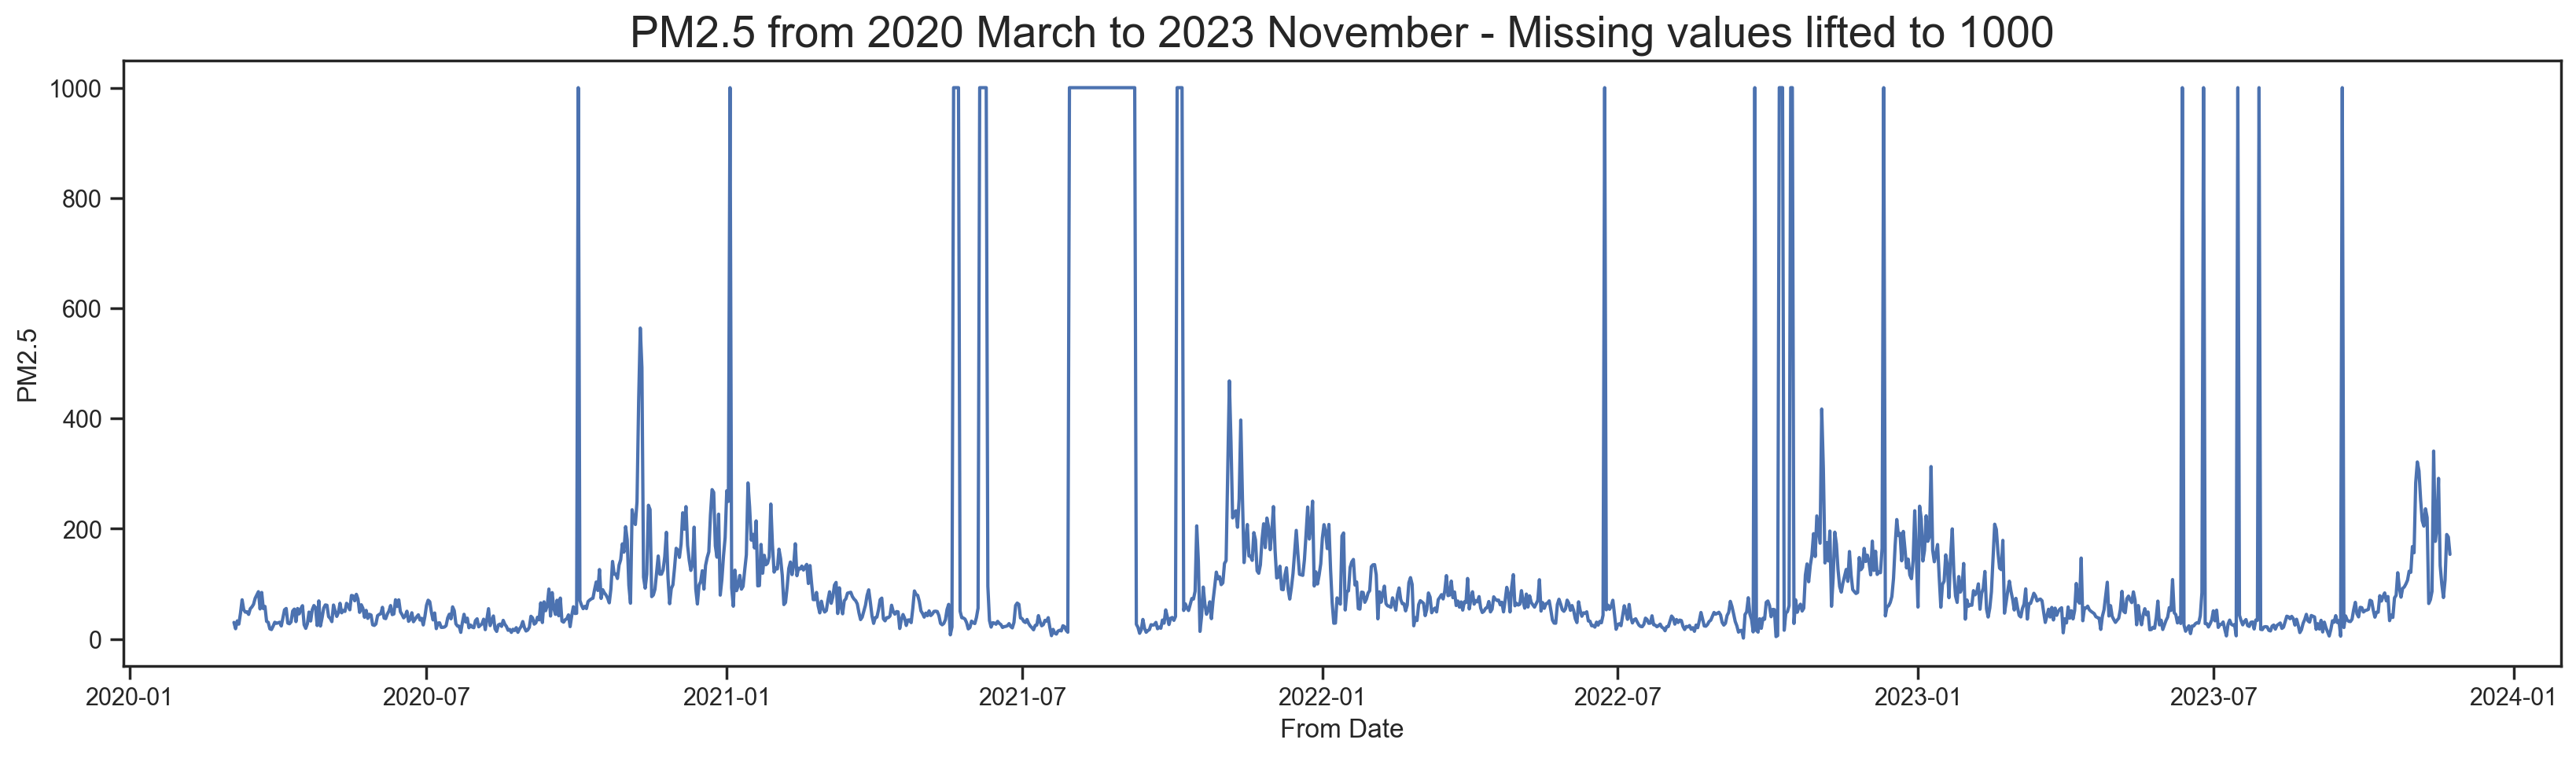

In [438]:
plt.figure(figsize=(20,5))
sns.lineplot(nise['PM2.5'].apply(lambda x: 1000 if x == 'None' else x))
plt.title("PM2.5 from 2020 March to 2023 November - Missing values lifted to 1000", fontsize=20)

#### 1.3.5.2 PM10

In [441]:
nise['PM10'].value_counts(dropna=False)

None      69
199.15     2
154.39     2
174.27     2
110.49     2
          ..
83.99      1
71.85      1
105.26     1
105.08     1
209.59     1
Name: PM10, Length: 1261, dtype: int64

In [439]:
# find index of None values
nise[nise['PM10'] == "None"]

PM2.5  PM10     NO    NO2    NOx    CO  Ozone
From Date                                                
2021-01-03   None  None   None   None   None  None   None
2021-03-18  84.67  None   6.81   14.6  21.41  0.52  37.02
2021-03-19  76.87  None   5.62   13.4  19.02  0.43   38.2
2021-04-04  53.15  None   5.39  14.04  19.43  0.28   44.9
2021-04-05  71.34  None   5.75  14.81  20.55  0.33  53.64
...           ...   ...    ...    ...    ...   ...    ...
2023-06-27  27.85  None   4.42  20.14  24.56  1.56  11.75
2023-06-28  21.78  None  10.92  21.51  26.44   1.5   8.03
2023-06-29  27.41  None  27.97  25.78  35.34  2.13  16.46
2023-07-16   None  None   None   None   None  None   None
2023-07-29   None  None  38.36  28.73  36.24  0.84  22.31

[69 rows x 7 columns]

<Figure size 2000x500 with 0 Axes>

<AxesSubplot: xlabel='From Date', ylabel='PM10'>

Text(0.5, 1.0, 'PM10 from 2020 March to 2023 November - Missing values lifted to 1000')

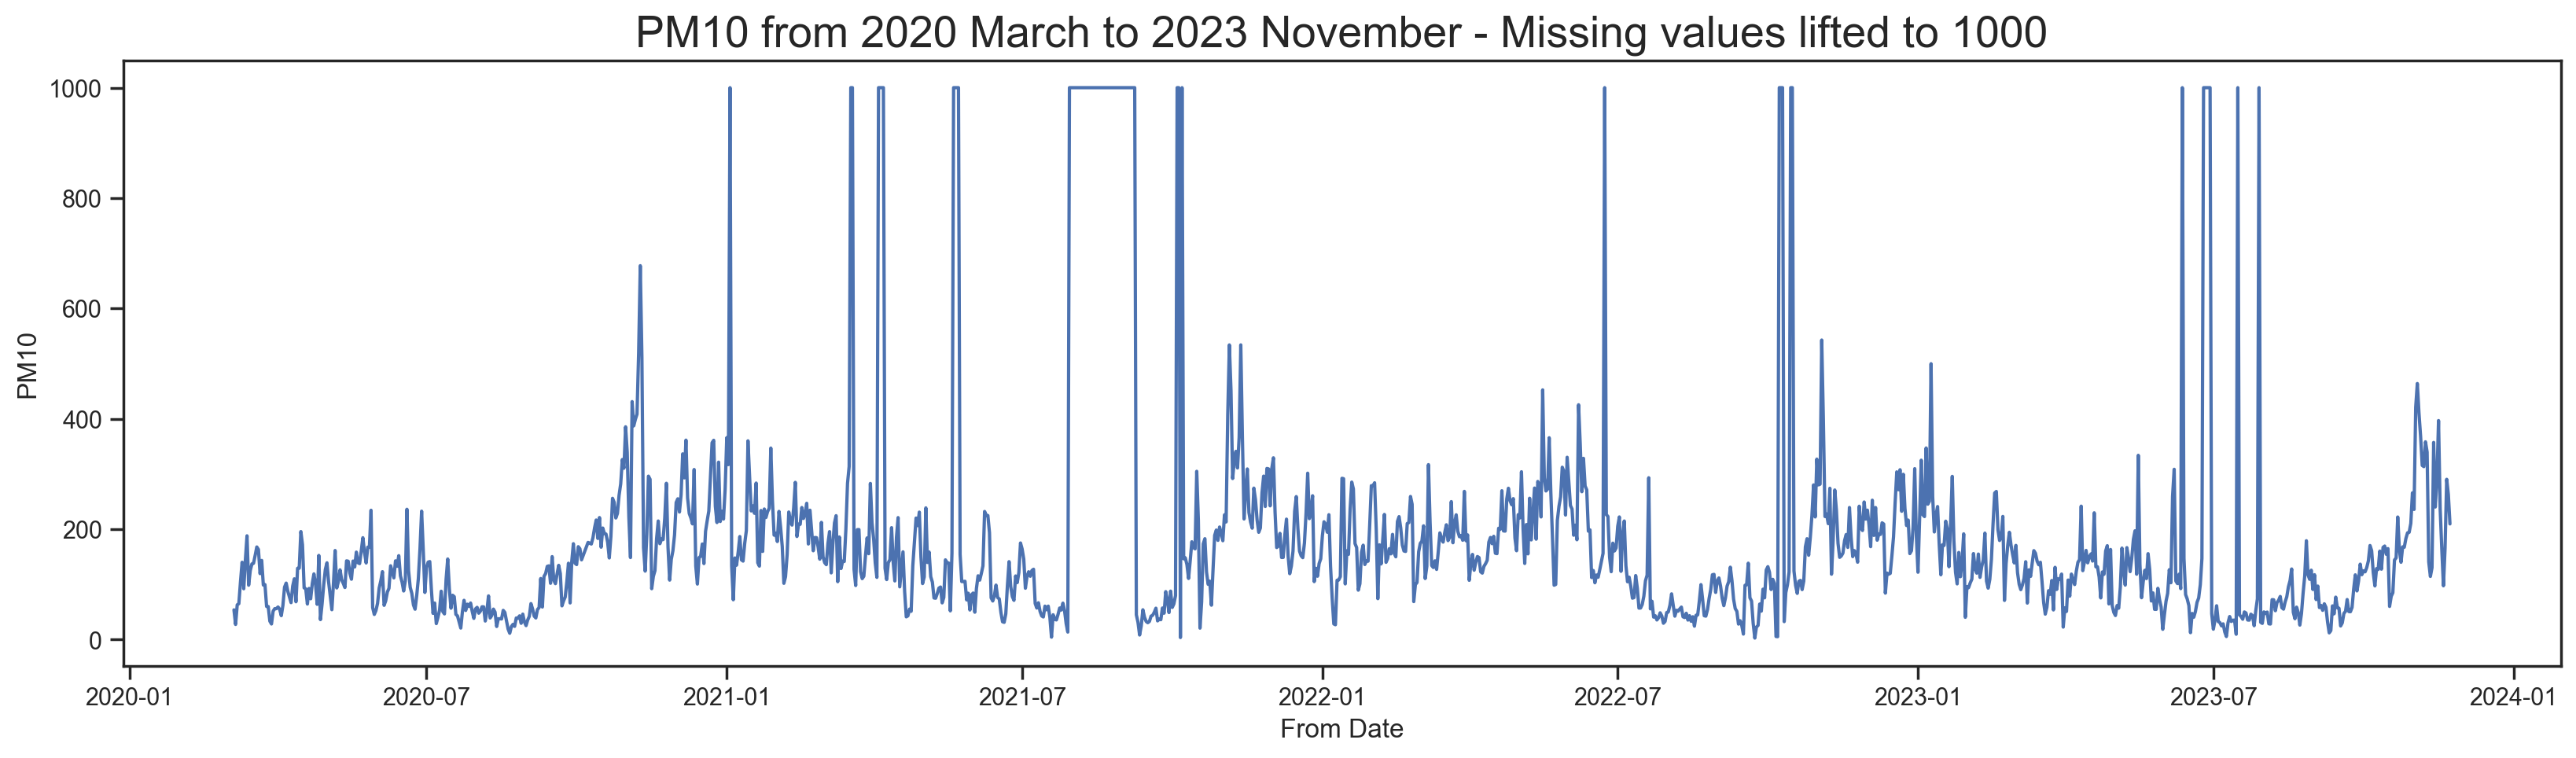

In [442]:
plt.figure(figsize=(20,5))
sns.lineplot(nise['PM10'].apply(lambda x: 1000 if x == 'None' else x))
plt.title("PM10 from 2020 March to 2023 November - Missing values lifted to 1000", fontsize=20)

#### 1.3.5.3 NOx

In [443]:
nise['NOx'].value_counts(dropna=False)

None     57
16.5      4
16.77     4
31.2      4
15.92     3
         ..
23.94     1
29.38     1
19.58     1
18.16     1
27.32     1
Name: NOx, Length: 1114, dtype: int64

In [449]:
np.max(nise[nise['NOx'] != "None"]['NOx'].astype(float))

220.73

<Figure size 2000x500 with 0 Axes>

<AxesSubplot: xlabel='From Date', ylabel='NOx'>

Text(0.5, 1.0, 'NOx from 2020 March to 2023 November - Missing values lifted to 1000')

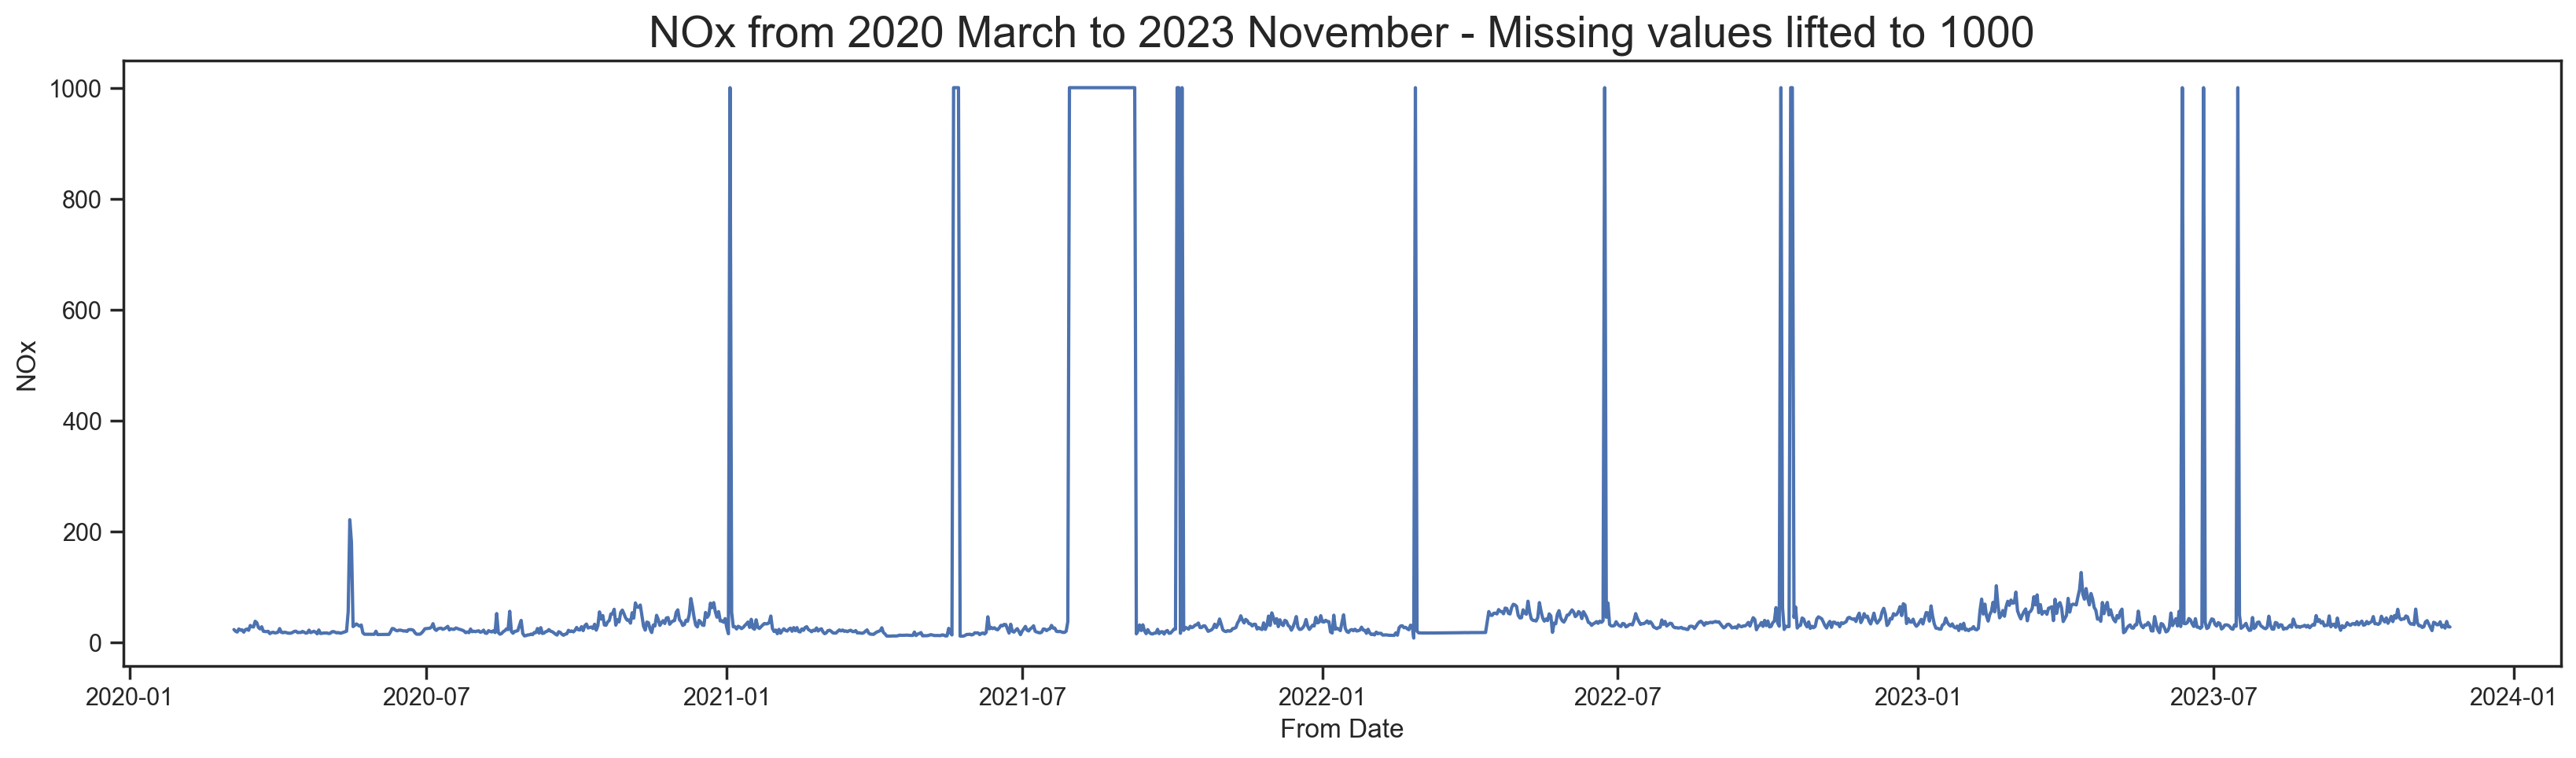

In [444]:
plt.figure(figsize=(20,5))
sns.lineplot(nise['NOx'].apply(lambda x: 1000 if x == 'None' else x))
plt.title("NOx from 2020 March to 2023 November - Missing values lifted to 1000", fontsize=20)

#### 1.3.5.4 CO

In [450]:
nise['CO'].value_counts(dropna=False)

None    56
0.4     19
0.54    18
0.45    18
0.41    18
        ..
2.82     1
2.96     1
3.05     1
2.87     1
1.73     1
Name: CO, Length: 275, dtype: int64

<Figure size 2000x500 with 0 Axes>

<AxesSubplot: xlabel='From Date', ylabel='CO'>

Text(0.5, 1.0, 'CO from 2020 March to 2023 November - Missing values lifted to 50')

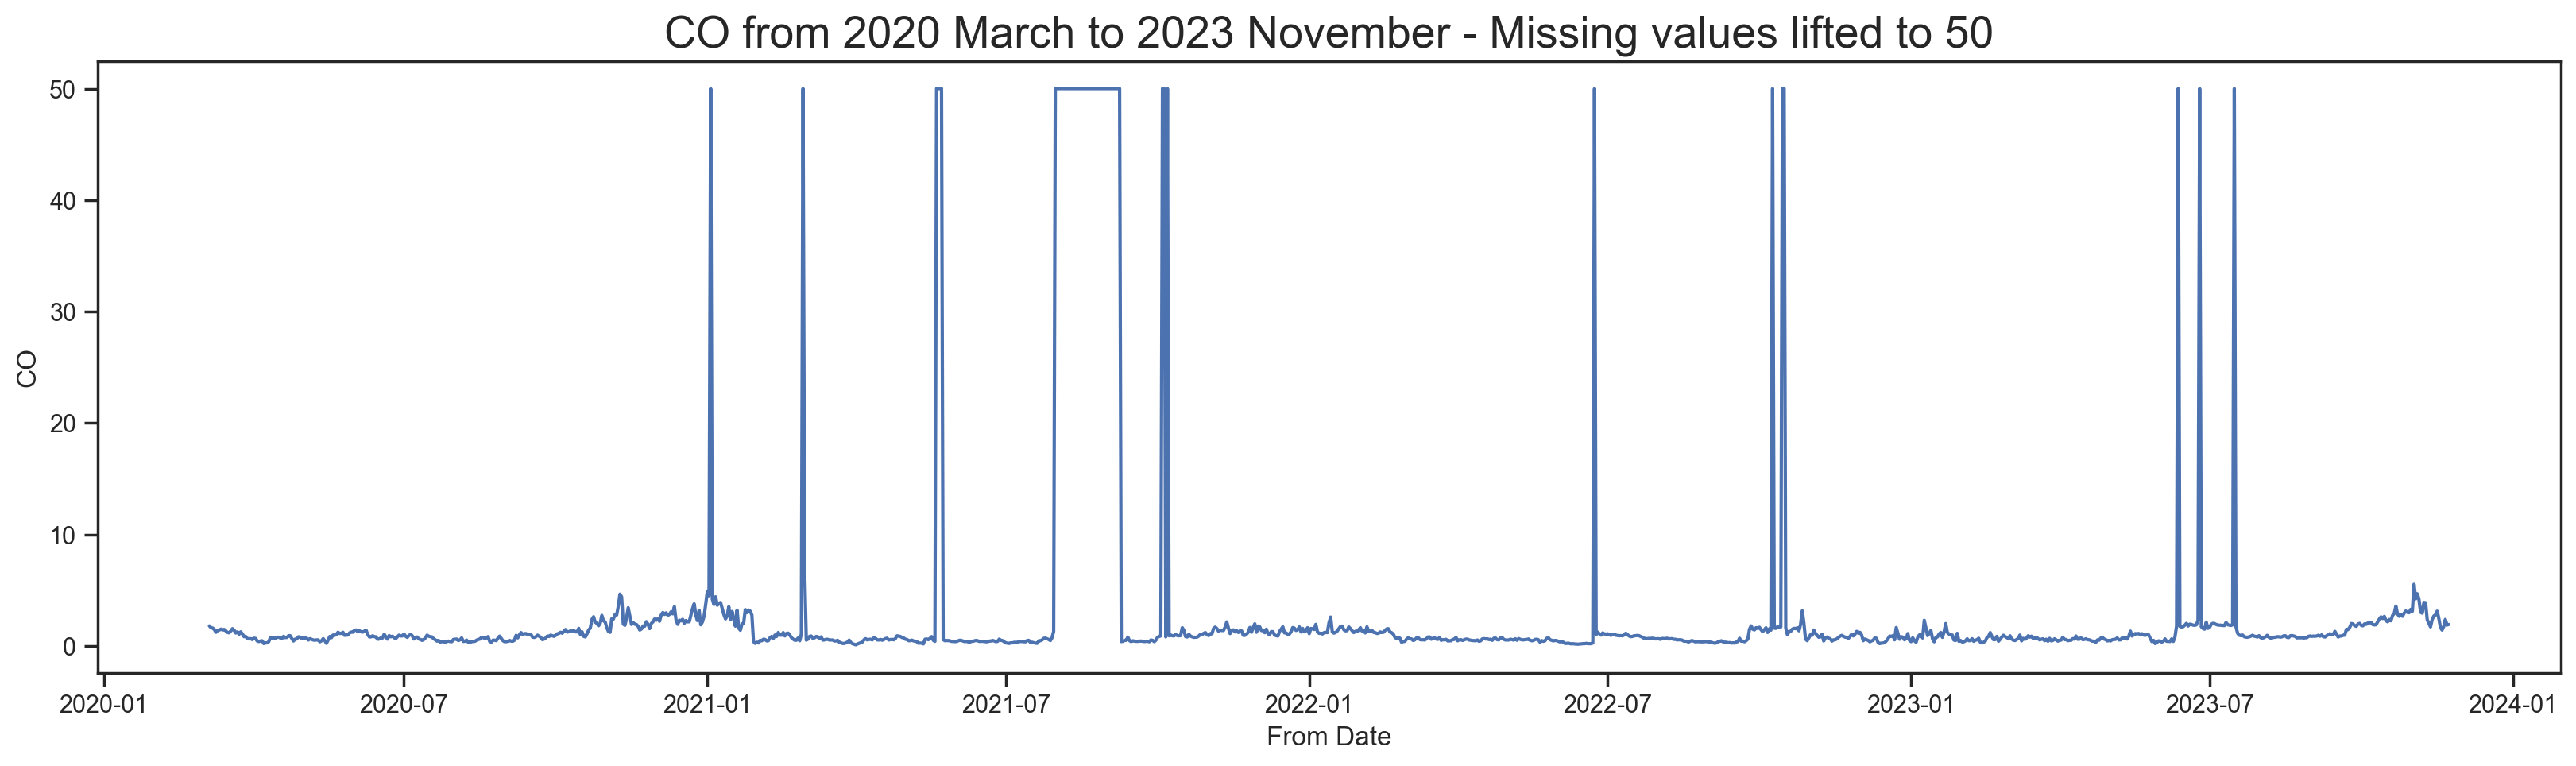

In [453]:
plt.figure(figsize=(20,5))
sns.lineplot(nise['CO'].apply(lambda x: 50 if x == 'None' else x))
plt.title("CO from 2020 March to 2023 November - Missing values lifted to 50", fontsize=20)